### PROBLEM STATEMENT : Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interest on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.



In [176]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
color = sns.color_palette()
from sklearn.impute import KNNImputer
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score



# For randomized data splitting
from sklearn.model_selection import train_test_split,GridSearchCV

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics


In [2]:
!pip install folium
import pandas as pd
import folium

In [3]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [4]:
# Import Dataset

df= pd.read_excel('innercity.xlsx') 

# Top 5 records of  Data


In [5]:
pd.options.display.max_columns = None
df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight condition  quality  ceil_measure  basement  \
0       9440.0    1     0    0.0         3      8.0        1800.0    1250.0   
1       3101.0    1     0    0.0         4      6.0         670.0       0.0   
2       2415.0    2     1    4.0         3      8.0        3040.0       0.0   
3       3721.0    2     0    0.0         3      8.0        1740.0       0.0   
4       4590.0    1     0    0.0         3      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0     1966             0    98034  47.7228 -122.183            2020.0   
1     1948             0    98118  47.5546 -122.274            1660.0   
2     1966             0    98118  47.5188 -122.256            2620.0   
3     2009             0    98002  47.3363 -122.213            2030.0   
4     1924             0    98118  47.5663 -122.285            1120.0   

   lot_measure15  furnished total_area  
0         8660.0        0.0      12490  
1         4100.0        0.0       3771  
2         2433.0        0.0       5455  
3         3794.0        0.0       5461  
4         5100.0        0.0       5710

In [6]:

# Bottom 5 records of  Data
df.tail()

cid         dayhours    price  room_bed  room_bath  \
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight condition  quality  \
21608          3130.0      60467.0    2     0    0.0         3      9.0   
21609          1030.0       4841.0    1     0    0.0         3      7.0   
21610          3710.0      34412.0    2     0    0.0         3     10.0   
21611          1560.0       7800.0    2     0    0.0         3      7.0   
21612          1940.0       4875.0    2     0    0.0         4      9.0   

       ceil_measure  basement yr_built  yr_renovated  zipcode      lat  \
21608        3130.0       0.0     1996             0    98014  47.6618   
21609         920.0     110.0     1939             0    98103  47.6860   
21610        2910.0     800.0     1978             0    98075  47.5888   
21611        1560.0       0.0     1997             0    98168  47.5140   
21612        1940.0       0.0     1925             0    98112  47.6427   

          long  living_measure15  lot_measure15  furnished total_area  
21608 -121.962            2780.0        44224.0        1.0      63597  
21609 -122.341            1530.0         4944.0        0.0       5871  
21610  -122.04            2390.0        34412.0        1.0      38122  
21611 -122.316            1160.0         7800.0        0.0       9360  
21612 -122.304            1790.0         4875.0        1.0       6815

In [7]:
# Shape. of dataset
print('The number of rows in the dataset is ',df.shape[0],'\n''The number of columns in the dataset  is',df.shape[1])

The number of rows in the dataset is  21613 
The number of columns in the dataset  is 23


In [8]:
# Checking datatype of all columns
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

None

In [9]:
# Duplicate  Value check
df.duplicated().sum()

0

In [10]:
# Null Value check
df.isna().sum()[df.isna().sum()>0]

room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [11]:
# Junk Value check
df[df == '$'].count()[df[df == '$'].count()>0]

ceil          30
coast         30
condition     28
yr_built      14
long          34
total_area    39
dtype: int64

In [12]:
# Proportion of Junk values
proportion_of_junk_values=(df[df == '$'].count().sum())/(df.size)*100

print("Junk Values in the dataset is ", round(proportion_of_junk_values,2),"%")

Junk Values in the dataset is  0.04 %


In [13]:
# Proportion of missing values
proportion_of_nulls=(df.isnull().sum().sum())/(df.size)*100

print("Nulls in the dataset is ", round(proportion_of_nulls,2),"%")

Nulls in the dataset is  0.14 %


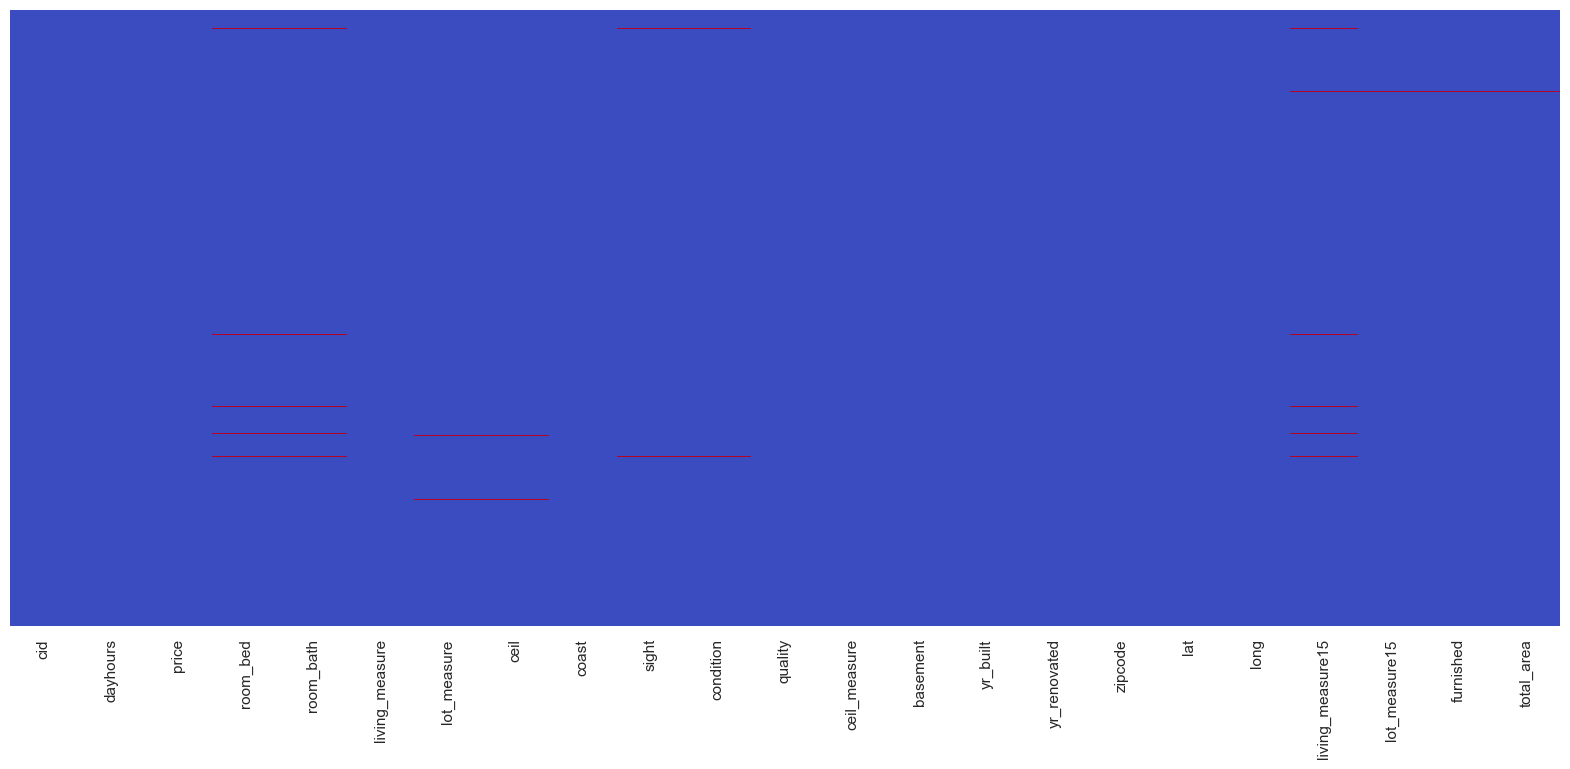

In [14]:
# Visualising missing values in  dataset before imputing
plt.figure(figsize = (20,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [15]:
df.isna().sum()[df.isna().sum()>0].index

Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'yr_built', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

#### Descriptive statistics for the  variables

In [16]:
pd.options.display.float_format = '{:.2f}'.format   

df.describe().T

count          mean           std        min  \
cid              21613.00 4580301520.86 2876565571.31 1000102.00   
price            21613.00     540182.16     367362.23   75000.00   
room_bed         21505.00          3.37          0.93       0.00   
room_bath        21505.00          2.12          0.77       0.00   
living_measure   21596.00       2079.86        918.50     290.00   
lot_measure      21571.00      15104.58      41423.62     520.00   
sight            21556.00          0.23          0.77       0.00   
quality          21612.00          7.66          1.18       1.00   
ceil_measure     21612.00       1788.37        828.10     290.00   
basement         21612.00        291.52        442.58       0.00   
yr_renovated     21613.00         84.40        401.68       0.00   
zipcode          21613.00      98077.94         53.51   98001.00   
lat              21613.00         47.56          0.14      47.16   
living_measure15 21447.00       1987.07        685.52     399.00   
lot_measure15    21584.00      12766.54      27286.99     651.00   
furnished        21584.00          0.20          0.40       0.00   

                           25%           50%           75%           max  
cid              2123049194.00 3904930410.00 7308900445.00 9900000190.00  
price                321950.00     450000.00     645000.00    7700000.00  
room_bed                  3.00          3.00          4.00         33.00  
room_bath                 1.75          2.25          2.50          8.00  
living_measure         1429.25       1910.00       2550.00      13540.00  
lot_measure            5040.00       7618.00      10684.50    1651359.00  
sight                     0.00          0.00          0.00          4.00  
quality                   7.00          7.00          8.00         13.00  
ceil_measure           1190.00       1560.00       2210.00       9410.00  
basement                  0.00          0.00        560.00       4820.00  
yr_renovated              0.00          0.00          0.00       2015.00  
zipcode               98033.00      98065.00      98118.00      98199.00  
lat                      47.47         47.57         47.68         47.78  
living_measure15       1490.00       1840.00       2360.00       6210.00  
lot_measure15          5100.00       7620.00      10087.00     871200.00  
furnished                 0.00          0.00          0.00          1.00

In [17]:
df['cid'].value_counts()[df['cid'].value_counts()>1].count()

176

In [18]:
df.describe()["price"]


count     21613.00
mean     540182.16
std      367362.23
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

In [19]:
df.describe()["room_bed"]

count   21505.00
mean        3.37
std         0.93
min         0.00
25%         3.00
50%         3.00
75%         4.00
max        33.00
Name: room_bed, dtype: float64

In [20]:
df['room_bed'].value_counts(normalize=True)

3.00    0.45
4.00    0.32
2.00    0.13
5.00    0.07
6.00    0.01
1.00    0.01
7.00    0.00
8.00    0.00
0.00    0.00
9.00    0.00
10.00   0.00
33.00   0.00
11.00   0.00
Name: room_bed, dtype: float64

In [21]:
df['room_bath'].value_counts(normalize=True)

2.50   0.25
1.00   0.18
1.75   0.14
2.25   0.09
2.00   0.09
1.50   0.07
2.75   0.05
3.00   0.03
3.50   0.03
3.25   0.03
3.75   0.01
4.00   0.01
4.50   0.00
4.25   0.00
0.75   0.00
4.75   0.00
5.00   0.00
5.25   0.00
5.50   0.00
0.00   0.00
1.25   0.00
6.00   0.00
5.75   0.00
0.50   0.00
8.00   0.00
6.75   0.00
6.50   0.00
6.25   0.00
7.50   0.00
7.75   0.00
Name: room_bath, dtype: float64

In [22]:
df.describe()["room_bath"]

count   21505.00
mean        2.12
std         0.77
min         0.00
25%         1.75
50%         2.25
75%         2.50
max         8.00
Name: room_bath, dtype: float64

In [23]:
df.describe()["living_measure"]

count   21596.00
mean     2079.86
std       918.50
min       290.00
25%      1429.25
50%      1910.00
75%      2550.00
max     13540.00
Name: living_measure, dtype: float64

In [24]:
df.describe()["lot_measure"]

count     21571.00
mean      15104.58
std       41423.62
min         520.00
25%        5040.00
50%        7618.00
75%       10684.50
max     1651359.00
Name: lot_measure, dtype: float64

In [25]:
df.ceil.value_counts(normalize=True)

1     0.49
2     0.38
1.5   0.09
3     0.03
2.5   0.01
$     0.00
3.5   0.00
Name: ceil, dtype: float64

In [26]:
df.coast.value_counts(normalize=True)

0   0.99
1   0.01
$   0.00
Name: coast, dtype: float64

In [27]:
df['sight'].value_counts(normalize=True)

0.00   0.90
2.00   0.04
3.00   0.02
1.00   0.02
4.00   0.01
Name: sight, dtype: float64

In [28]:
df['condition'].value_counts(normalize=True)

3   0.65
4   0.26
5   0.08
2   0.01
1   0.00
$   0.00
Name: condition, dtype: float64

In [29]:
df['quality'].value_counts(normalize=True)

7.00    0.42
8.00    0.28
9.00    0.12
6.00    0.09
10.00   0.05
11.00   0.02
5.00    0.01
12.00   0.00
4.00    0.00
13.00   0.00
3.00    0.00
1.00    0.00
Name: quality, dtype: float64

In [30]:
df['quality'].value_counts()

7.00     8981
8.00     6067
9.00     2615
6.00     2038
10.00    1134
11.00     399
5.00      242
12.00      90
4.00       29
13.00      13
3.00        3
1.00        1
Name: quality, dtype: int64

In [31]:
df.describe()['ceil_measure']

count   21612.00
mean     1788.37
std       828.10
min       290.00
25%      1190.00
50%      1560.00
75%      2210.00
max      9410.00
Name: ceil_measure, dtype: float64

In [32]:
df.describe()['basement']

count   21612.00
mean      291.52
std       442.58
min         0.00
25%         0.00
50%         0.00
75%       560.00
max      4820.00
Name: basement, dtype: float64

In [33]:
df['yr_built'].value_counts(normalize=True)

2014   0.03
2006   0.02
2005   0.02
2004   0.02
2003   0.02
       ... 
1901   0.00
1902   0.00
1935   0.00
1934   0.00
$      0.00
Name: yr_built, Length: 117, dtype: float64

In [34]:
df['yr_renovated'].value_counts(normalize=True)

0      0.96
2014   0.00
2013   0.00
2003   0.00
2007   0.00
       ... 
1944   0.00
1948   0.00
1959   0.00
1951   0.00
1954   0.00
Name: yr_renovated, Length: 70, dtype: float64

In [35]:
df['lat'].value_counts()

47.55    17
47.68    17
47.66    17
47.53    17
47.67    16
         ..
47.62     1
47.76     1
47.29     1
47.29     1
47.39     1
Name: lat, Length: 5034, dtype: int64

In [36]:
df['long'].unique()

array([-122.183, -122.274, -122.256, -122.213, -122.285, '$', -122.333,
       -122.165, -122.15, -122.178, -121.87, -122.352, -122.122, -122.275,
       -122.234, -122.324, -122.321, -122.277, -122.196, -122.398,
       -122.019, -122.181, -122.325, -122.191, -122.026, -122.084, -122.3,
       -122.287, -122.011, -122.127, -122.281, -122.221, -121.859,
       -121.913, -122.39, -121.871, -122.013, -122.381, -122.279,
       -122.194, -122.201, -122.125, -122.379, -122.121, -122.024,
       -122.389, -122.305, -122.346, -122.375, -122.344, -122.028,
       -122.193, -122.209, -122.365, -122.28, -122.334, -122.149,
       -122.388, -122.016, -122.298, -122.153, -121.802, -121.878,
       -122.218, -122.359, -122.296, -122.361, -122.357, -122.309,
       -122.056, -121.974, -122.18, -122.331, -122.374, -121.976,
       -121.975, -122.216, -122.188, -122.391, -122.31, -122.302,
       -121.972, -122.22, -122.17, -122.101, -121.888, -122.046, -122.154,
       -122.145, -122.236, -122.168, 

In [37]:
df.describe()["living_measure15"]

count   21447.00
mean     1987.07
std       685.52
min       399.00
25%      1490.00
50%      1840.00
75%      2360.00
max      6210.00
Name: living_measure15, dtype: float64

In [38]:
df.describe()["lot_measure15"]

count    21584.00
mean     12766.54
std      27286.99
min        651.00
25%       5100.00
50%       7620.00
75%      10087.00
max     871200.00
Name: lot_measure15, dtype: float64

In [39]:
df["furnished"].value_counts(normalize=True)

0.00   0.80
1.00   0.20
Name: furnished, dtype: float64

In [40]:
df["total_area"].value_counts()

$        39
6770     19
5940     19
7330     19
9060     19
         ..
15707     1
5355      1
12215     1
46580     1
38122     1
Name: total_area, Length: 11145, dtype: int64

In [41]:
#Let's look at the distribution of price at different percentiles
print(" 5% of the properties have a price lower than ${0: .2f}".format(np.percentile(df["price"], 5)))
print("25% of the properties have a price lower than ${0: .2f}".format(np.percentile(df["price"], 25)))
print("50% of the properties have a price lower than ${0: .2f}".format(np.percentile(df["price"], 50)))
print("75% of the properties have a price lower than ${0: .2f}".format(np.percentile(df["price"], 75)))
print("90% of the properties have a price lower than ${0: .2f}".format(np.percentile(df["price"], 90)))
print("95% of the properties have a price lower than ${0: .2f}".format(np.percentile(df["price"], 95)))
print("99% of the properties have a price lower than ${0: .2f}".format(np.percentile(df["price"], 99)))

 5% of the properties have a price lower than $ 210000.00
25% of the properties have a price lower than $ 321950.00
50% of the properties have a price lower than $ 450000.00
75% of the properties have a price lower than $ 645000.00
90% of the properties have a price lower than $ 887000.00
95% of the properties have a price lower than $ 1160000.00
99% of the properties have a price lower than $ 1968800.00


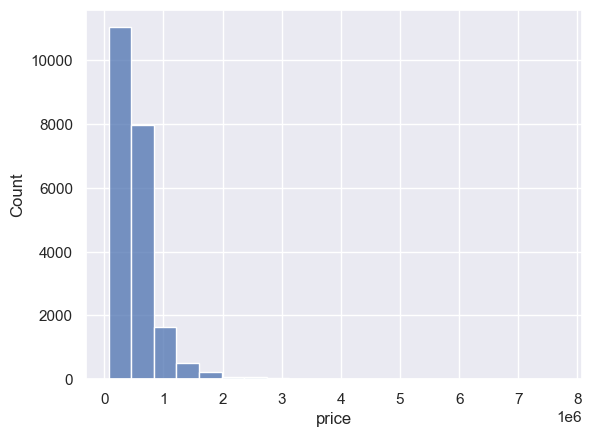

In [42]:
sns.histplot(df['price'],bins=20);

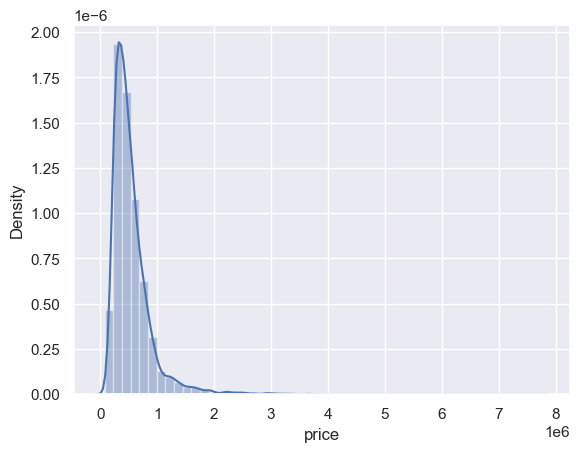

In [43]:
sns.distplot(df['price']);

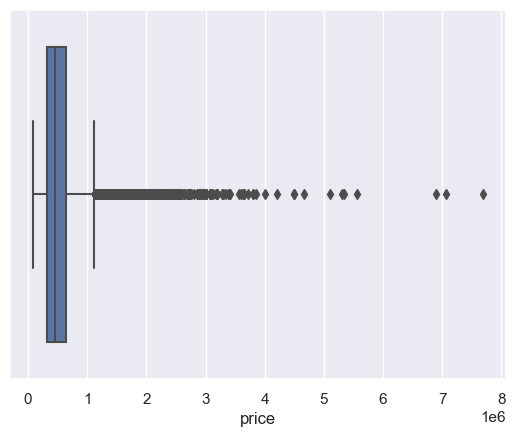

In [44]:
sns.boxplot(df['price']);

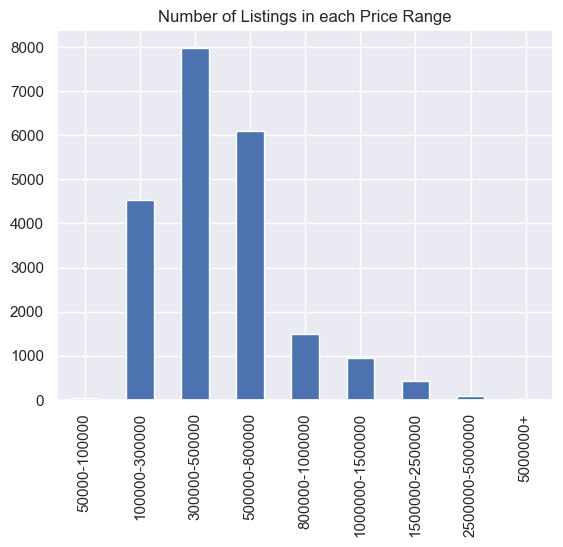

In [45]:
## Let's create a range variable to understand how many records we have in different slabs

price_range = pd.cut(df["price"], 
                     bins=[50000, 100000, 300000,500000,800000, 1000000, 1500000,2500000, 5000000,df["price"].max()], 
                     labels=["50000-100000","100000-300000", "300000-500000","500000-800000", "800000-1000000","1000000-1500000", "1500000-2500000", "2500000-5000000", "5000000+"])
df["price_range"] = price_range 
df["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range")
plt.show()

In [46]:
df.drop(['price_range'],axis=1,inplace=True)

## Transformation of Target Variable

In [47]:
from scipy import stats

_, p = stats.normaltest(df['price'])
print(p)

0.0


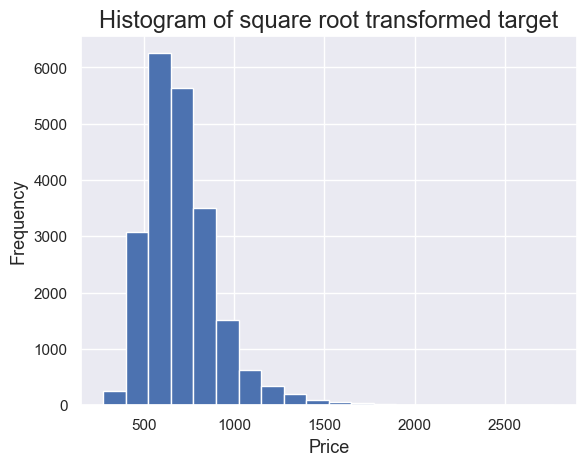

In [48]:
## Apply Square Root Scaling
y_sqrt = np.sqrt(df['price'])
plt.hist(y_sqrt,bins=20)
plt.title("Histogram of square root transformed target", size=17)
plt.xlabel("Price", size=13)
plt.ylabel("Frequency", size=13)
plt.show()

In [49]:
from scipy import stats

_, p = stats.normaltest(y_sqrt)
print(p)

0.0


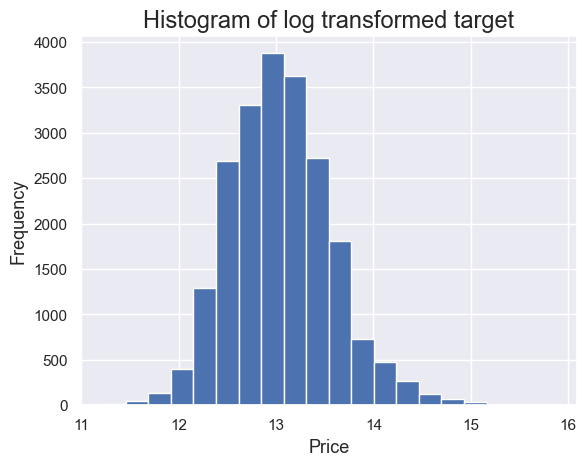

In [50]:
## Apply log  Scaling
y_log = np.log(df['price'])
plt.hist(y_log,bins=20)
plt.title("Histogram of log transformed target", size=17)
plt.xlabel("Price", size=13)
plt.ylabel("Frequency", size=13)
plt.show()

In [51]:
from scipy import stats

_, p = stats.normaltest(y_log)
print(p)

2.308725847410902e-186


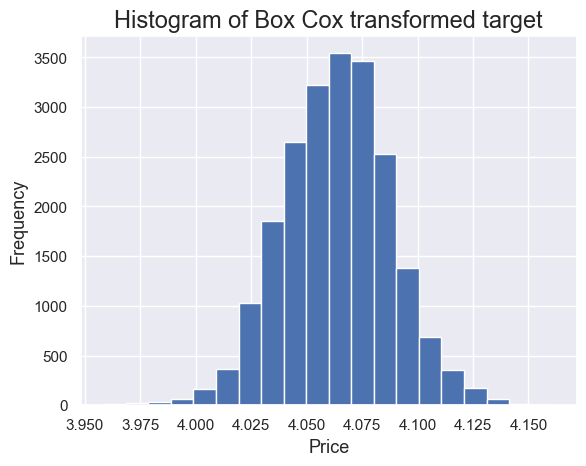

In [52]:
from scipy import stats
y_bc, lambda_bc = stats.boxcox(df['price'])
plt.hist(y_bc,bins=20)
plt.title("Histogram of Box Cox transformed target", size=17)
plt.xlabel("Price", size=13)
plt.ylabel("Frequency", size=13)
plt.show()

In [53]:
from scipy import stats

_, p = stats.normaltest(y_bc)
print(p)

1.5422148070630482e-15


In [54]:
df_long=df[df.long!='$']

## Mapping the Longitude and Longitude

In [55]:

lat = df_long['lat'].tolist()
lon = df_long['long'].tolist()
locations = list(zip(lat, lon))

# 52.5200° N, 13.4050° E is the latitude and longitude of berlin

map1 = folium.Map(location=[47.7228, -122.183], zoom_start=12)
FastMarkerCluster(locations).add_to(map1)
map1


## Bivariate Analysis 

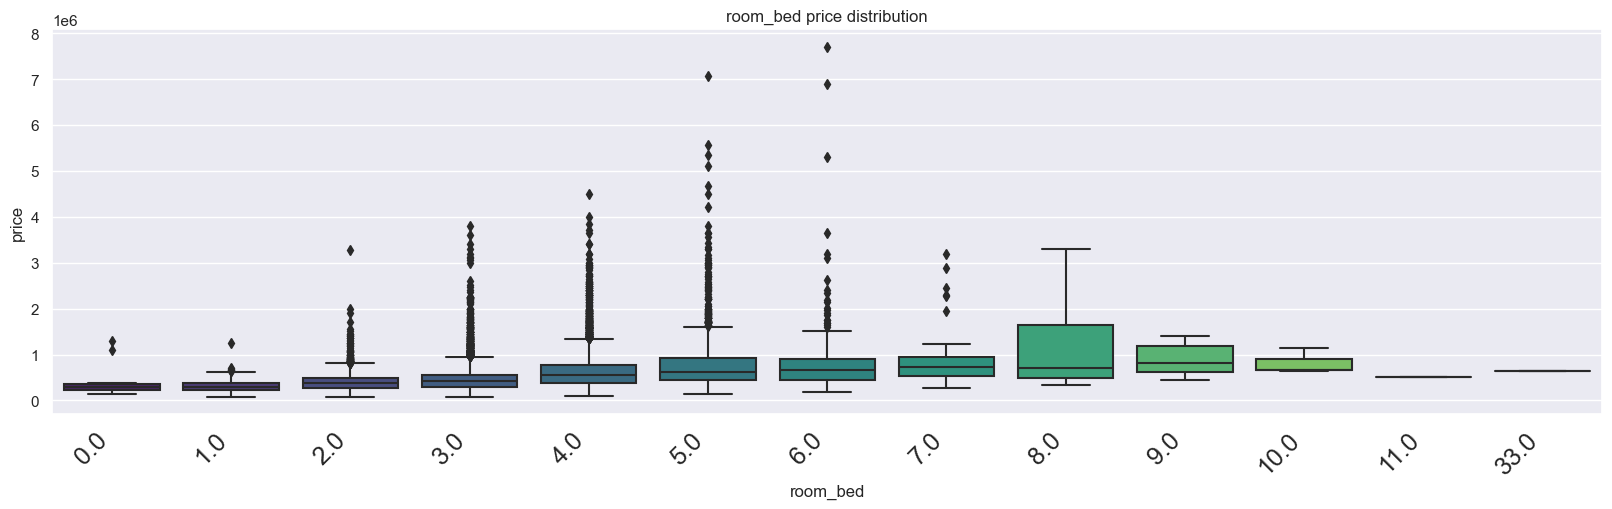

In [56]:
## Let's check if Numer of Rooms has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="room_bed", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('room_bed price distribution')
chart;

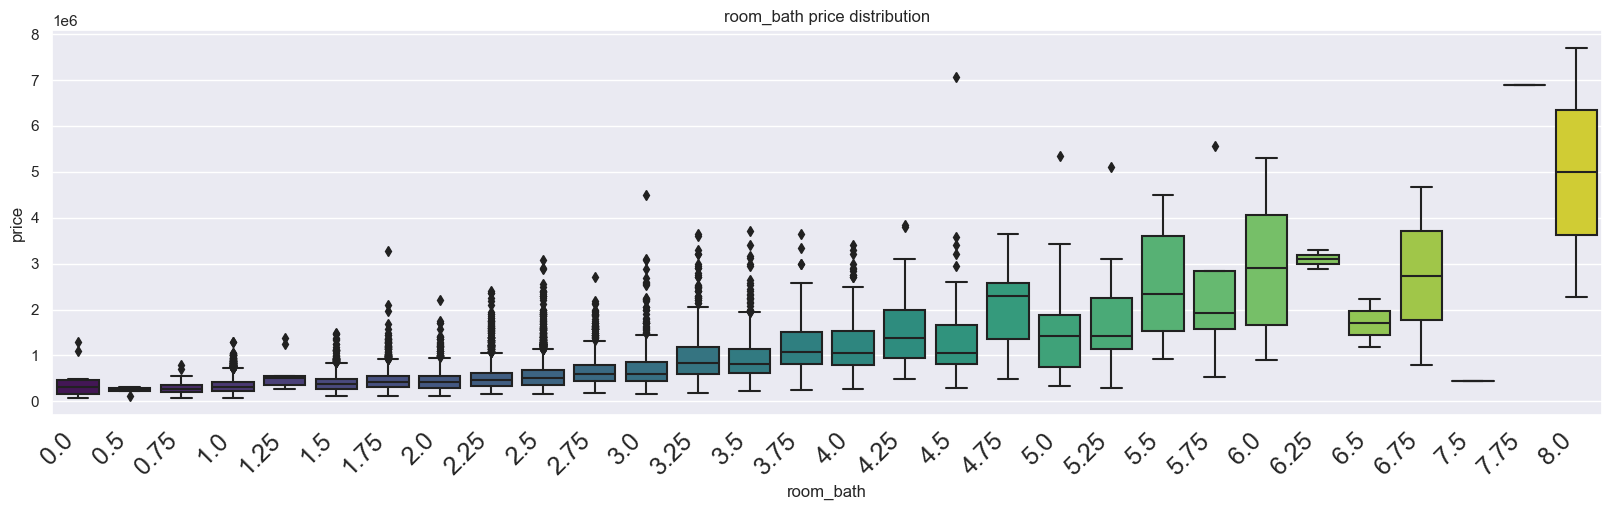

In [57]:
## Let's check if  Numer of Bathrooms has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="room_bath", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('room_bath price distribution')
chart;

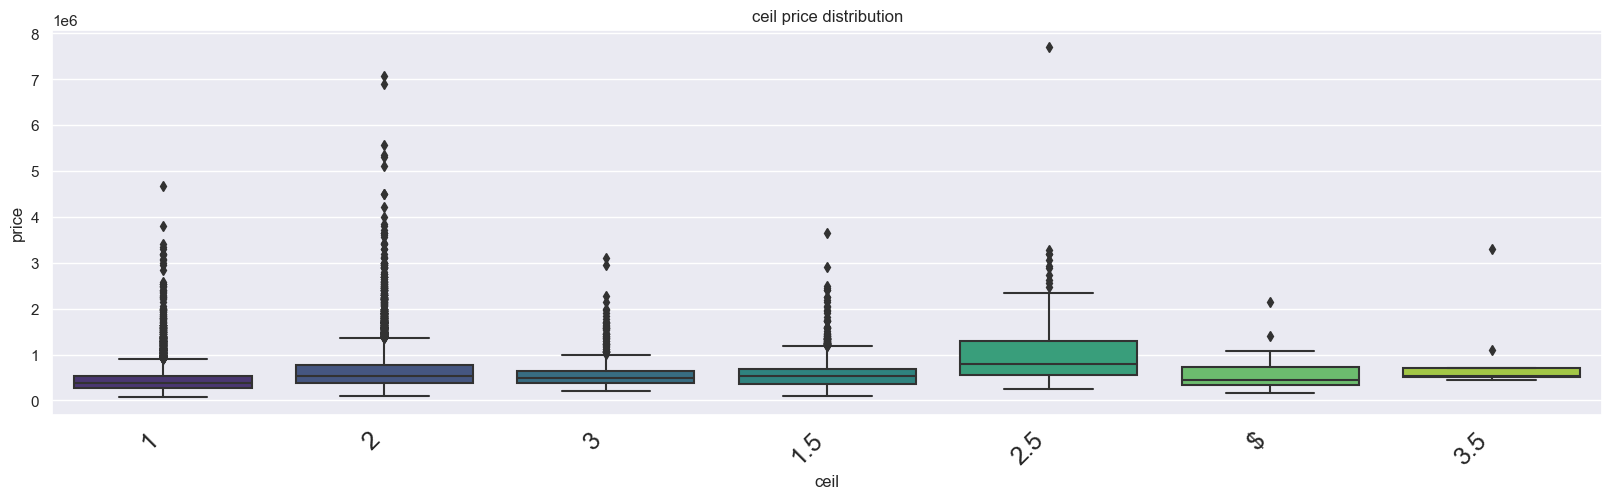

In [58]:
## Let's check if  Number of floors has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="ceil", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('ceil price distribution')
chart;

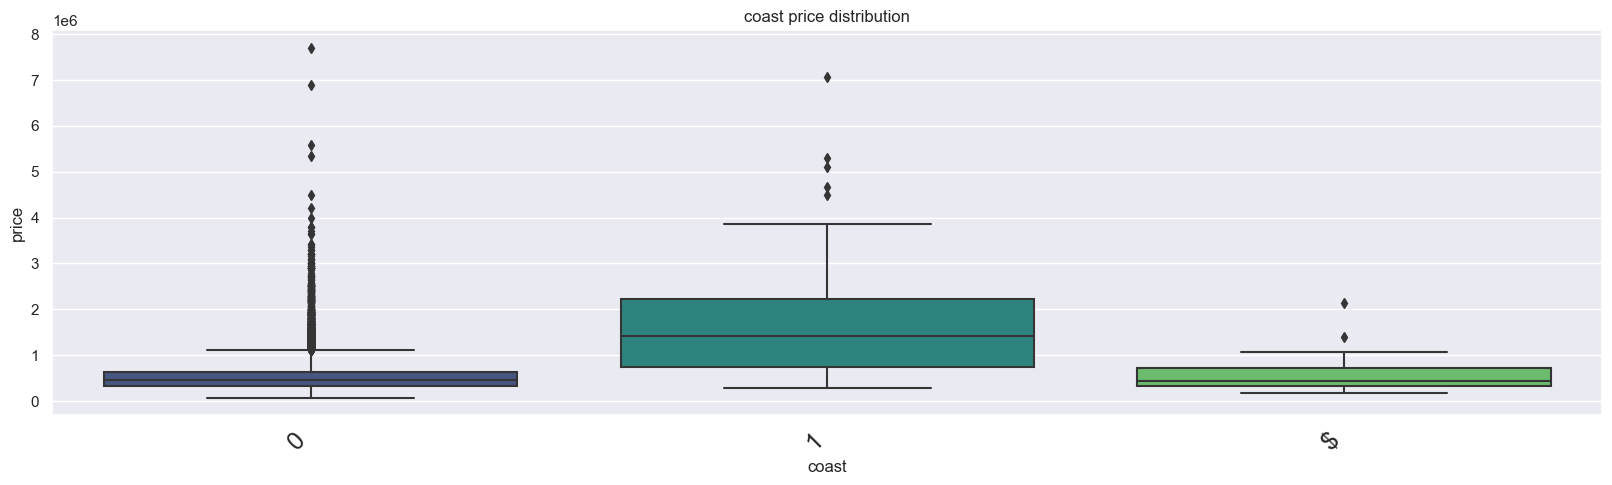

In [59]:
## Let's check if  waterfront view has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="coast", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('coast price distribution')
chart;

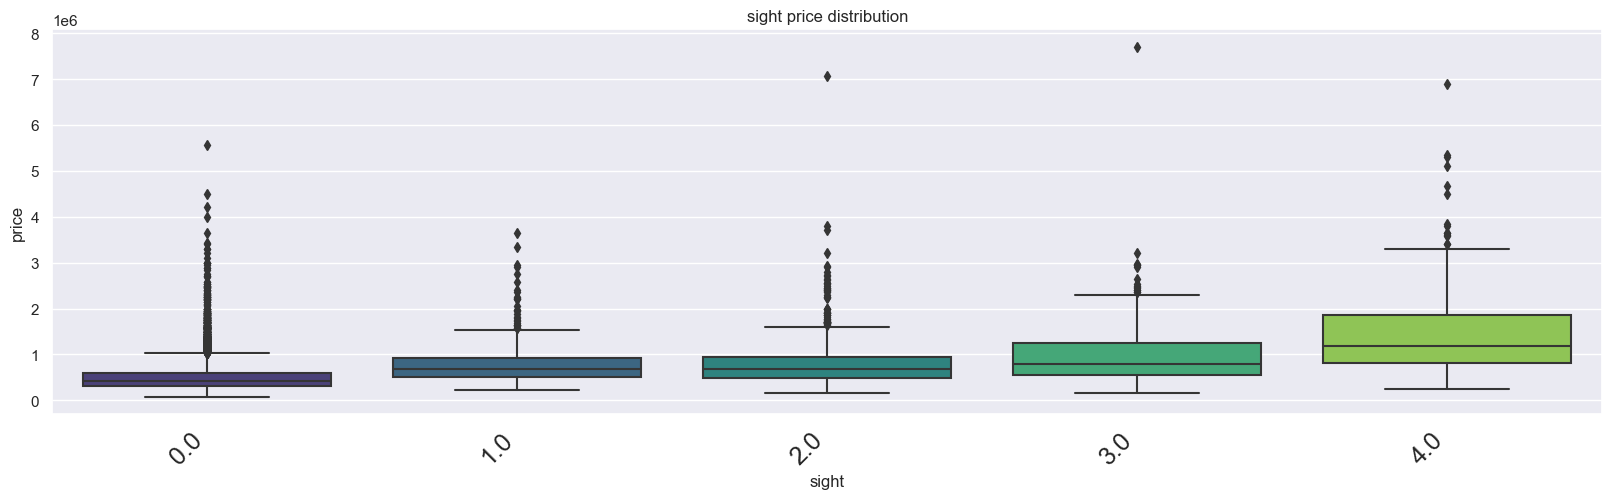

In [60]:
## Let's check if  number of  views has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="sight", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('sight price distribution')
chart;

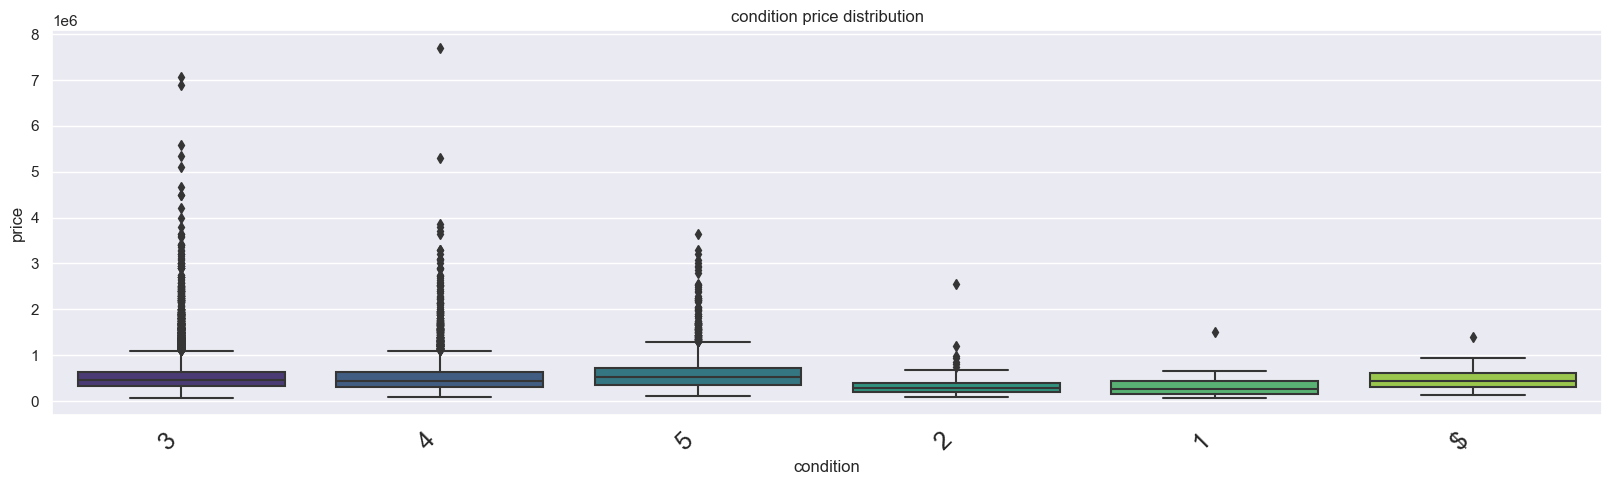

In [61]:
## Let's check if  condition has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="condition", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('condition price distribution')
chart;

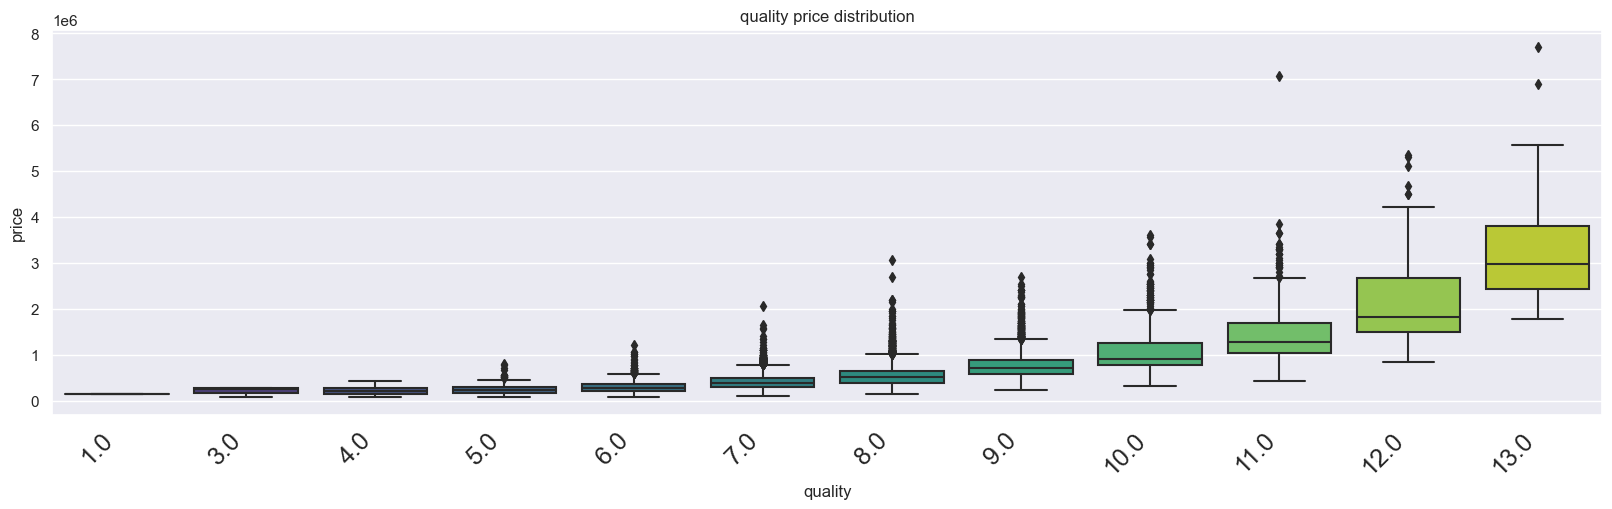

In [62]:
## Let's check if  quality has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="quality", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('quality price distribution')
chart;

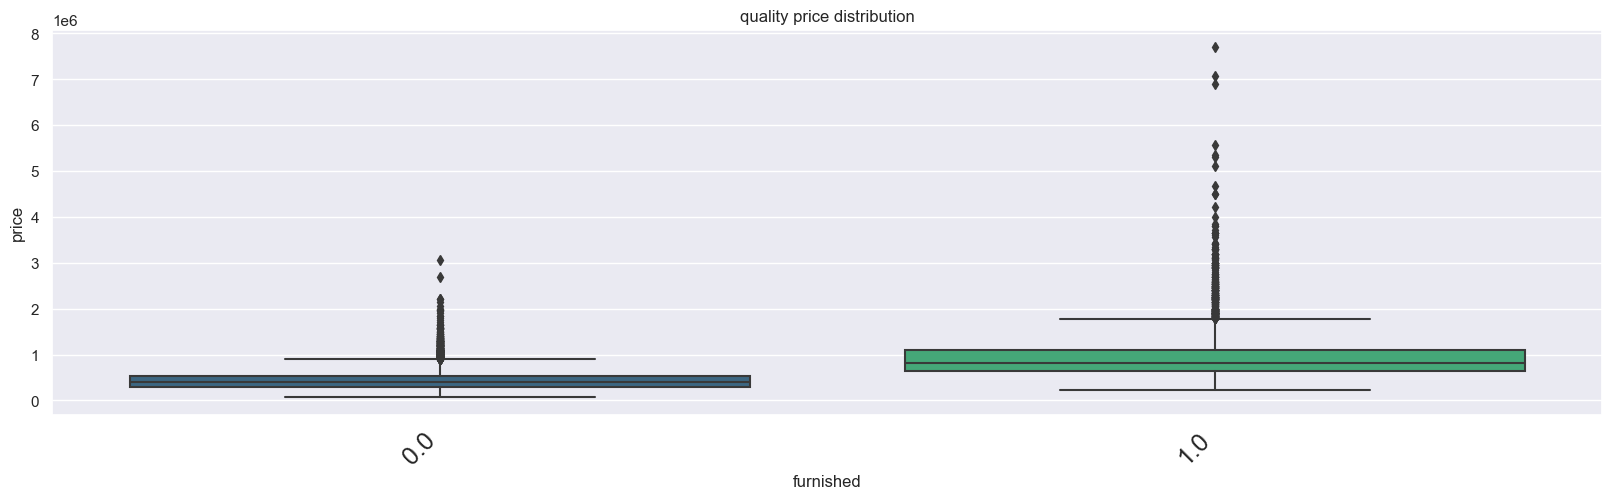

In [63]:
## Let's check if  furnished has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="furnished", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('quality price distribution')
chart;

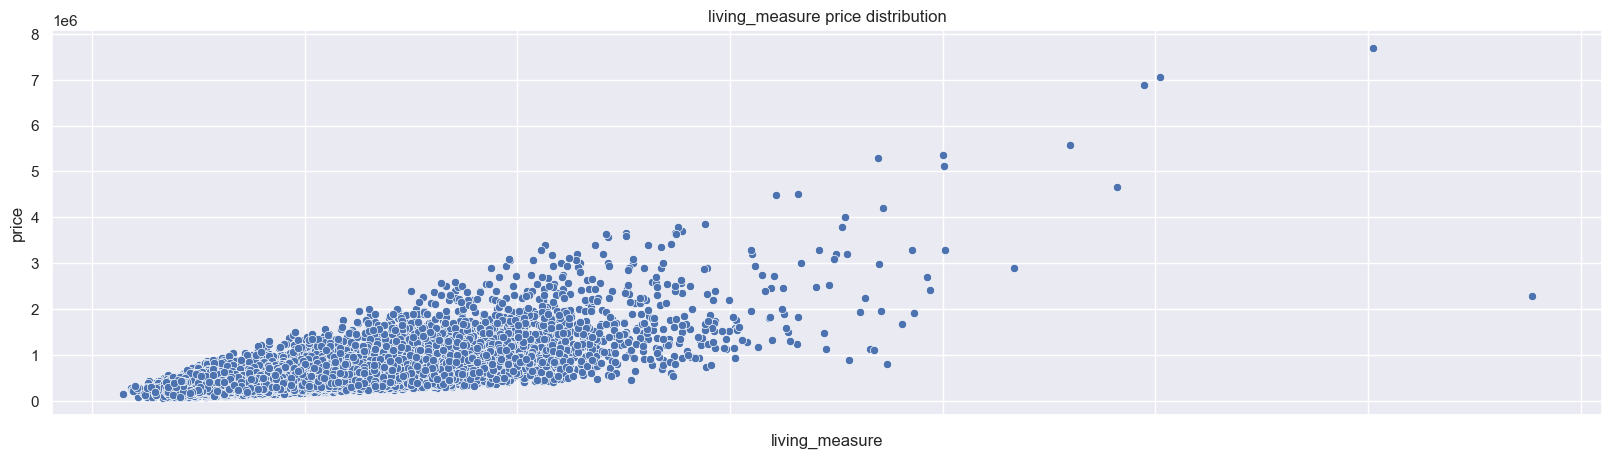

In [64]:
## Let's check if  living measure has any price impact

plt.figure(figsize=(20,5))

chart=sns.scatterplot(x="living_measure", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('living_measure price distribution')
chart;

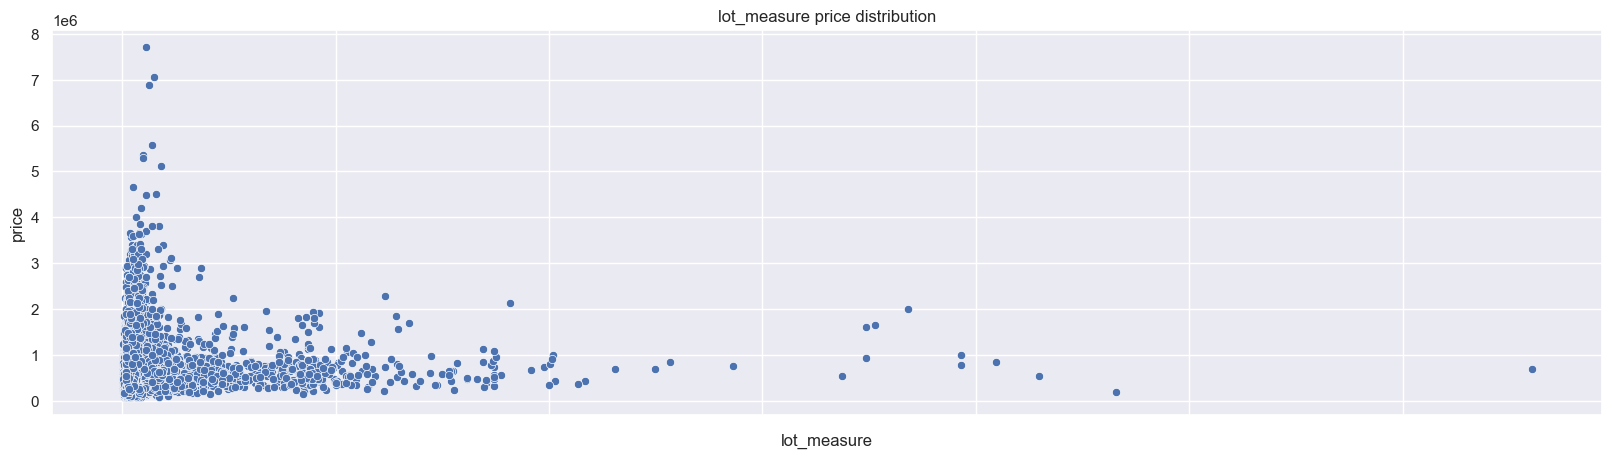

In [65]:
## Let's check if  Lot measure has any price impact

plt.figure(figsize=(20,5))

chart=sns.scatterplot(x="lot_measure", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('lot_measure price distribution')
chart;

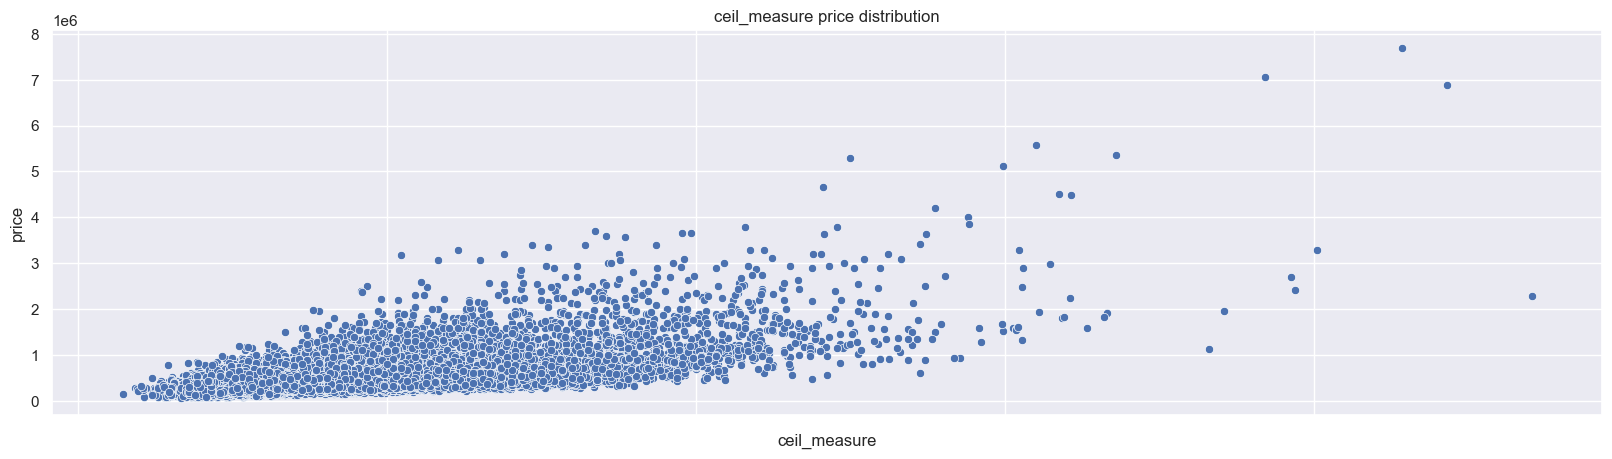

In [66]:
## Let's check if  ceil measure has any price impact

plt.figure(figsize=(20,5))

chart=sns.scatterplot(x="ceil_measure", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('ceil_measure price distribution')
chart;

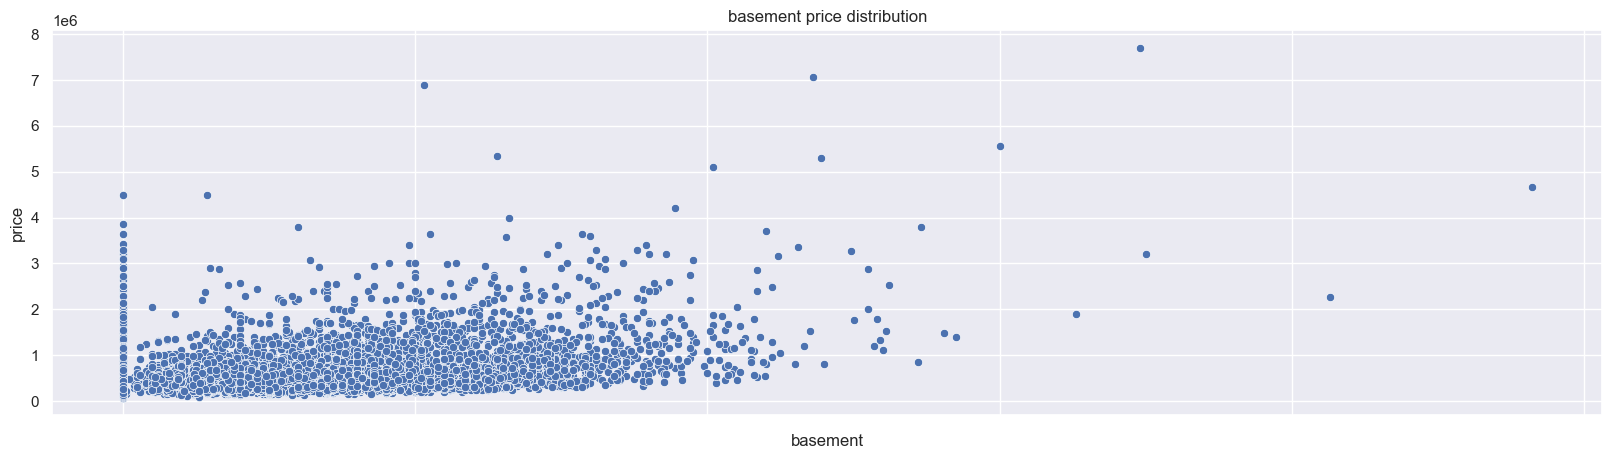

In [67]:
## Let's check if  basement measure measure has any price impact

plt.figure(figsize=(20,5))

chart=sns.scatterplot(x="basement", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('basement price distribution')
chart;

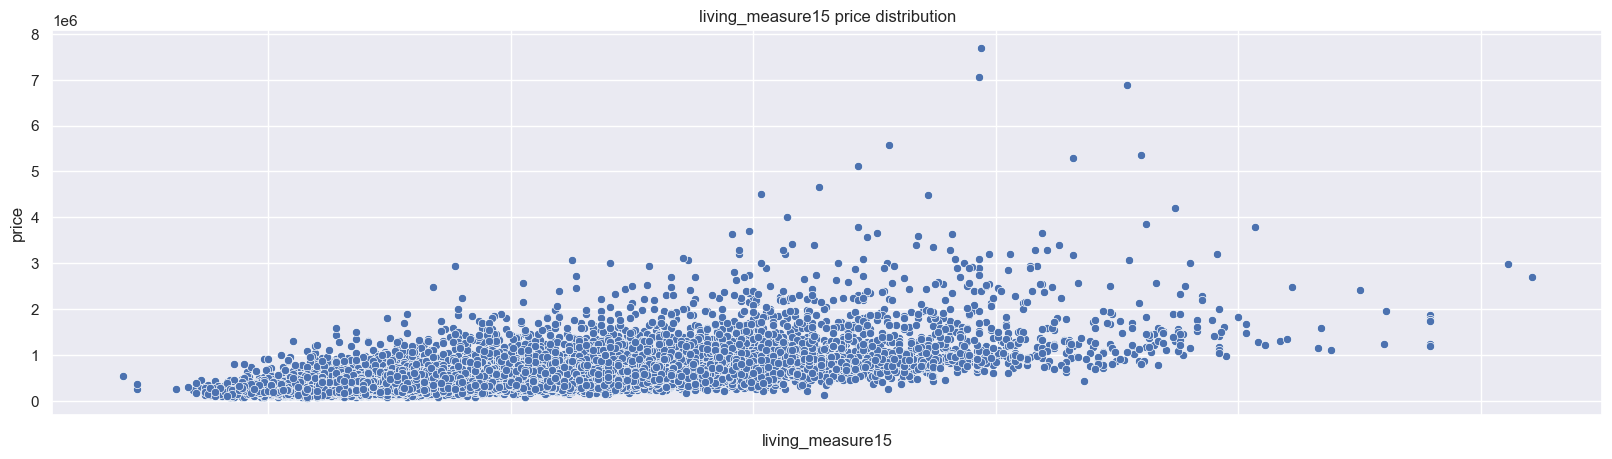

In [68]:
## Let's check if  living measure15 measure has any price impact

plt.figure(figsize=(20,5))

chart=sns.scatterplot(x="living_measure15", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('living_measure15 price distribution')
chart;

In [69]:
## Let's check if  lot measure15 measure has any price impact

plt.figure(figsize=(20,5))

chart=sns.scatterplot(x="lot_measure15", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('lot_measure15 price distribution')
chart;

## Imputing Missing Values and Junk in Total_area, Living measure, Lot measure,living measure 15  and Lot measure 15

In [70]:
##imputing Total area missing values 
df["total_area"] = df["total_area"].replace("$", "") # Remove dollar sign
df['total_area'] = df['total_area'].replace('', pd.NA).fillna(df['living_measure']+ df['lot_measure'])## Imputing mising values
df["total_area"] = df["total_area"].astype('float') # converting to numeric

In [71]:
df['total_area'].describe()

count     21613.00
mean      17186.87
std       41589.08
min        1423.00
25%        7035.00
50%        9575.00
75%       13000.00
max     1652659.00
Name: total_area, dtype: float64

In [72]:
#Let's look at the distribution of total area  measure at different percentiles
print(" 5% of the properties have a Total Area lower than {0: .2f} sqft".format(np.percentile(df["total_area"], 5)))
print("25% of the properties have a Total Area lower than {0: .2f} sqft".format(np.percentile(df["total_area"], 25)))
print("50% of the properties have a Total Area lower than {0: .2f} sqft".format(np.percentile(df["total_area"], 50)))
print("75% of the properties have a Total Area lower than {0: .2f} sqft".format(np.percentile(df["total_area"], 75)))
print("90% of the properties have a Total Area lower than {0: .2f} sqft".format(np.percentile(df["total_area"], 90)))
print("95% of the properties have a Total Area lower than {0: .2f} sqft".format(np.percentile(df["total_area"], 95)))
print("99% of the properties have a Total Area lower than {0: .2f} sqft".format(np.percentile(df["total_area"], 99)))

 5% of the properties have a Total Area lower than  3302.20 sqft
25% of the properties have a Total Area lower than  7035.00 sqft
50% of the properties have a Total Area lower than  9575.00 sqft
75% of the properties have a Total Area lower than  13000.00 sqft
90% of the properties have a Total Area lower than  24088.80 sqft
95% of the properties have a Total Area lower than  45885.80 sqft
99% of the properties have a Total Area lower than  214921.44 sqft


In [73]:
##imputing living measure missing values 
df['living_measure']=df['living_measure'].fillna(df["total_area"]-df["lot_measure"])

In [74]:
df['living_measure'].describe()

count   21613.00
mean     2079.90
std       918.44
min       290.00
25%      1427.00
50%      1910.00
75%      2550.00
max     13540.00
Name: living_measure, dtype: float64

In [75]:
#Let's look at the distribution of living measure at different percentiles
print(" 5% of the properties have a living measure lower than {0: .2f} sqft".format(np.percentile(df["living_measure"], 5)))
print("25% of the properties have a living measure lower than {0: .2f} sqft".format(np.percentile(df["living_measure"], 25)))
print("50% of the properties have a living measure lower than {0: .2f} sqft".format(np.percentile(df["living_measure"], 50)))
print("75% of the properties have a living measure lower than {0: .2f} sqft".format(np.percentile(df["living_measure"], 75)))
print("90% of the properties have a living measure lower than {0: .2f} sqft".format(np.percentile(df["living_measure"], 90)))
print("95% of the properties have a living measure lower than {0: .2f} sqft".format(np.percentile(df["living_measure"], 95)))
print("99% of the properties have a living measure lower than {0: .2f} sqft".format(np.percentile(df["living_measure"], 99)))

 5% of the properties have a living measure lower than  940.00 sqft
25% of the properties have a living measure lower than  1427.00 sqft
50% of the properties have a living measure lower than  1910.00 sqft
75% of the properties have a living measure lower than  2550.00 sqft
90% of the properties have a living measure lower than  3250.00 sqft
95% of the properties have a living measure lower than  3760.00 sqft
99% of the properties have a living measure lower than  4978.80 sqft


In [76]:
##imputing lot measure missing values 
df['lot_measure']=df['lot_measure'].fillna(df["total_area"]-df["living_measure"])

In [77]:
df['lot_measure'].describe()

count     21613.00
mean      15106.97
std       41420.51
min         520.00
25%        5040.00
50%        7618.00
75%       10688.00
max     1651359.00
Name: lot_measure, dtype: float64

In [78]:
#Let's look at the distribution of lot measure at different percentiles
print(" 5% of the properties have a lot measure lower than {0: .2f} sqft" .format(np.percentile(df["lot_measure"], 5)))
print("25% of the properties have a lot measure lower than {0: .2f} sqft".format(np.percentile(df["lot_measure"], 25)))
print("50% of the properties have a lot measure lower than {0: .2f} sqft".format(np.percentile(df["lot_measure"], 50)))
print("75% of the properties have a lot measure lower than {0: .2f} sqft".format(np.percentile(df["lot_measure"], 75)))
print("90% of the properties have a lot measure lower than {0: .2f} sqft".format(np.percentile(df["lot_measure"], 90)))
print("95% of the properties have a lot measure lower than {0: .2f} sqft".format(np.percentile(df["lot_measure"], 95)))
print("99% of the properties have a lot measure lower than {0: .2f} sqft".format(np.percentile(df["lot_measure"], 99)))

 5% of the properties have a lot measure lower than  1800.00 sqft
25% of the properties have a lot measure lower than  5040.00 sqft
50% of the properties have a lot measure lower than  7618.00 sqft
75% of the properties have a lot measure lower than  10688.00 sqft
90% of the properties have a lot measure lower than  21397.60 sqft
95% of the properties have a lot measure lower than  43339.20 sqft
99% of the properties have a lot measure lower than  213008.00 sqft


In [79]:
##imputing living  measure 15 missing values 
df['living_measure15'] = df['living_measure15'].fillna(df['living_measure'])


In [80]:
##imputing lot measure 15  missing values 
df['lot_measure15'] = df['lot_measure15'].fillna(df['lot_measure'])


In [81]:
cols=["ceil","coast","condition","yr_built","long"]
df[cols] = df[cols].replace("$", np.nan) # Remove dollar sign


## Converting Datatype of variables 

In [82]:
df[["ceil","yr_built","long"]]=df[["ceil","yr_built","long"]].astype('float')# converting to numeric

In [83]:
cols1=["zipcode","coast","condition",'sight','quality','furnished']
df[cols1] = df[cols1].astype('category') #  converting to category

## Data Summary after Imputing Missing Values 

In [84]:
df.describe().T

count          mean           std        min  \
cid              21613.00 4580301520.86 2876565571.31 1000102.00   
price            21613.00     540182.16     367362.23   75000.00   
room_bed         21505.00          3.37          0.93       0.00   
room_bath        21505.00          2.12          0.77       0.00   
living_measure   21613.00       2079.90        918.44     290.00   
lot_measure      21613.00      15106.97      41420.51     520.00   
ceil             21541.00          1.49          0.54       1.00   
ceil_measure     21612.00       1788.37        828.10     290.00   
basement         21612.00        291.52        442.58       0.00   
yr_built         21598.00       1971.01         29.37    1900.00   
yr_renovated     21613.00         84.40        401.68       0.00   
lat              21613.00         47.56          0.14      47.16   
long             21579.00       -122.21          0.14    -122.52   
living_measure15 21613.00       1987.11        686.79     399.00   
lot_measure15    21613.00      12771.42      27304.96     651.00   
total_area       21613.00      17186.87      41589.08    1423.00   

                           25%           50%           75%           max  
cid              2123049194.00 3904930410.00 7308900445.00 9900000190.00  
price                321950.00     450000.00     645000.00    7700000.00  
room_bed                  3.00          3.00          4.00         33.00  
room_bath                 1.75          2.25          2.50          8.00  
living_measure         1427.00       1910.00       2550.00      13540.00  
lot_measure            5040.00       7618.00      10688.00    1651359.00  
ceil                      1.00          1.50          2.00          3.50  
ceil_measure           1190.00       1560.00       2210.00       9410.00  
basement                  0.00          0.00        560.00       4820.00  
yr_built               1951.00       1975.00       1997.00       2015.00  
yr_renovated              0.00          0.00          0.00       2015.00  
lat                      47.47         47.57         47.68         47.78  
long                   -122.33       -122.23       -122.12       -121.31  
living_measure15       1490.00       1840.00       2360.00       6210.00  
lot_measure15          5100.00       7620.00      10086.00     871200.00  
total_area             7035.00       9575.00      13000.00    1652659.00

In [85]:
df.select_dtypes(include=['category']).describe().T

count  unique      top     freq
coast     21582.00    2.00     0.00 21421.00
sight     21556.00    5.00     0.00 19437.00
condition 21528.00    5.00     3.00 13978.00
quality   21612.00   12.00     7.00  8981.00
zipcode   21613.00   70.00 98103.00   602.00
furnished 21584.00    2.00     0.00 17338.00

## Creating New Variables 

In [86]:

df['Yr_sold'] = [x[:4] for x in df['dayhours']]

In [87]:
df['Yr_sold']=df['Yr_sold'].astype('int')

In [88]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cid               21613 non-null  int64   
 1   dayhours          21613 non-null  object  
 2   price             21613 non-null  int64   
 3   room_bed          21505 non-null  float64 
 4   room_bath         21505 non-null  float64 
 5   living_measure    21613 non-null  float64 
 6   lot_measure       21613 non-null  float64 
 7   ceil              21541 non-null  float64 
 8   coast             21582 non-null  category
 9   sight             21556 non-null  category
 10  condition         21528 non-null  category
 11  quality           21612 non-null  category
 12  ceil_measure      21612 non-null  float64 
 13  basement          21612 non-null  float64 
 14  yr_built          21598 non-null  float64 
 15  yr_renovated      21613 non-null  int64   
 16  zipcode           2161

None

In [89]:
df.isnull().sum()[df.isnull().sum()>0]

room_bed        108
room_bath       108
ceil             72
coast            31
sight            57
condition        85
quality           1
ceil_measure      1
basement          1
yr_built         15
long             34
furnished        29
dtype: int64

## Dropping CID and Dayhours

In [90]:
df.drop(['cid','dayhours'],axis=1,inplace=True)

## Adding new columns state_name, city, county_name, latitude and logitude from US zip codes and combining two dataframes based on Zipcode

In [91]:
## Adding file USA ZipCodes_1.xlsx 
USAZip=pd.read_excel("USZIP.xlsx")
USAZip.head()
df=df.merge(USAZip,how='left',on='zipcode')# merging both datasets on zipcode



## Dropping zipcode, latitude, longitude, state name because we have derived the city name. We have dropped State name because its same for all records . These records are of Washington state 

In [92]:
df.drop(['zipcode','lat_x','long','lat_y','lng','state_name'],axis=1,inplace=True)

## Univariate Analaysis after correcting the dataypes of variables and with new variables 

In [93]:
df_num=[]
df_cat=[]
df_oth=[]
for i in df.columns:
    if df[i].dtype=='category':
        df_cat.append(i)
    elif df[i].dtype=='object':
        df_cat.append(i)
    elif df[i].dtype=='int64':
        df_num.append(i)
    elif df[i].dtype=='float64':
        df_num.append(i)
    elif df[i].dtype=='int32':
        df_num.append(i)
    else:
        df_oth.append(i)
        
print(df_num)
print(df_cat)

['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil', 'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'living_measure15', 'lot_measure15', 'total_area', 'Yr_sold']
['coast', 'sight', 'condition', 'quality', 'furnished', 'city', 'county_name']


------""" Let's study Latitude and Longitue features 
n=1
for i in df_num:
    plt.figure(figsize=(25,15))
    plt.subplot(11,2,n)
    sns.distplot(df[i])
    plt.title("Distribution plot of " + i)
    plt.subplot(11,2,n+1)
    sns.boxplot(df[i])
    plt.title("Boxplot of " + i)
    n+=2
    

Distribution of price
Skewness  of price : 4.02


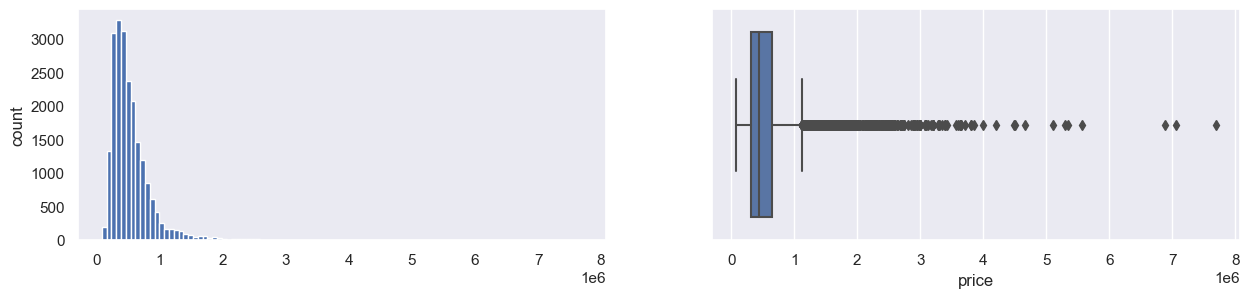

Distribution of room_bed
Skewness  of room_bed : 1.98


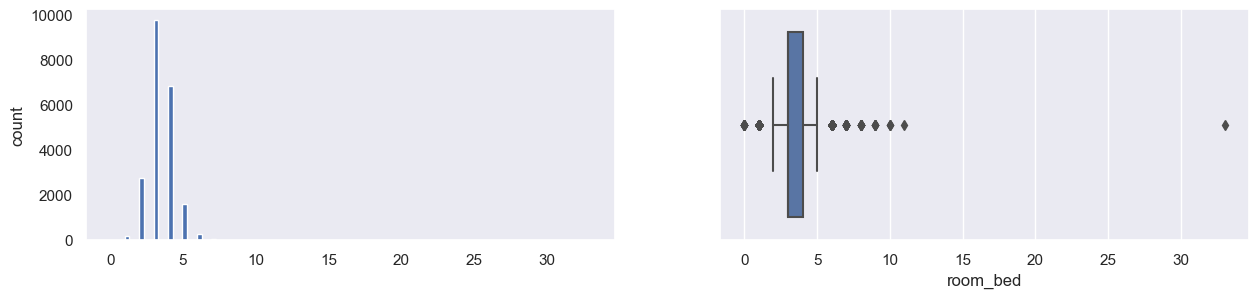

Distribution of room_bath
Skewness  of room_bath : 0.51


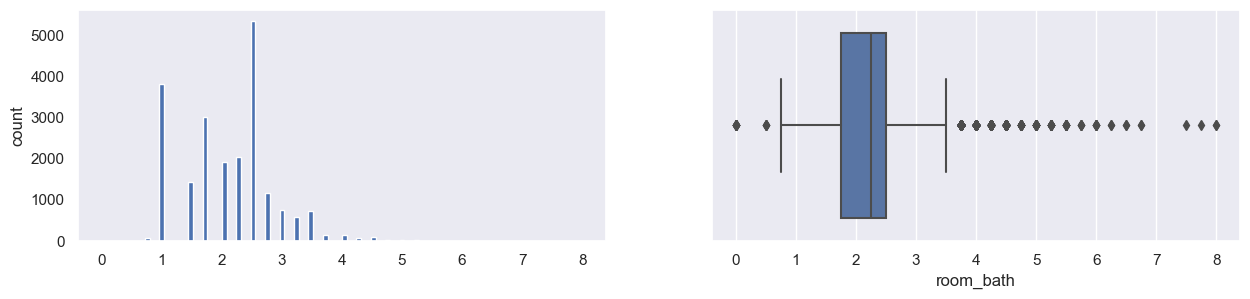

Distribution of living_measure
Skewness  of living_measure : 1.47


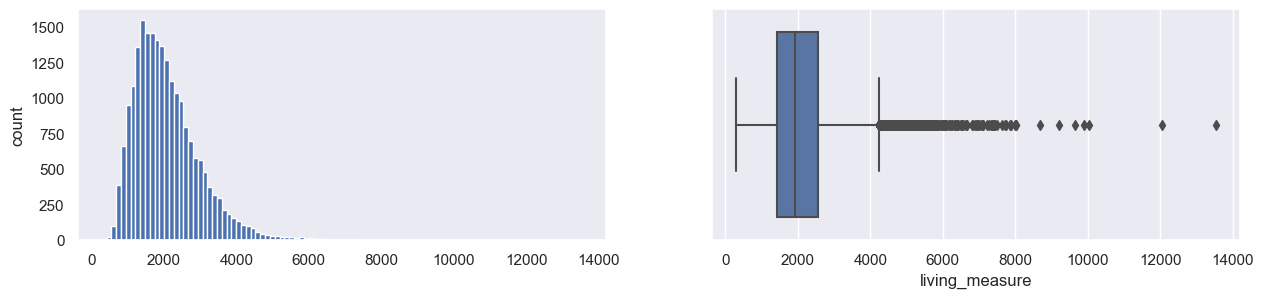

Distribution of lot_measure
Skewness  of lot_measure : 13.06


Distribution of ceil
Skewness  of ceil : 0.62


Distribution of ceil_measure
Skewness  of ceil_measure : 1.45


Distribution of basement
Skewness  of basement : 1.58


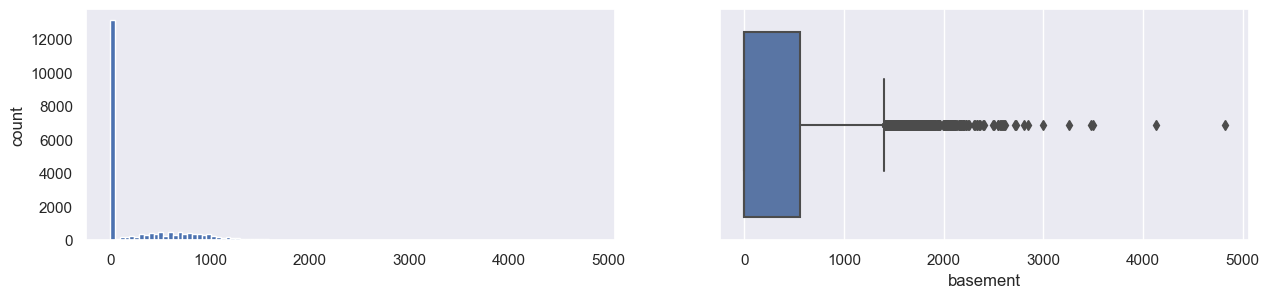

Distribution of yr_built
Skewness  of yr_built : -0.47


Distribution of yr_renovated
Skewness  of yr_renovated : 4.55


Distribution of living_measure15
Skewness  of living_measure15 : 1.11


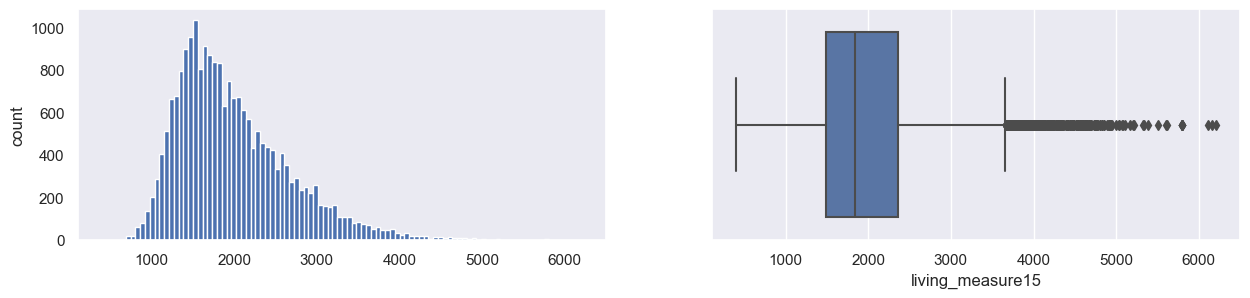

Distribution of lot_measure15
Skewness  of lot_measure15 : 9.51


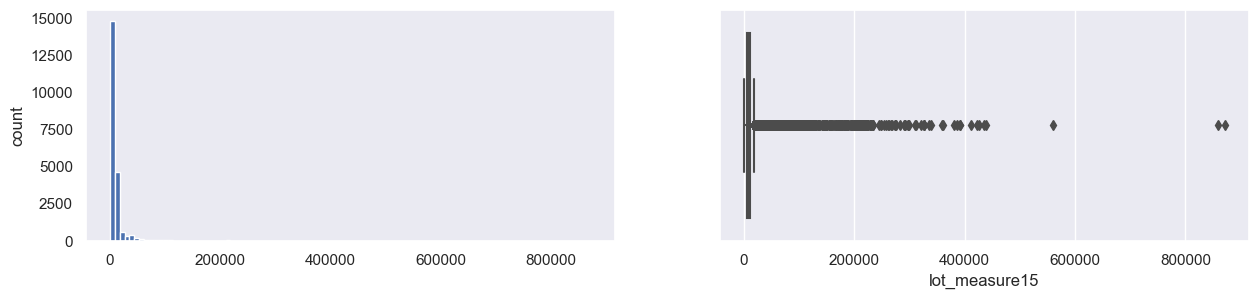

Distribution of total_area
Skewness  of total_area : 12.96


Distribution of Yr_sold
Skewness  of Yr_sold : 0.76


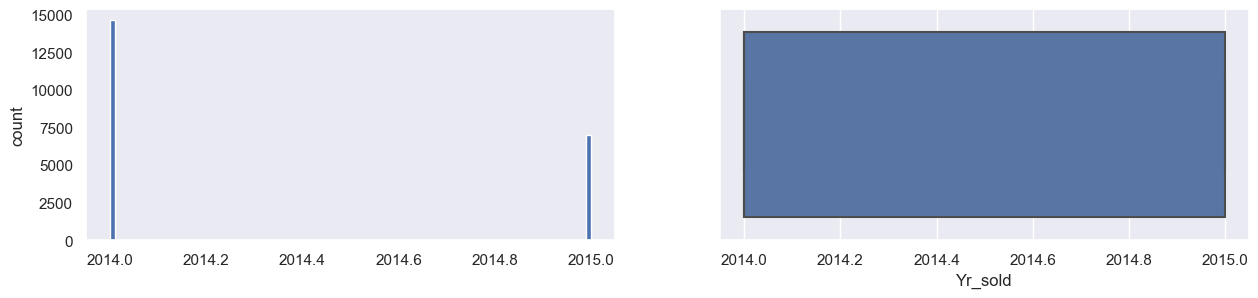

In [94]:
for col in df_num:
    print(f"Distribution of {col}")
    print(f"Skewness  of {col} : {round(df[col].skew(),2)}")
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    df[col].hist(bins=100, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()


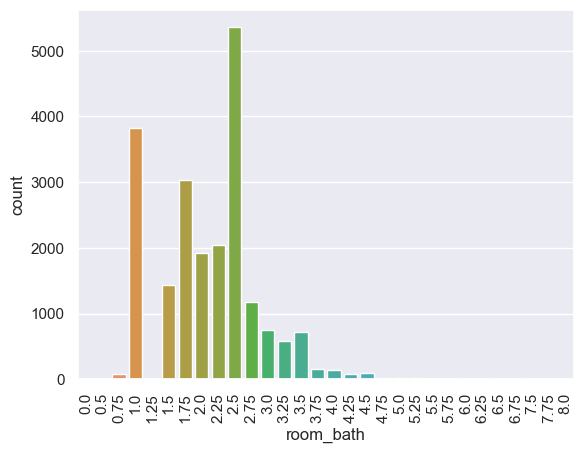

In [95]:
sns.countplot(data=df,x=df["room_bath"])
plt.xticks(rotation=90);

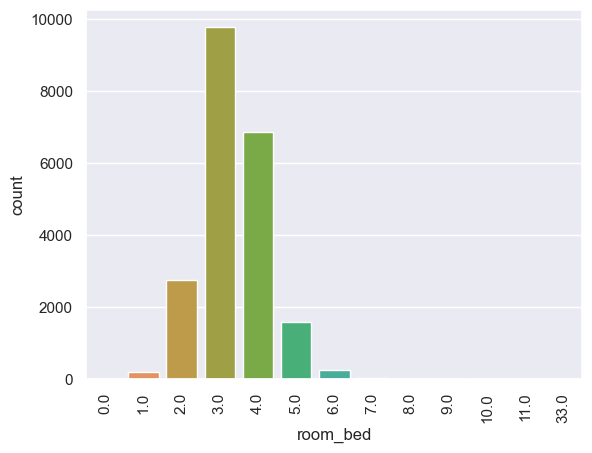

In [96]:
sns.countplot(data=df,x=df["room_bed"])
plt.xticks(rotation=90);

coast


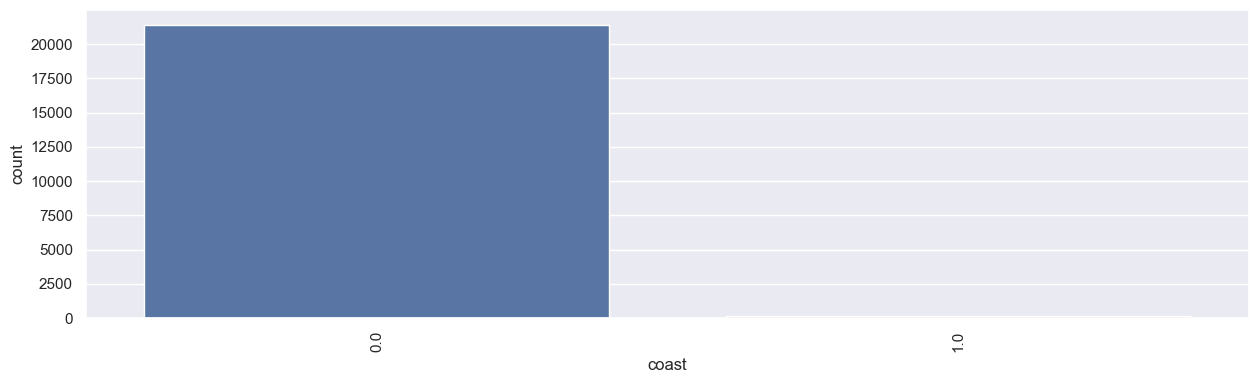

sight


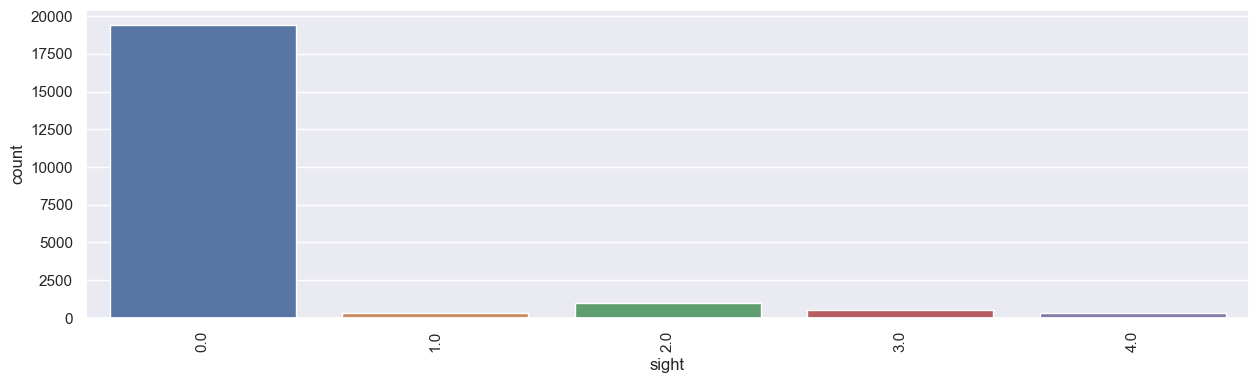

condition


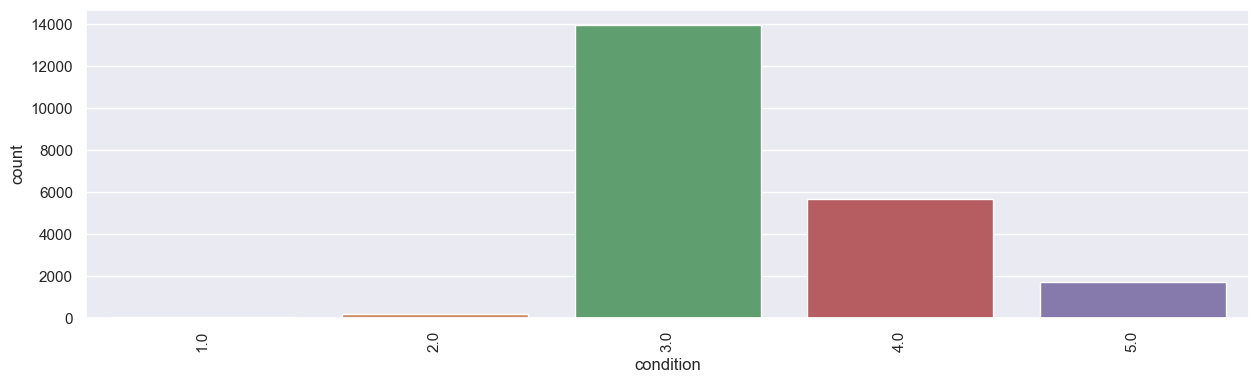

quality


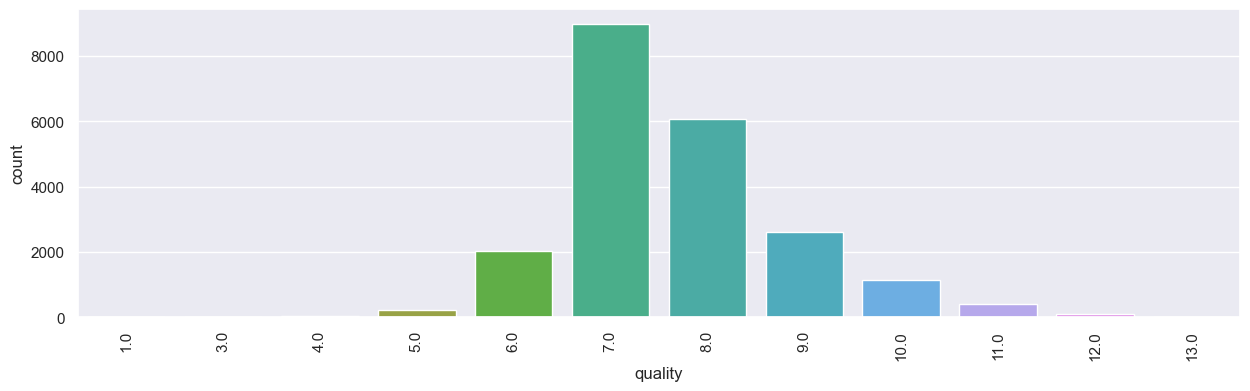

furnished


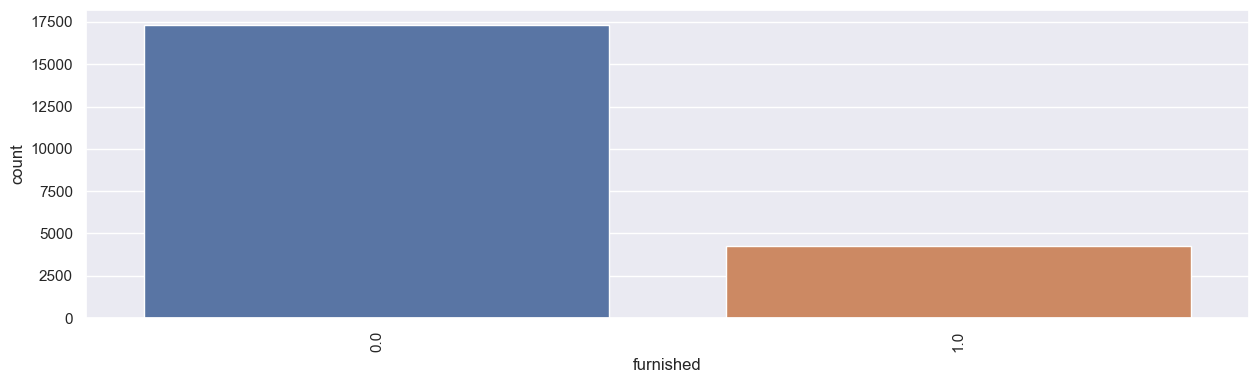

city


county_name


In [97]:
for col in df_cat:
    print(col)
    plt.figure(figsize=(15,4))
    plt.ylabel('count')
    sns.countplot(x=df[col])
    plt.xticks(rotation=90)
    plt.show()


coast


sight


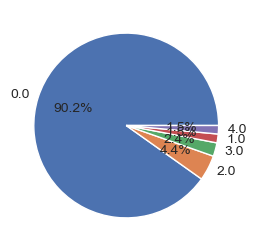

condition


quality


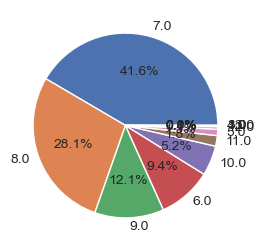

furnished


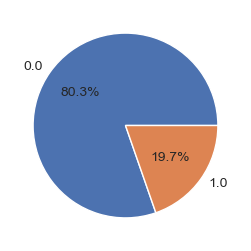

city


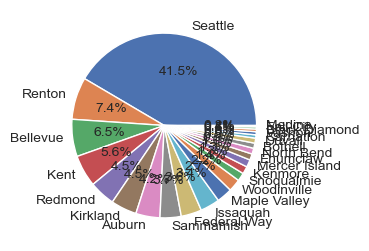

county_name


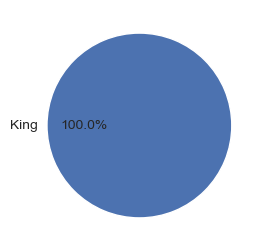

In [98]:
for col in df_cat:
    print(col)
    plt.figure(figsize=(8,3))
    labels = df[col].value_counts().keys()
    plt.pie(df[col].value_counts(), autopct="%.1f%%", labels=labels,textprops={'fontsize': 10})
    plt.xticks(rotation=90)
    plt.show()

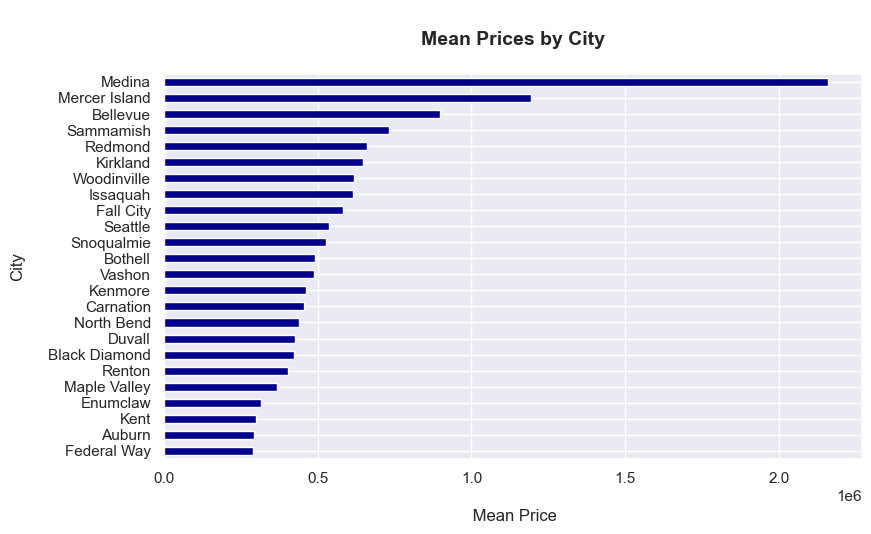

In [99]:
## Let's check the impact of cancellation policy on price

# group_by neighbourhood groups, take the median price and store new values in sub_df 
listings_grouped = pd.DataFrame(df.groupby(['city'])['price'].agg(np.mean))
listings_grouped.reset_index(inplace=True)

# plot this 
listings_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='city', y='price', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\n Mean Price', fontsize=12)
plt.ylabel('City\n', fontsize=12)
plt.title('\nMean Prices by City\n', fontsize=14, fontweight='bold');

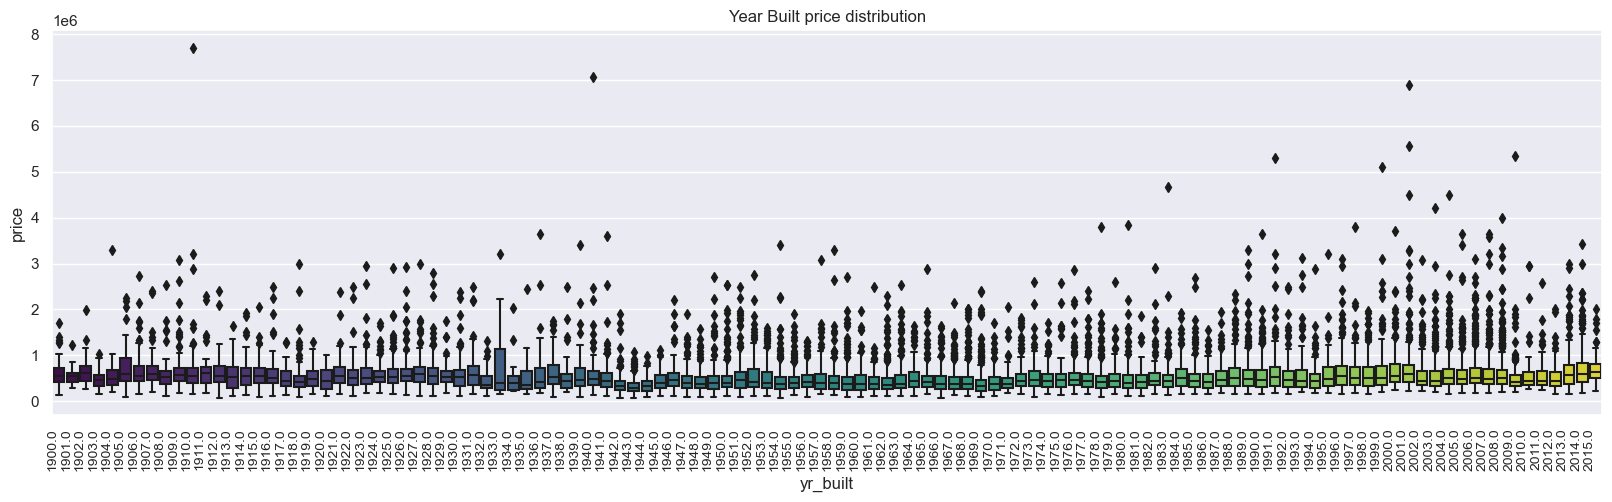

In [100]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="yr_built", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=10)
plt.title('Year Built price distribution')
chart;

## Multivariate  Analysis 

In [101]:
## Correlation Map of Numerical ariables 

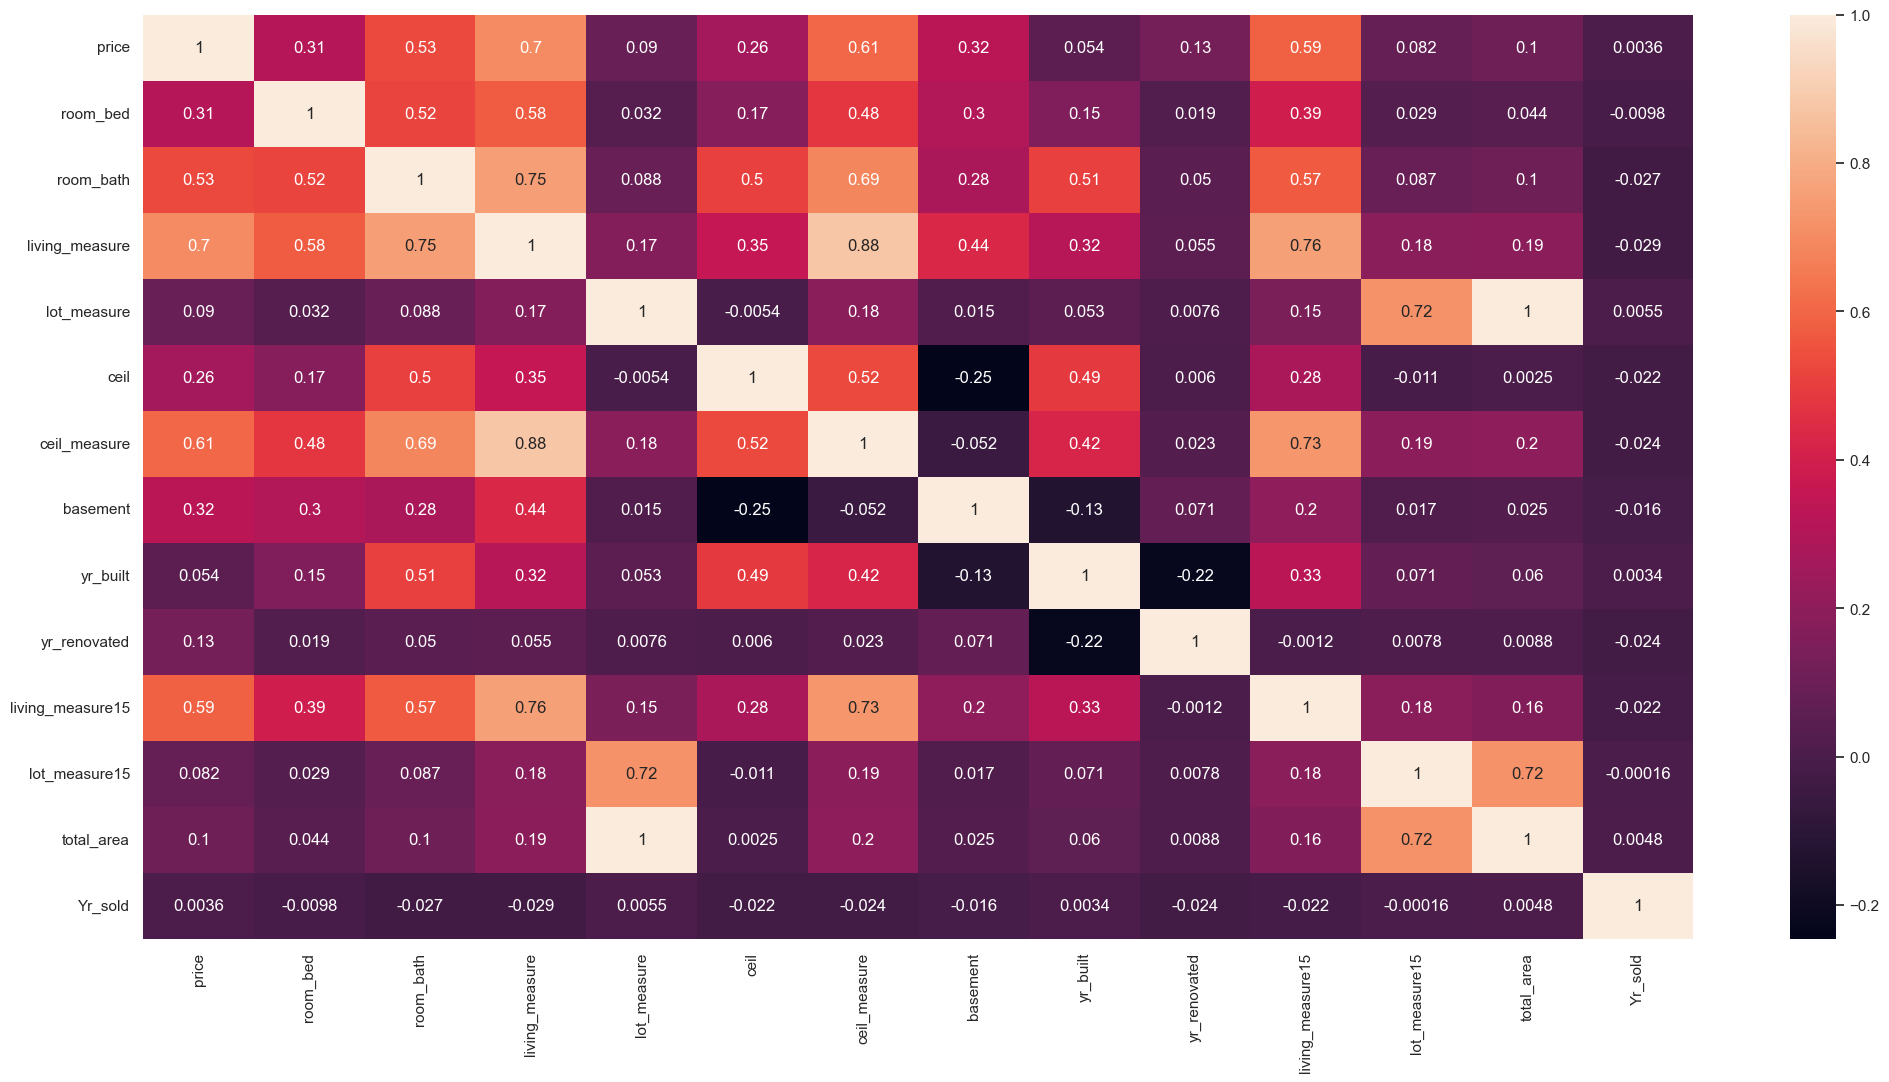

In [102]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),annot=True);

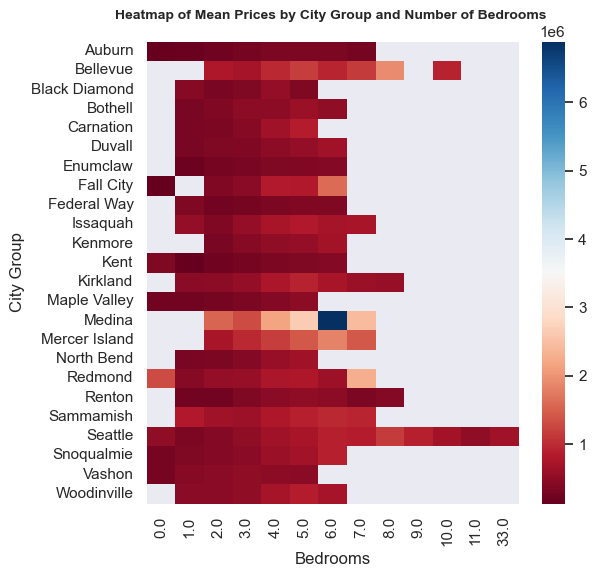

In [103]:
plt.figure(figsize=(6,6))
sns.heatmap(df.groupby(['city', 'room_bed']).price.mean().unstack(), 
            cmap='RdBu', fmt=".0f")

plt.xlabel('Bedrooms')
plt.ylabel('City Group')
plt.title('Heatmap of Mean Prices by City Group and Number of Bedrooms \n', fontsize=10, fontweight='bold');

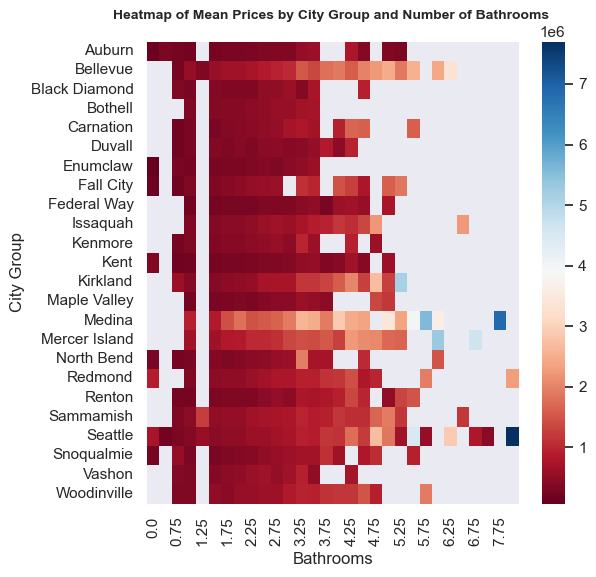

In [104]:
plt.figure(figsize=(6,6))
sns.heatmap(df.groupby(['city', 'room_bath']).price.mean().unstack(), 
            cmap='RdBu', fmt=".0f")

plt.xlabel('Bathrooms')
plt.ylabel('City Group')
plt.title('Heatmap of Mean Prices by City Group and Number of Bathrooms \n', fontsize=10, fontweight='bold');

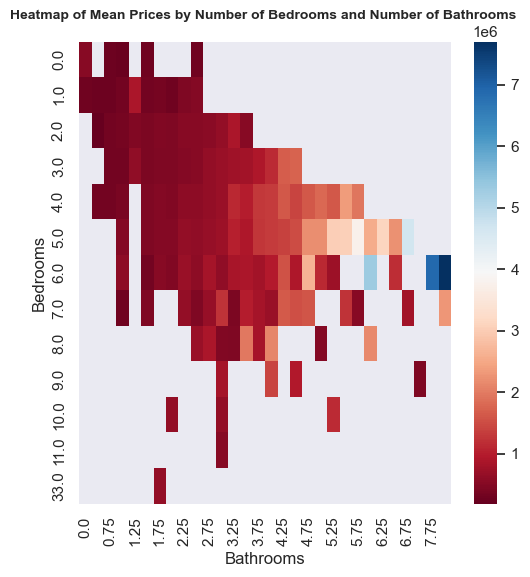

In [105]:
plt.figure(figsize=(6,6))
sns.heatmap(df.groupby(['room_bed', 'room_bath']).price.mean().unstack(), 
            cmap='RdBu', fmt=".0f")

plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')
plt.title('Heatmap of Mean Prices by Number of Bedrooms and Number of Bathrooms \n', fontsize=10, fontweight='bold');

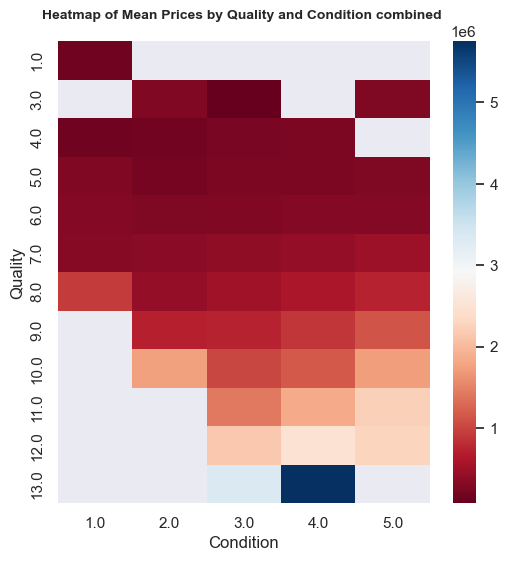

In [106]:
plt.figure(figsize=(6,6))
sns.heatmap(df.groupby(['quality', 'condition']).price.mean().unstack(), 
            cmap='RdBu', fmt=".0f")

plt.xlabel('Condition')
plt.ylabel('Quality')
plt.title('Heatmap of Mean Prices by Quality and Condition combined \n', fontsize=10, fontweight='bold');

In [107]:
#Getting the measure of how old is the house
df['years old']=int(0)
for index,row in df.iterrows():
    df.at[index,'years old']=row['Yr_sold']-row['yr_built']
    
df[['years old']].head()

years old
0      49.00
1      67.00
2      48.00
3       5.00
4      91.00

In [108]:
#Getting the measure of is house is  renovated
df['is_renovated'] =int(0)
for index,row in df.iterrows():
    if row['yr_renovated']!=int(0):
        df.at[index,'is_renovated']=int(1)
    


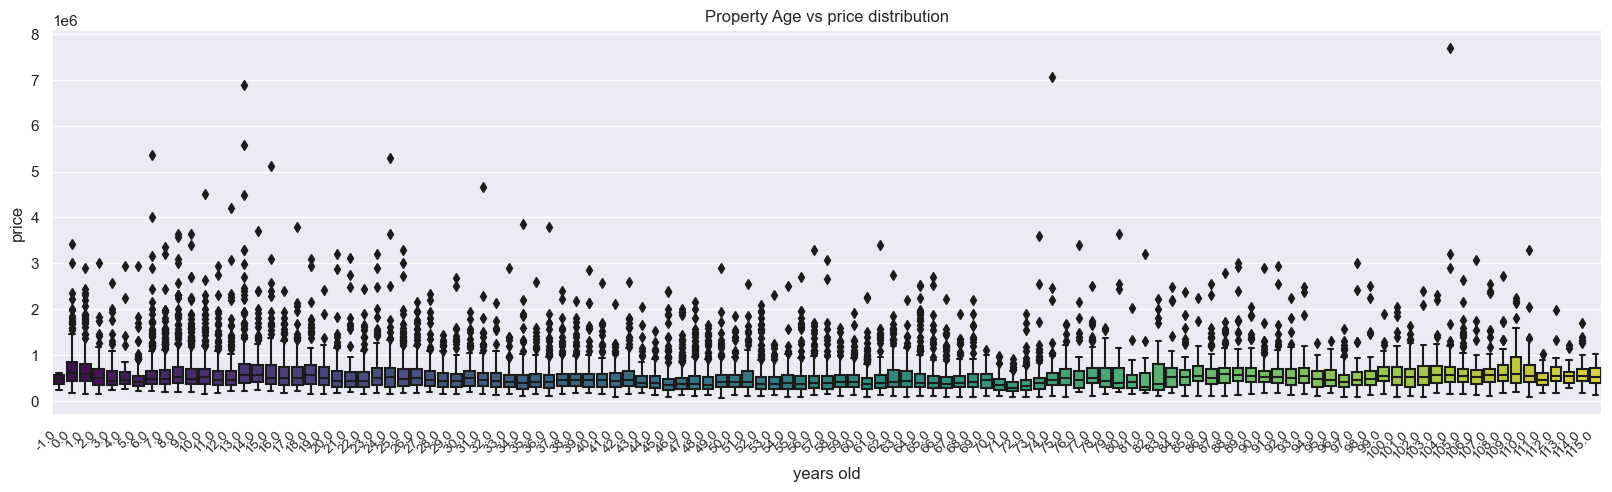

In [109]:
## Let's check if being a superhost has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="years old", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
plt.title('Property Age vs price distribution')
chart;

In [110]:
df.drop(['yr_renovated','coast','county_name','yr_built','Yr_sold'],axis=1,inplace=True)

In [111]:
df.drop(['total_area'],axis=1,inplace=True)

In [112]:
df.isna().sum()[df.isna().sum()>0]

room_bed        108
room_bath       108
ceil             72
sight            57
condition        85
quality           1
ceil_measure      1
basement          1
furnished        29
years old        15
dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             21613 non-null  int64   
 1   room_bed          21505 non-null  float64 
 2   room_bath         21505 non-null  float64 
 3   living_measure    21613 non-null  float64 
 4   lot_measure       21613 non-null  float64 
 5   ceil              21541 non-null  float64 
 6   sight             21556 non-null  category
 7   condition         21528 non-null  category
 8   quality           21612 non-null  category
 9   ceil_measure      21612 non-null  float64 
 10  basement          21612 non-null  float64 
 11  living_measure15  21613 non-null  float64 
 12  lot_measure15     21613 non-null  float64 
 13  furnished         21584 non-null  category
 14  city              21613 non-null  object  
 15  years old         21598 non-null  float64 
 16  is_renovated      2161

In [114]:
df['furnished'] = df['furnished'].fillna(df['furnished'].mode()[0])

In [115]:
df['sight'] = df['sight'].fillna(df['sight'].mode()[0])

In [116]:
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

In [117]:
df['quality'] = df['quality'].fillna(df['quality'].mode()[0])

In [118]:
df.isna().sum()[df.isna().sum()>0]

room_bed        108
room_bath       108
ceil             72
ceil_measure      1
basement          1
years old        15
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             21613 non-null  int64   
 1   room_bed          21505 non-null  float64 
 2   room_bath         21505 non-null  float64 
 3   living_measure    21613 non-null  float64 
 4   lot_measure       21613 non-null  float64 
 5   ceil              21541 non-null  float64 
 6   sight             21613 non-null  category
 7   condition         21613 non-null  category
 8   quality           21613 non-null  category
 9   ceil_measure      21612 non-null  float64 
 10  basement          21612 non-null  float64 
 11  living_measure15  21613 non-null  float64 
 12  lot_measure15     21613 non-null  float64 
 13  furnished         21613 non-null  category
 14  city              21613 non-null  object  
 15  years old         21598 non-null  float64 
 16  is_renovated      2161

In [120]:
df['room_bed']=df['room_bed'].astype('float')

In [121]:
df['room_bath']=df['room_bath'].astype('float')

In [122]:
df['ceil']=df['ceil'].astype('float')

In [123]:
df['sight']=df['sight'].astype('float')

In [124]:
df['condition']=df['condition'].astype('float')

In [125]:
df['quality']=df['quality'].astype('float')

In [126]:
df['furnished']=df['furnished'].astype('float')

<AxesSubplot:>

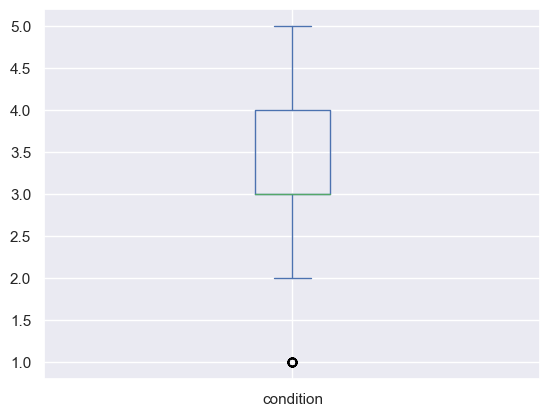

In [127]:
df['condition'].plot(kind='box')

<AxesSubplot:>

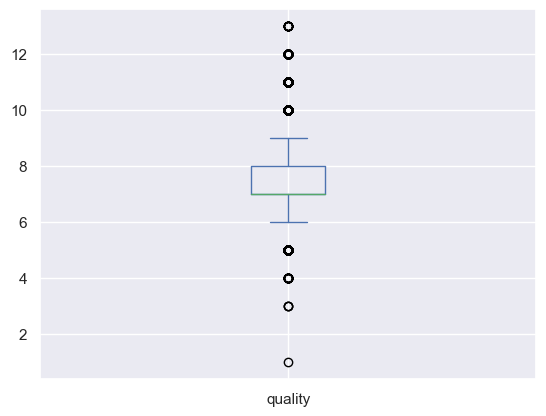

In [128]:
df['quality'].plot(kind='box')

<AxesSubplot:>

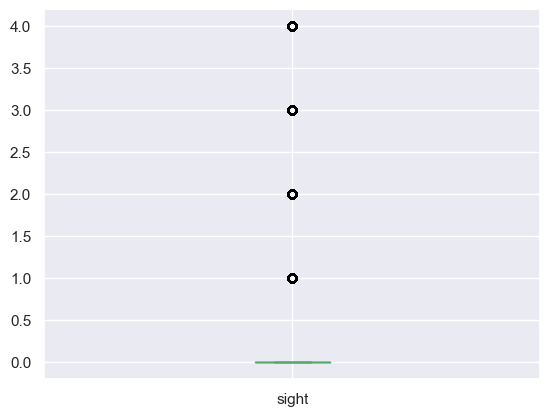

In [129]:
df['sight'].plot(kind='box')

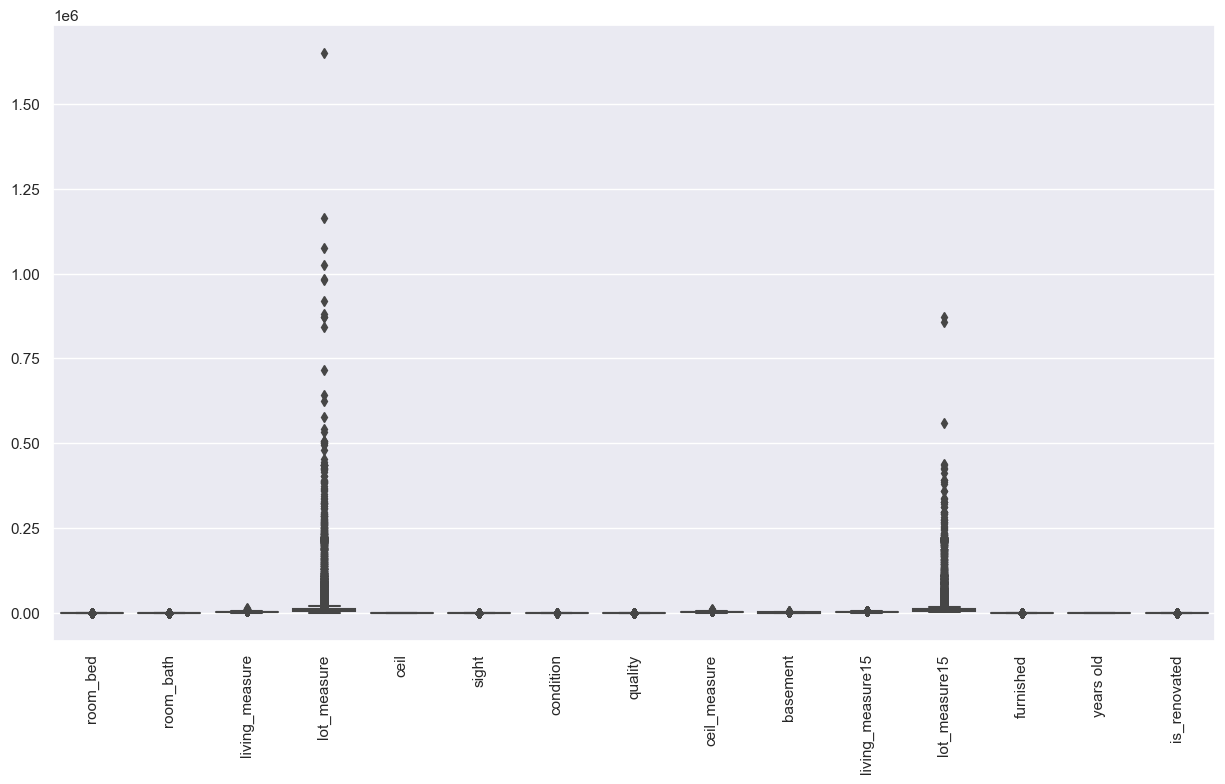

In [130]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df[['room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'furnished', 'city', 'years old',
       'is_renovated']])
plt.xticks(rotation=90);

In [131]:
df.city.value_counts(normalize=True)

Seattle         0.42
Renton          0.07
Bellevue        0.07
Kent            0.06
Redmond         0.05
Kirkland        0.05
Auburn          0.04
Sammamish       0.04
Federal Way     0.04
Issaquah        0.03
Maple Valley    0.03
Woodinville     0.02
Snoqualmie      0.01
Kenmore         0.01
Mercer Island   0.01
Enumclaw        0.01
North Bend      0.01
Bothell         0.01
Duvall          0.01
Carnation       0.01
Vashon          0.01
Black Diamond   0.00
Fall City       0.00
Medina          0.00
Name: city, dtype: float64

In [132]:
df.dtypes

price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                float64
sight               float64
condition           float64
quality             float64
ceil_measure        float64
basement            float64
living_measure15    float64
lot_measure15       float64
furnished           float64
city                 object
years old           float64
is_renovated          int64
dtype: object

### KNN Imputing Missing Values

In [133]:
df_imputed=df.drop('city',axis=1)

In [134]:
from sklearn.impute import KNNImputer
import pandas as pd

# Assuming df is your DataFrame
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df_imputed.columns)

In [135]:
df_imputed['city']=df['city']

In [136]:
df_imputed

price  room_bed  room_bath  living_measure  lot_measure  ceil  \
0      600000.00      4.00       1.75         3050.00      9440.00  1.00   
1      190000.00      2.00       1.00          670.00      3101.00  1.00   
2      735000.00      4.00       2.75         3040.00      2415.00  2.00   
3      257000.00      3.00       2.50         1740.00      3721.00  2.00   
4      450000.00      2.00       1.00         1120.00      4590.00  1.00   
...          ...       ...        ...             ...          ...   ...   
21608  685530.00      4.00       2.50         3130.00     60467.00  2.00   
21609  535000.00      2.00       1.00         1030.00      4841.00  1.00   
21610  998000.00      3.00       3.75         3710.00     34412.00  2.00   
21611  262000.00      4.00       2.50         1560.00      7800.00  2.00   
21612 1150000.00      4.00       2.50         1940.00      4875.00  2.00   

       sight  condition  quality  ceil_measure  basement  living_measure15  \
0       0.00       3.00     8.00       1800.00   1250.00           2020.00   
1       0.00       4.00     6.00        670.00      0.00           1660.00   
2       4.00       3.00     8.00       3040.00      0.00           2620.00   
3       0.00       3.00     8.00       1740.00      0.00           2030.00   
4       0.00       3.00     7.00       1120.00      0.00           1120.00   
...      ...        ...      ...           ...       ...               ...   
21608   0.00       3.00     9.00       3130.00      0.00           2780.00   
21609   0.00       3.00     7.00        920.00    110.00           1530.00   
21610   0.00       3.00    10.00       2910.00    800.00           2390.00   
21611   0.00       3.00     7.00       1560.00      0.00           1160.00   
21612   0.00       4.00     9.00       1940.00      0.00           1790.00   

       lot_measure15  furnished  years old  is_renovated       city  
0            8660.00       0.00      49.00          0.00   Kirkland  
1            4100.00       0.00      67.00          0.00    Seattle  
2            2433.00       0.00      48.00          0.00    Seattle  
3            3794.00       0.00       5.00          0.00     Auburn  
4            5100.00       0.00      91.00          0.00    Seattle  
...              ...        ...        ...           ...        ...  
21608       44224.00       1.00      19.00          0.00  Carnation  
21609        4944.00       0.00      75.00          0.00    Seattle  
21610       34412.00       1.00      36.00          0.00  Sammamish  
21611        7800.00       0.00      18.00          0.00    Seattle  
21612        4875.00       1.00      89.00          0.00    Seattle  

[21613 rows x 17 columns]

In [137]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  float64
 1   room_bed          21613 non-null  float64
 2   room_bath         21613 non-null  float64
 3   living_measure    21613 non-null  float64
 4   lot_measure       21613 non-null  float64
 5   ceil              21613 non-null  float64
 6   sight             21613 non-null  float64
 7   condition         21613 non-null  float64
 8   quality           21613 non-null  float64
 9   ceil_measure      21613 non-null  float64
 10  basement          21613 non-null  float64
 11  living_measure15  21613 non-null  float64
 12  lot_measure15     21613 non-null  float64
 13  furnished         21613 non-null  float64
 14  years old         21613 non-null  float64
 15  is_renovated      21613 non-null  float64
 16  city              21613 non-null  object

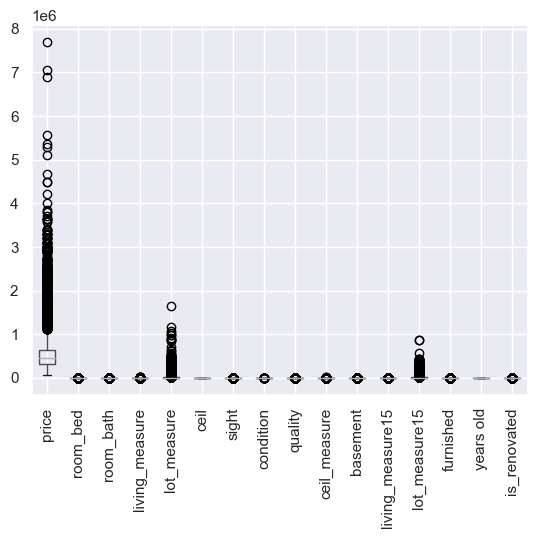

In [138]:
df_imputed.boxplot()
plt.xticks(rotation=90);

In [139]:

plt.figure(figsize=(18,8))
sns.heatmap(df_imputed.corr(),annot=True)

<AxesSubplot:>

In [140]:
def treat_outlier(x):
    # taking 25,75 percentile of column
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [141]:
Q1 = df_imputed.quantile(0.25)
Q3 = df_imputed.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [142]:
((df_imputed > UL) | (df_imputed < LL)).sum()[((df_imputed > UL) | (df_imputed < LL)).sum()>0]

basement             496
ceil_measure         611
condition             30
furnished           4246
is_renovated         914
living_measure       572
living_measure15     546
lot_measure         2425
lot_measure15       2196
price               1159
quality             1911
room_bath            570
room_bed             542
sight               2119
dtype: int64

In [143]:
((df_imputed > UL) | (df_imputed < LL)).sum()[((df_imputed > UL) | (df_imputed < LL)).sum()>0].index

Index(['basement', 'ceil_measure', 'condition', 'furnished', 'is_renovated',
       'living_measure', 'living_measure15', 'lot_measure', 'lot_measure15',
       'price', 'quality', 'room_bath', 'room_bed', 'sight'],
      dtype='object')

In [144]:
df_imputed.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'furnished', 'years old',
       'is_renovated', 'city'],
      dtype='object')

In [145]:
X_list=['room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15','years old','sight','condition','quality']

In [146]:
## treating Outliers
for i in X_list:    
    df_imputed[i]=treat_outlier(df_imputed[i])

In [147]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df_imputed)
plt.xticks(rotation ='vertical');

In [148]:
df_imputed.isnull().sum()

price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
living_measure15    0
lot_measure15       0
furnished           0
years old           0
is_renovated        0
city                0
dtype: int64

In [149]:
df_imputed.describe()

price  room_bed  room_bath  living_measure  lot_measure     ceil  \
count   21613.00  21613.00   21613.00        21613.00     21613.00 21613.00   
mean   540182.16      3.36       2.10         2058.08      8705.22     1.49   
std    367362.23      0.85       0.72          839.31      5046.48     0.54   
min     75000.00      1.50       0.62          290.00       520.00     1.00   
25%    321950.00      3.00       1.75         1427.00      5040.00     1.00   
50%    450000.00      3.00       2.25         1910.00      7618.00     1.50   
75%    645000.00      4.00       2.50         2550.00     10688.00     2.00   
max   7700000.00      5.50       3.62         4234.50     19160.00     3.50   

         sight  condition  quality  ceil_measure  basement  living_measure15  \
count 21613.00   21613.00 21613.00      21613.00  21613.00          21613.00   
mean      0.00       3.41     7.60       1769.54    284.07           1975.57   
std       0.00       0.65     1.00        764.02    417.06            650.02   
min       0.00       1.50     5.50        290.00      0.00            399.00   
25%       0.00       3.00     7.00       1190.00      0.00           1490.00   
50%       0.00       3.00     7.00       1560.00      0.00           1840.00   
75%       0.00       4.00     8.00       2210.00    560.00           2360.00   
max       0.00       5.00     9.50       3740.00   1400.00           3665.00   

       lot_measure15  furnished  years old  is_renovated  
count       21613.00   21613.00   21613.00      21613.00  
mean         8299.88       0.20      43.32          0.04  
std          4366.34       0.40      29.37          0.20  
min           651.00       0.00      -1.00          0.00  
25%          5100.00       0.00      18.00          0.00  
50%          7620.00       0.00      40.00          0.00  
75%         10086.00       0.00      63.00          0.00  
max         17565.00       1.00     115.00          1.00

In [150]:
df_imputed.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'furnished', 'years old',
       'is_renovated', 'city'],
      dtype='object')

In [151]:
plt.figure(figsize=(25,12))
sns.heatmap(df_imputed[['room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'furnished', 'years old',
       'is_renovated']].corr(),annot=True);

In [152]:
df_imputed.corr()

price  room_bed  room_bath  living_measure  lot_measure  \
price              1.00      0.32       0.48            0.65         0.20   
room_bed           0.32      1.00       0.53            0.62         0.19   
room_bath          0.48      0.53       1.00            0.75         0.11   
living_measure     0.65      0.62       0.75            1.00         0.35   
lot_measure        0.20      0.19       0.11            0.35         1.00   
ceil               0.26      0.18       0.51            0.36        -0.19   
sight               NaN       NaN        NaN             NaN          NaN   
condition          0.04      0.02      -0.13           -0.06         0.07   
quality            0.60      0.38       0.66            0.74         0.20   
ceil_measure       0.56      0.51       0.67            0.87         0.32   
basement           0.29      0.30       0.26            0.40         0.10   
living_measure15   0.57      0.42       0.57            0.77         0.39   
lot_measure15      0.19      0.18       0.11            0.33         0.91   
furnished          0.57      0.28       0.48            0.64         0.24   
years old         -0.05     -0.17      -0.53           -0.33        -0.04   
is_renovated       0.13      0.02       0.05            0.05         0.03   

                  ceil  sight  condition  quality  ceil_measure  basement  \
price             0.26    NaN       0.04     0.60          0.56      0.29   
room_bed          0.18    NaN       0.02     0.38          0.51      0.30   
room_bath         0.51    NaN      -0.13     0.66          0.67      0.26   
living_measure    0.36    NaN      -0.06     0.74          0.87      0.40   
lot_measure      -0.19    NaN       0.07     0.20          0.32      0.10   
ceil              1.00    NaN      -0.26     0.48          0.54     -0.26   
sight              NaN    NaN        NaN      NaN           NaN       NaN   
condition        -0.26    NaN       1.00    -0.15         -0.16      0.18   
quality           0.48    NaN      -0.15     1.00          0.74      0.14   
ceil_measure      0.54    NaN      -0.16     0.74          1.00     -0.09   
basement         -0.26    NaN       0.18     0.14         -0.09      1.00   
living_measure15  0.28    NaN      -0.09     0.70          0.73      0.18   
lot_measure15    -0.20    NaN       0.08     0.21          0.31      0.09   
furnished         0.35    NaN      -0.12     0.79          0.66      0.07   
years old        -0.49    NaN       0.36    -0.47         -0.44      0.14   
is_renovated      0.01    NaN      -0.06     0.01          0.02      0.07   

                  living_measure15  lot_measure15  furnished  years old  \
price                         0.57           0.19       0.57      -0.05   
room_bed                      0.42           0.18       0.28      -0.17   
room_bath                     0.57           0.11       0.48      -0.53   
living_measure                0.77           0.33       0.64      -0.33   
lot_measure                   0.39           0.91       0.24      -0.04   
ceil                          0.28          -0.20       0.35      -0.49   
sight                          NaN            NaN        NaN        NaN   
condition                    -0.09           0.08      -0.12       0.36   
quality                       0.70           0.21       0.79      -0.47   
ceil_measure                  0.73           0.31       0.66      -0.44   
basement                      0.18           0.09       0.07       0.14   
living_measure15              1.00           0.41       0.62      -0.33   
lot_measure15                 0.41           1.00       0.25      -0.06   
furnished                     0.62           0.25       1.00      -0.31   
years old                    -0.33          -0.06      -0.31       1.00   
is_renovated                 -0.00           0.03       0.02       0.22   

                  is_renovated  
price                     0.13  
room_bed                  0.02  
room_bath              

In [153]:
df_imputed.drop(['lot_measure15','ceil_measure','furnished','sight','living_measure15'],axis=1,inplace=True)

#### Encoding Variable City

In [154]:
df_imputed.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'condition', 'quality', 'basement', 'years old', 'is_renovated',
       'city'],
      dtype='object')

In [155]:
df_categorical=pd.get_dummies(df_imputed[['city']], prefix_sep='_',columns=['city'], drop_first=True)#getting dummies for numeric categorical variables

In [156]:
df_categorical['is_renovated']=df['is_renovated']
df_categorical.columns

Index(['city_Bellevue', 'city_Black Diamond', 'city_Bothell', 'city_Carnation',
       'city_Duvall', 'city_Enumclaw', 'city_Fall City', 'city_Federal Way',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Maple Valley', 'city_Medina', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_Seattle', 'city_Snoqualmie', 'city_Vashon', 'city_Woodinville',
       'is_renovated'],
      dtype='object')

## Scaling the Data 

In [157]:
from sklearn.preprocessing import MinMaxScaler
Y=df_imputed[['price']]
X_num=df_imputed.drop(['price','city','is_renovated'],axis=1)#getting only numerical attribultes
scaler = MinMaxScaler()
for col in X_num:
    X_num[col] = scaler.fit_transform(X_num[[col]])
X=pd.concat([X_num,df_categorical],axis=1)
X.columns

Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'condition', 'quality', 'basement', 'years old', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall City', 'city_Federal Way', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple Valley',
       'city_Medina', 'city_Mercer Island', 'city_North Bend', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_Seattle', 'city_Snoqualmie',
       'city_Vashon', 'city_Woodinville', 'is_renovated'],
      dtype='object')

In [158]:
X

room_bed  room_bath  living_measure  lot_measure  ceil  condition  \
0          0.62       0.37            0.70         0.48  0.00       0.43   
1          0.12       0.12            0.10         0.14  0.00       0.71   
2          0.62       0.71            0.70         0.10  0.40       0.43   
3          0.38       0.62            0.37         0.17  0.40       0.43   
4          0.12       0.12            0.21         0.22  0.00       0.43   
...         ...        ...             ...          ...   ...        ...   
21608      0.62       0.62            0.72         1.00  0.40       0.43   
21609      0.12       0.12            0.19         0.23  0.00       0.43   
21610      0.38       1.00            0.87         1.00  0.40       0.43   
21611      0.62       0.62            0.32         0.39  0.40       0.43   
21612      0.62       0.62            0.42         0.23  0.40       0.71   

       quality  basement  years old  city_Bellevue  city_Black Diamond  \
0         0.62      0.89       0.43              0                   0   
1         0.12      0.00       0.59              0                   0   
2         0.62      0.00       0.42              0                   0   
3         0.62      0.00       0.05              0                   0   
4         0.38      0.00       0.79              0                   0   
...        ...       ...        ...            ...                 ...   
21608     0.88      0.00       0.17              0                   0   
21609     0.38      0.08       0.66              0                   0   
21610     1.00      0.57       0.32              0                   0   
21611     0.38      0.00       0.16              0                   0   
21612     0.88      0.00       0.78              0                   0   

       city_Bothell  city_Carnation  city_Duvall  city_Enumclaw  \
0                 0               0            0              0   
1                 0               0            0              0   
2                 0               0            0              0   
3                 0               0            0              0   
4                 0               0            0              0   
...             ...             ...          ...            ...   
21608             0               1            0              0   
21609             0               0            0              0   
21610             0               0            0              0   
21611             0               0            0              0   
21612             0               0            0              0   

       city_Fall City  city_Federal Way  city_Issaquah  city_Kenmore  \
0                   0                 0              0             0   
1                   0                 0              0             0   
2                   0                 0              0             0   
3                   0                 0              0             0   
4                   0                 0              0             0   
...               ...               ...            ...           ...   
21608               0                 0              0             0   
21609               0                 0              0             0   
21610               0                 0              0             0   
21611               0                 0              0             0   
21612               0                 0              0             0   

       city_Kent  city_Kirkland  city_Maple Valley  city_Medina  \
0              0              1                  0            0   
1              0              0                  0            0   
2              0              0                  0            0   
3              0              0                  0            0   
4              0              0                  0            0   
...          ...            ...                ...          ...   
21608          0              0                  0            0   

In [159]:

df_final=pd.concat([X,Y],axis=1)
df_final

room_bed  room_bath  living_measure  lot_measure  ceil  condition  \
0          0.62       0.37            0.70         0.48  0.00       0.43   
1          0.12       0.12            0.10         0.14  0.00       0.71   
2          0.62       0.71            0.70         0.10  0.40       0.43   
3          0.38       0.62            0.37         0.17  0.40       0.43   
4          0.12       0.12            0.21         0.22  0.00       0.43   
...         ...        ...             ...          ...   ...        ...   
21608      0.62       0.62            0.72         1.00  0.40       0.43   
21609      0.12       0.12            0.19         0.23  0.00       0.43   
21610      0.38       1.00            0.87         1.00  0.40       0.43   
21611      0.62       0.62            0.32         0.39  0.40       0.43   
21612      0.62       0.62            0.42         0.23  0.40       0.71   

       quality  basement  years old  city_Bellevue  city_Black Diamond  \
0         0.62      0.89       0.43              0                   0   
1         0.12      0.00       0.59              0                   0   
2         0.62      0.00       0.42              0                   0   
3         0.62      0.00       0.05              0                   0   
4         0.38      0.00       0.79              0                   0   
...        ...       ...        ...            ...                 ...   
21608     0.88      0.00       0.17              0                   0   
21609     0.38      0.08       0.66              0                   0   
21610     1.00      0.57       0.32              0                   0   
21611     0.38      0.00       0.16              0                   0   
21612     0.88      0.00       0.78              0                   0   

       city_Bothell  city_Carnation  city_Duvall  city_Enumclaw  \
0                 0               0            0              0   
1                 0               0            0              0   
2                 0               0            0              0   
3                 0               0            0              0   
4                 0               0            0              0   
...             ...             ...          ...            ...   
21608             0               1            0              0   
21609             0               0            0              0   
21610             0               0            0              0   
21611             0               0            0              0   
21612             0               0            0              0   

       city_Fall City  city_Federal Way  city_Issaquah  city_Kenmore  \
0                   0                 0              0             0   
1                   0                 0              0             0   
2                   0                 0              0             0   
3                   0                 0              0             0   
4                   0                 0              0             0   
...               ...               ...            ...           ...   
21608               0                 0              0             0   
21609               0                 0              0             0   
21610               0                 0              0             0   
21611               0                 0              0             0   
21612               0                 0              0             0   

       city_Kent  city_Kirkland  city_Maple Valley  city_Medina  \
0              0              1                  0            0   
1              0              0                  0            0   
2              0              0                  0            0   
3              0              0                  0            0   
4              0              0                  0            0   
...          ...            ...                ...          ...   
21608          0              0                  0            0   

In [160]:
plt.figure(figsize=(25,12))
sns.heatmap(df_final.corr(),annot=True)

<AxesSubplot:>

## Outlier Treatment 

## Scaling

In [161]:
X.columns

Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'condition', 'quality', 'basement', 'years old', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall City', 'city_Federal Way', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple Valley',
       'city_Medina', 'city_Mercer Island', 'city_North Bend', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_Seattle', 'city_Snoqualmie',
       'city_Vashon', 'city_Woodinville', 'is_renovated'],
      dtype='object')

In [162]:
df_cluster=pd.concat([X,Y],axis=1)

## Clustering 

In [163]:
from sklearn.cluster import KMeans

In [164]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_cluster)
    wss.append(KM.inertia_)

In [165]:
wss

[2916647660865315.0,
 1354533573686278.0,
 731190886059276.5,
 460759311153162.6,
 324373646167466.2,
 237706829012395.0,
 179332882818470.56,
 135786593802553.53,
 110669904234408.92,
 87624527431832.5]

Text(0.5, 1.0, 'K Value Vs WSS')

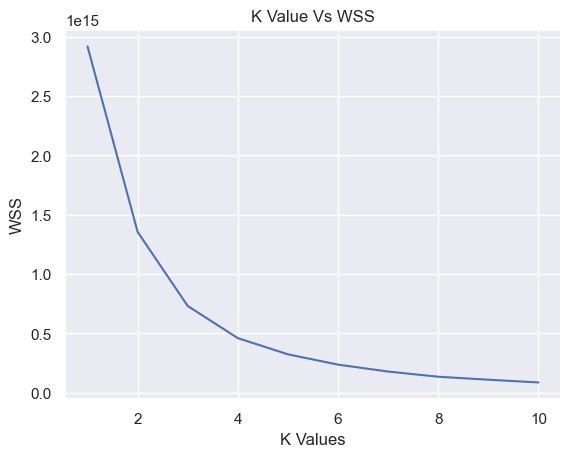

In [166]:
plt.plot(range(1,11), wss);
plt.xlabel('K Values')
plt.ylabel('WSS')
plt.title('K Value Vs WSS')

In [167]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [168]:
from sklearn.metrics import silhouette_samples, silhouette_score
ss={}
for i in range(2,11):
    k_means=KMeans(n_clusters=i,random_state=42)
    k_means.fit(df_cluster)
    y=k_means.labels_
    s=silhouette_score(df_cluster,y)
    ss[i]=round(s,5)
    print("The Average Silhouette Score for {}clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2clusters is 0.75136
The Average Silhouette Score for 3clusters is 0.60909
The Average Silhouette Score for 4clusters is 0.59348
The Average Silhouette Score for 5clusters is 0.56012
The Average Silhouette Score for 6clusters is 0.56087
The Average Silhouette Score for 7clusters is 0.54768
The Average Silhouette Score for 8clusters is 0.54202
The Average Silhouette Score for 9clusters is 0.54274
The Average Silhouette Score for 10clusters is 0.53488


In [169]:
fig,ax =plt.subplots(figsize=(12,4))
sns.pointplot(list(ss.keys()),list(ss.values()))
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette Score')
plt.show()

In [170]:
k_means = KMeans(n_clusters =2,random_state=123)
k_means.fit(df_cluster)
labels=k_means.labels_

In [171]:
df_imputed['Cluster'] = labels
df_imputed.head().T

0         1         2         3         4
price          600000.00 190000.00 735000.00 257000.00 450000.00
room_bed            4.00      2.00      4.00      3.00      2.00
room_bath           1.75      1.00      2.75      2.50      1.00
living_measure   3050.00    670.00   3040.00   1740.00   1120.00
lot_measure      9440.00   3101.00   2415.00   3721.00   4590.00
ceil                1.00      1.00      2.00      2.00      1.00
condition           3.00      4.00      3.00      3.00      3.00
quality             8.00      6.00      8.00      8.00      7.00
basement         1250.00      0.00      0.00      0.00      0.00
years old          49.00     67.00     48.00      5.00     91.00
is_renovated        0.00      0.00      0.00      0.00      0.00
city            Kirkland   Seattle   Seattle    Auburn   Seattle
Cluster                0         0         0         0         0

## Cluster Profiling

In [172]:
df_imputed.groupby('Cluster').agg({'price':'mean', 'living_measure':'mean', 'lot_measure':'mean', 'quality':'mean','basement':'mean','room_bath':'mean','room_bed':'mean','ceil':'mean','condition':'mean','years old':'mean'})



price  living_measure  lot_measure  quality  basement  room_bath  \
Cluster                                                                         
0        467832.93         1951.87      8481.79     7.49    259.60       2.03   
1       1538849.32         3524.18     11789.40     9.12    621.81       3.01   

         room_bed  ceil  condition  years old  
Cluster                                        
0            3.32  1.47       3.40      43.59  
1            4.03  1.81       3.47      39.59

In [173]:
df['Clus_kmeans'] = labels
df

price  room_bed  room_bath  living_measure  lot_measure  ceil  sight  \
0       600000      4.00       1.75         3050.00      9440.00  1.00   0.00   
1       190000      2.00       1.00          670.00      3101.00  1.00   0.00   
2       735000      4.00       2.75         3040.00      2415.00  2.00   4.00   
3       257000      3.00       2.50         1740.00      3721.00  2.00   0.00   
4       450000      2.00       1.00         1120.00      4590.00  1.00   0.00   
...        ...       ...        ...             ...          ...   ...    ...   
21608   685530      4.00       2.50         3130.00     60467.00  2.00   0.00   
21609   535000      2.00       1.00         1030.00      4841.00  1.00   0.00   
21610   998000      3.00       3.75         3710.00     34412.00  2.00   0.00   
21611   262000      4.00       2.50         1560.00      7800.00  2.00   0.00   
21612  1150000      4.00       2.50         1940.00      4875.00  2.00   0.00   

       condition  quality  ceil_measure  basement  living_measure15  \
0           3.00     8.00       1800.00   1250.00           2020.00   
1           4.00     6.00        670.00      0.00           1660.00   
2           3.00     8.00       3040.00      0.00           2620.00   
3           3.00     8.00       1740.00      0.00           2030.00   
4           3.00     7.00       1120.00      0.00           1120.00   
...          ...      ...           ...       ...               ...   
21608       3.00     9.00       3130.00      0.00           2780.00   
21609       3.00     7.00        920.00    110.00           1530.00   
21610       3.00    10.00       2910.00    800.00           2390.00   
21611       3.00     7.00       1560.00      0.00           1160.00   
21612       4.00     9.00       1940.00      0.00           1790.00   

       lot_measure15  furnished       city  years old  is_renovated  \
0            8660.00       0.00   Kirkland      49.00             0   
1            4100.00       0.00    Seattle      67.00             0   
2            2433.00       0.00    Seattle      48.00             0   
3            3794.00       0.00     Auburn       5.00             0   
4            5100.00       0.00    Seattle      91.00             0   
...              ...        ...        ...        ...           ...   
21608       44224.00       1.00  Carnation      19.00             0   
21609        4944.00       0.00    Seattle      75.00             0   
21610       34412.00       1.00  Sammamish      36.00             0   
21611        7800.00       0.00    Seattle      18.00             0   
21612        4875.00       1.00    Seattle      89.00             0   

       Clus_kmeans  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
21608            0  
21609            0  
21610            0  
21611            0  
21612            1  

[21613 rows x 18 columns]

In [174]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [175]:
euclidean=linkage(scaled_data,method='ward',metric='euclidean')

NameError: name 'scaled_data' is not defined

In [ ]:
dend=dendrogram(euclidean,truncate_mode='lastp',p=10)

In [ ]:
df_imputed_treated

## Modelling

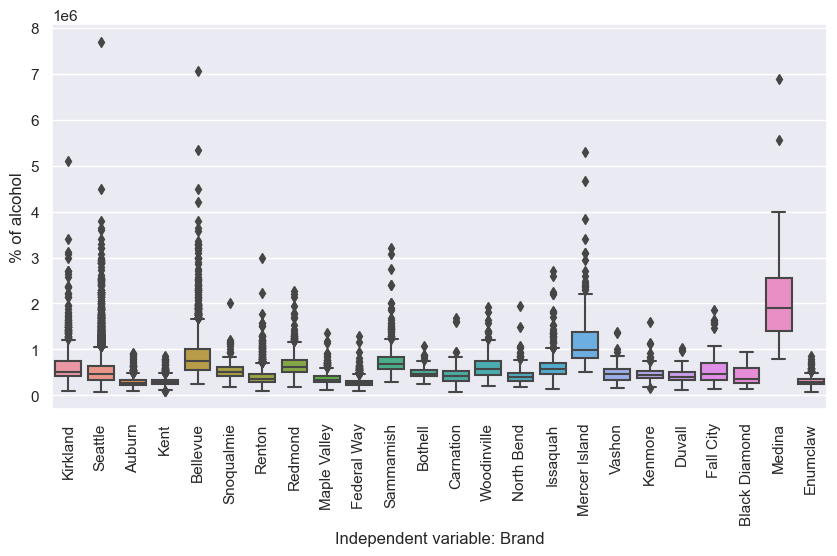

In [177]:
a4_dims = (10,5)
fig, ax = plt.subplots(figsize=a4_dims)
a = sns.boxplot(x= "city", y = 'price' , data = df)
plt.xlabel('Independent variable: Brand')
plt.ylabel('% of alcohol')
plt.xticks(rotation=90)
plt.show()

In [178]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [179]:
X_train.shape

(15129, 33)

In [180]:
X_train

room_bed  room_bath  living_measure  lot_measure  ceil  condition  \
2060       0.12       0.62            0.39         0.13  0.40       0.43   
11759      0.12       0.12            0.28         0.28  0.00       0.43   
8274       0.12       0.12            0.21         0.34  0.20       0.43   
21272      0.38       0.54            0.39         0.69  0.00       0.43   
14328      0.38       0.29            0.35         0.36  0.00       0.43   
...         ...        ...             ...          ...   ...        ...   
10955      0.88       0.79            0.39         0.13  0.40       0.43   
17289      0.62       0.37            0.41         0.39  0.40       0.71   
5192       0.62       0.88            0.79         0.24  0.40       0.43   
12172      0.62       0.37            0.47         0.41  0.00       0.43   
235        0.62       0.62            0.68         0.36  0.40       0.43   

       quality  basement  years old  city_Bellevue  city_Black Diamond  \
2060      0.38      0.00       0.09              0                   0   
11759     0.38      0.00       0.84              0                   0   
8274      0.12      0.00       0.61              0                   0   
21272     0.62      0.43       0.34              0                   0   
14328     0.38      0.49       0.46              0                   0   
...        ...       ...        ...            ...                 ...   
10955     0.38      0.00       0.15              0                   0   
17289     0.38      0.00       0.39              0                   0   
5192      1.00      0.78       0.06              0                   0   
12172     0.38      0.51       0.41              0                   0   
235       0.88      0.00       0.12              0                   0   

       city_Bothell  city_Carnation  city_Duvall  city_Enumclaw  \
2060              0               0            0              0   
11759             0               0            0              0   
8274              0               0            0              0   
21272             0               0            0              0   
14328             0               0            0              0   
...             ...             ...          ...            ...   
10955             0               0            0              0   
17289             0               0            0              0   
5192              0               0            1              0   
12172             0               0            0              0   
235               0               0            0              0   

       city_Fall City  city_Federal Way  city_Issaquah  city_Kenmore  \
2060                0                 0              1             0   
11759               0                 0              0             0   
8274                0                 0              0             0   
21272               0                 0              0             0   
14328               0                 0              0             0   
...               ...               ...            ...           ...   
10955               0                 0              0             0   
17289               0                 0              0             0   
5192                0                 0              0             0   
12172               0                 1              0             0   
235                 0                 0              0             0   

       city_Kent  city_Kirkland  city_Maple Valley  city_Medina  \
2060           0              0                  0            0   
11759          0              0                  0            0   
8274           0              0                  0            0   
21272          0              0                  0            0   
14328          0              0                  0            0   
...          ...            ...                ...          ...   
10955          0              0                  0            0   

In [181]:
X_test.shape

(6484, 33)

In [182]:
X_test

room_bed  room_bath  living_measure  lot_measure  ceil  condition  \
15544      0.38       0.71            0.42         0.63  0.00       0.43   
17454      0.62       0.62            0.52         1.00  0.40       0.14   
21548      0.62       0.62            0.78         0.38  0.40       0.43   
3427       0.62       0.71            0.51         0.24  0.20       1.00   
8809       0.12       0.12            0.13         0.32  0.00       0.71   
...         ...        ...             ...          ...   ...        ...   
14866      0.38       0.37            0.32         1.00  0.00       0.43   
4903       0.62       0.71            0.57         0.36  0.00       0.71   
16080      0.38       0.62            0.38         0.30  0.40       0.71   
15668      0.62       0.71            0.36         0.37  0.00       0.71   
18802      0.62       0.62            0.45         0.30  0.40       0.43   

       quality  basement  years old  city_Bellevue  city_Black Diamond  \
15544     0.38      0.50       0.51              0                   0   
17454     0.62      0.00       0.32              0                   0   
21548     0.88      0.00       0.12              0                   0   
3427      0.62      0.59       0.92              0                   0   
8809      0.12      0.00       0.53              0                   0   
...        ...       ...        ...            ...                 ...   
14866     0.38      0.00       0.35              0                   0   
4903      0.38      0.67       0.31              0                   0   
16080     0.38      0.00       0.25              0                   0   
15668     0.38      0.36       0.45              0                   0   
18802     0.62      0.00       0.08              0                   0   

       city_Bothell  city_Carnation  city_Duvall  city_Enumclaw  \
15544             0               0            0              0   
17454             0               0            0              0   
21548             0               0            0              0   
3427              0               0            0              0   
8809              0               0            0              0   
...             ...             ...          ...            ...   
14866             0               0            0              0   
4903              0               0            0              0   
16080             0               0            0              0   
15668             0               0            0              0   
18802             0               0            0              0   

       city_Fall City  city_Federal Way  city_Issaquah  city_Kenmore  \
15544               0                 0              0             1   
17454               0                 0              0             0   
21548               0                 0              0             0   
3427                0                 0              0             0   
8809                0                 0              0             0   
...               ...               ...            ...           ...   
14866               0                 0              0             0   
4903                0                 0              0             0   
16080               0                 0              0             0   
15668               0                 0              0             0   
18802               0                 0              0             0   

       city_Kent  city_Kirkland  city_Maple Valley  city_Medina  \
15544          0              0                  0            0   
17454          1              0                  0            0   
21548          0              0                  0            0   
3427           0              0                  0            0   
8809           0              0                  0            0   
...          ...            ...                ...          ...   
14866          0              0                  0            0   

In [183]:
y_train.shape

(15129, 1)

In [184]:
y_train

price
2060  524950.00
11759 320000.00
8274  325000.00
21272 515000.00
14328 225000.00
...         ...
10955 362000.00
17289 415000.00
5192  548000.00
12172 292500.00
235   698000.00

[15129 rows x 1 columns]

In [185]:
y_test.shape

(6484, 1)

In [186]:
y_test

price
15544 390000.00
17454 290000.00
21548 455000.00
3427  524000.00
8809  295000.00
...         ...
14866 310000.00
4903  335000.00
16080 296500.00
15668 461000.00
18802 410000.00

[6484 rows x 1 columns]

In [187]:
# let's add the intercept to data
X_lr = sm.add_constant(X)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(
    X_lr, Y, test_size=0.30, random_state=1
)

In [189]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [190]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     788.1
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:29:11   Log-Likelihood:            -2.0776e+05
No. Observations:               15129   AIC:                         4.156e+05
Df Residuals:                   15095   BIC:                         4.158e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.466e+05   1.28

In [191]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
);
print("VIF values: \n\n{}\n".format(vif_series1));

VIF values: 

const                50.03
room_bed              1.76
room_bath             3.40
living_measure        5.18
lot_measure           1.77
ceil                  2.36
condition             1.29
quality               3.01
basement              1.94
years old             2.67
city_Bellevue         2.48
city_Black Diamond    1.12
city_Bothell          1.20
city_Carnation        1.16
city_Duvall           1.21
city_Enumclaw         1.25
city_Fall City        1.10
city_Federal Way      1.83
city_Issaquah         1.76
city_Kenmore          1.31
city_Kent             2.23
city_Kirkland         2.02
city_Maple Valley     1.62
city_Medina           1.08
city_Mercer Island    1.33
city_North Bend       1.24
city_Redmond          2.03
city_Renton           2.57
city_Sammamish        1.92
city_Seattle          7.23
city_Snoqualmie       1.36
city_Vashon           1.14
city_Woodinville      1.55
is_renovated          1.16
dtype: float64



In [192]:
X_train1 = X_train.drop(['city_Seattle'], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.621 
Adjusted R-squared: 0.621


In [193]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
);
print("VIF values: \n\n{}\n".format(vif_series1));

VIF values: 

const                30.27
room_bed              1.75
room_bath             3.40
living_measure        5.17
lot_measure           1.73
ceil                  2.34
condition             1.28
quality               2.98
basement              1.90
years old             2.50
city_Bellevue         1.24
city_Black Diamond    1.04
city_Bothell          1.03
city_Carnation        1.05
city_Duvall           1.05
city_Enumclaw         1.05
city_Fall City        1.03
city_Federal Way      1.11
city_Issaquah         1.12
city_Kenmore          1.04
city_Kent             1.20
city_Kirkland         1.12
city_Maple Valley     1.13
city_Medina           1.03
city_Mercer Island    1.07
city_North Bend       1.06
city_Redmond          1.20
city_Renton           1.23
city_Sammamish        1.21
city_Snoqualmie       1.08
city_Vashon           1.05
city_Woodinville      1.16
is_renovated          1.15
dtype: float64



In [194]:
X_train2 = X_train1.drop(['living_measure'], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.584 
Adjusted R-squared: 0.583


In [195]:
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     684.2
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:29:17   Log-Likelihood:            -2.0870e+05
No. Observations:               15129   AIC:                         4.175e+05
Df Residuals:                   15097   BIC:                         4.177e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.413e+05   1.04

In [196]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
);
print("VIF values: \n\n{}\n".format(vif_series2));

VIF values: 

const                29.36
room_bed              1.54
room_bath             3.06
lot_measure           1.53
ceil                  2.23
condition             1.28
quality               2.24
basement              1.60
years old             2.45
city_Bellevue         1.24
city_Black Diamond    1.04
city_Bothell          1.03
city_Carnation        1.05
city_Duvall           1.05
city_Enumclaw         1.05
city_Fall City        1.03
city_Federal Way      1.11
city_Issaquah         1.12
city_Kenmore          1.04
city_Kent             1.20
city_Kirkland         1.12
city_Maple Valley     1.13
city_Medina           1.02
city_Mercer Island    1.07
city_North Bend       1.06
city_Redmond          1.19
city_Renton           1.22
city_Sammamish        1.21
city_Snoqualmie       1.06
city_Vashon           1.05
city_Woodinville      1.16
is_renovated          1.15
dtype: float64



In [197]:
X_train3 = X_train2.drop(['city_Snoqualmie'], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.584 
Adjusted R-squared: 0.583


In [198]:
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     707.1
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:29:19   Log-Likelihood:            -2.0870e+05
No. Observations:               15129   AIC:                         4.175e+05
Df Residuals:                   15098   BIC:                         4.177e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.415e+05   1.04

In [199]:
X_train4 = X_train3.drop(['city_Vashon'], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.584 
Adjusted R-squared: 0.583


In [200]:
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     731.4
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:29:19   Log-Likelihood:            -2.0870e+05
No. Observations:               15129   AIC:                         4.175e+05
Df Residuals:                   15099   BIC:                         4.177e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.416e+05   1.04

In [201]:
X_train5 = X_train4.drop(['city_Issaquah'], axis=1)
olsmod_5 = sm.OLS(y_train, X_train5)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.584 
Adjusted R-squared: 0.583


In [202]:
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     757.5
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:29:19   Log-Likelihood:            -2.0870e+05
No. Observations:               15129   AIC:                         4.175e+05
Df Residuals:                   15100   BIC:                         4.177e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.424e+05   1.04

In [203]:
X_train6 = X_train5.drop(['city_Carnation'], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.584 
Adjusted R-squared: 0.583


In [204]:
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     785.5
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:29:19   Log-Likelihood:            -2.0870e+05
No. Observations:               15129   AIC:                         4.175e+05
Df Residuals:                   15101   BIC:                         4.177e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -2.43e+05   1.03

In [205]:
X_train7 = X_train6.drop(['city_Woodinville'], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.584 
Adjusted R-squared: 0.583


In [206]:
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     815.5
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:29:20   Log-Likelihood:            -2.0870e+05
No. Observations:               15129   AIC:                         4.175e+05
Df Residuals:                   15102   BIC:                         4.177e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.431e+05   1.03

In [207]:
X_train8 = X_train7.drop(['city_North Bend'], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.584 
Adjusted R-squared: 0.583


In [208]:
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     847.9
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:29:20   Log-Likelihood:            -2.0870e+05
No. Observations:               15129   AIC:                         4.175e+05
Df Residuals:                   15103   BIC:                         4.177e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.445e+05   1.03

In [209]:
X_train9 = X_train8.drop(['city_Black Diamond'], axis=1)
olsmod_9 = sm.OLS(y_train, X_train9)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.584 
Adjusted R-squared: 0.583


In [210]:
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     882.9
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:29:20   Log-Likelihood:            -2.0870e+05
No. Observations:               15129   AIC:                         4.175e+05
Df Residuals:                   15104   BIC:                         4.176e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -2.45e+05   1.03

In [211]:
price_df_pred = pd.DataFrame()

price_df_pred["Actual Values"] = y_train.values.flatten()  # actual values
price_df_pred["Fitted Values"] = olsres_9.fittedvalues.values  # predicted values
price_df_pred["Residuals"] = olsres_9.resid.values  # residuals

price_df_pred.head(10)

Actual Values  Fitted Values  Residuals
0      524950.00      343475.67  181474.33
1      320000.00      468326.30 -148326.30
2      325000.00      222062.34  102937.66
3      515000.00      643204.28 -128204.28
4      225000.00      391984.25 -166984.25
5     1780000.00      798687.73  981312.27
6     1500000.00      860688.22  639311.78
7      405600.00      757696.47 -352096.47
8      265000.00      400301.68 -135301.68
9      368000.00      475917.41 -107917.41

In [212]:
X_train9

const  room_bed  room_bath  lot_measure  ceil  condition  quality  \
2060    1.00      0.12       0.62         0.13  0.40       0.43     0.38   
11759   1.00      0.12       0.12         0.28  0.00       0.43     0.38   
8274    1.00      0.12       0.12         0.34  0.20       0.43     0.12   
21272   1.00      0.38       0.54         0.69  0.00       0.43     0.62   
14328   1.00      0.38       0.29         0.36  0.00       0.43     0.38   
...      ...       ...        ...          ...   ...        ...      ...   
10955   1.00      0.88       0.79         0.13  0.40       0.43     0.38   
17289   1.00      0.62       0.37         0.39  0.40       0.71     0.38   
5192    1.00      0.62       0.88         0.24  0.40       0.43     1.00   
12172   1.00      0.62       0.37         0.41  0.00       0.43     0.38   
235     1.00      0.62       0.62         0.36  0.40       0.43     0.88   

       basement  years old  city_Bellevue  city_Bothell  city_Duvall  \
2060       0.00       0.09              0             0            0   
11759      0.00       0.84              0             0            0   
8274       0.00       0.61              0             0            0   
21272      0.43       0.34              0             0            0   
14328      0.49       0.46              0             0            0   
...         ...        ...            ...           ...          ...   
10955      0.00       0.15              0             0            0   
17289      0.00       0.39              0             0            0   
5192       0.78       0.06              0             0            1   
12172      0.51       0.41              0             0            0   
235        0.00       0.12              0             0            0   

       city_Enumclaw  city_Fall City  city_Federal Way  city_Kenmore  \
2060               0               0                 0             0   
11759              0               0                 0             0   
8274               0               0                 0             0   
21272              0               0                 0             0   
14328              0               0                 0             0   
...              ...             ...               ...           ...   
10955              0               0                 0             0   
17289              0               0                 0             0   
5192               0               0                 0             0   
12172              0               0                 1             0   
235                0               0                 0             0   

       city_Kent  city_Kirkland  city_Maple Valley  city_Medina  \
2060           0              0                  0            0   
11759          0              0                  0            0   
8274           0              0                  0            0   
21272          0              0                  0            0   
14328          0              0                  0            0   
...          ...            ...                ...          ...   
10955          0              0                  0            0   
17289          0              0                  0            0   
5192           0              0                  0            0   
12172          0              0                  0            0   
235            0              0                  0            0   

       city_Mercer Island  city_Redmond  city_Renton  city_Sammamish  \
2060                    0             0            0               0   
11759                   0             0            0               0   
8274                    0             0            0               0   
21272                   0             0            0               1   
14328                   0             0            0               0   
...                   ...           ...          ...             ...   
10955                   0             0            0   

In [213]:
X_train9.columns

Index(['const', 'room_bed', 'room_bath', 'lot_measure', 'ceil', 'condition',
       'quality', 'basement', 'years old', 'city_Bellevue', 'city_Bothell',
       'city_Duvall', 'city_Enumclaw', 'city_Fall City', 'city_Federal Way',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple Valley',
       'city_Medina', 'city_Mercer Island', 'city_Redmond', 'city_Renton',
       'city_Sammamish', 'is_renovated'],
      dtype='object')

In [214]:
X_test

const  room_bed  room_bath  living_measure  lot_measure  ceil  \
15544   1.00      0.38       0.71            0.42         0.63  0.00   
17454   1.00      0.62       0.62            0.52         1.00  0.40   
21548   1.00      0.62       0.62            0.78         0.38  0.40   
3427    1.00      0.62       0.71            0.51         0.24  0.20   
8809    1.00      0.12       0.12            0.13         0.32  0.00   
...      ...       ...        ...             ...          ...   ...   
14866   1.00      0.38       0.37            0.32         1.00  0.00   
4903    1.00      0.62       0.71            0.57         0.36  0.00   
16080   1.00      0.38       0.62            0.38         0.30  0.40   
15668   1.00      0.62       0.71            0.36         0.37  0.00   
18802   1.00      0.62       0.62            0.45         0.30  0.40   

       condition  quality  basement  years old  city_Bellevue  \
15544       0.43     0.38      0.50       0.51              0   
17454       0.14     0.62      0.00       0.32              0   
21548       0.43     0.88      0.00       0.12              0   
3427        1.00     0.62      0.59       0.92              0   
8809        0.71     0.12      0.00       0.53              0   
...          ...      ...       ...        ...            ...   
14866       0.43     0.38      0.00       0.35              0   
4903        0.71     0.38      0.67       0.31              0   
16080       0.71     0.38      0.00       0.25              0   
15668       0.71     0.38      0.36       0.45              0   
18802       0.43     0.62      0.00       0.08              0   

       city_Black Diamond  city_Bothell  city_Carnation  city_Duvall  \
15544                   0             0               0            0   
17454                   0             0               0            0   
21548                   0             0               0            0   
3427                    0             0               0            0   
8809                    0             0               0            0   
...                   ...           ...             ...          ...   
14866                   0             0               0            0   
4903                    0             0               0            0   
16080                   0             0               0            0   
15668                   0             0               0            0   
18802                   0             0               0            0   

       city_Enumclaw  city_Fall City  city_Federal Way  city_Issaquah  \
15544              0               0                 0              0   
17454              0               0                 0              0   
21548              0               0                 0              0   
3427               0               0                 0              0   
8809               0               0                 0              0   
...              ...             ...               ...            ...   
14866              0               0                 0              0   
4903               0               0                 0              0   
16080              0               0                 0              0   
15668              0               0                 0              0   
18802              0               0                 0              0   

       city_Kenmore  city_Kent  city_Kirkland  city_Maple Valley  city_Medina  \
15544             1          0              0                  0            0   
17454             0          1              0                  0            0   
21548             0          0              0                  0            0   
3427              0          0              0                  0            0   
8809              0          0              0                  0            0   
...             ...        ...            ...                ...          ...   
14866             0          0              0       

In [215]:
X_test.columns

Index(['const', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'condition', 'quality', 'basement', 'years old',
       'city_Bellevue', 'city_Black Diamond', 'city_Bothell', 'city_Carnation',
       'city_Duvall', 'city_Enumclaw', 'city_Fall City', 'city_Federal Way',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Maple Valley', 'city_Medina', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_Seattle', 'city_Snoqualmie', 'city_Vashon', 'city_Woodinville',
       'is_renovated'],
      dtype='object')

In [216]:
X_test.drop(['city_Seattle','city_Black Diamond','city_North Bend','city_Woodinville','city_Carnation','city_Issaquah','city_Vashon','city_Snoqualmie','living_measure'],axis=1,inplace=True)

In [217]:
X_test

const  room_bed  room_bath  lot_measure  ceil  condition  quality  \
15544   1.00      0.38       0.71         0.63  0.00       0.43     0.38   
17454   1.00      0.62       0.62         1.00  0.40       0.14     0.62   
21548   1.00      0.62       0.62         0.38  0.40       0.43     0.88   
3427    1.00      0.62       0.71         0.24  0.20       1.00     0.62   
8809    1.00      0.12       0.12         0.32  0.00       0.71     0.12   
...      ...       ...        ...          ...   ...        ...      ...   
14866   1.00      0.38       0.37         1.00  0.00       0.43     0.38   
4903    1.00      0.62       0.71         0.36  0.00       0.71     0.38   
16080   1.00      0.38       0.62         0.30  0.40       0.71     0.38   
15668   1.00      0.62       0.71         0.37  0.00       0.71     0.38   
18802   1.00      0.62       0.62         0.30  0.40       0.43     0.62   

       basement  years old  city_Bellevue  city_Bothell  city_Duvall  \
15544      0.50       0.51              0             0            0   
17454      0.00       0.32              0             0            0   
21548      0.00       0.12              0             0            0   
3427       0.59       0.92              0             0            0   
8809       0.00       0.53              0             0            0   
...         ...        ...            ...           ...          ...   
14866      0.00       0.35              0             0            0   
4903       0.67       0.31              0             0            0   
16080      0.00       0.25              0             0            0   
15668      0.36       0.45              0             0            0   
18802      0.00       0.08              0             0            0   

       city_Enumclaw  city_Fall City  city_Federal Way  city_Kenmore  \
15544              0               0                 0             1   
17454              0               0                 0             0   
21548              0               0                 0             0   
3427               0               0                 0             0   
8809               0               0                 0             0   
...              ...             ...               ...           ...   
14866              0               0                 0             0   
4903               0               0                 0             0   
16080              0               0                 0             0   
15668              0               0                 0             0   
18802              0               0                 0             0   

       city_Kent  city_Kirkland  city_Maple Valley  city_Medina  \
15544          0              0                  0            0   
17454          1              0                  0            0   
21548          0              0                  0            0   
3427           0              0                  0            0   
8809           0              0                  0            0   
...          ...            ...                ...          ...   
14866          0              0                  0            0   
4903           0              0                  0            0   
16080          1              0                  0            0   
15668          0              0                  0            0   
18802          0              0                  0            0   

       city_Mercer Island  city_Redmond  city_Renton  city_Sammamish  \
15544                   0             0            0               0   
17454                   0             0            0               0   
21548                   0             0            1               0   
3427                    0             0            0               0   
8809                    0             0            0               0   
...                   ...           ...          ...             ...   
14866                   0             0            0   

In [218]:
X_train9

const  room_bed  room_bath  lot_measure  ceil  condition  quality  \
2060    1.00      0.12       0.62         0.13  0.40       0.43     0.38   
11759   1.00      0.12       0.12         0.28  0.00       0.43     0.38   
8274    1.00      0.12       0.12         0.34  0.20       0.43     0.12   
21272   1.00      0.38       0.54         0.69  0.00       0.43     0.62   
14328   1.00      0.38       0.29         0.36  0.00       0.43     0.38   
...      ...       ...        ...          ...   ...        ...      ...   
10955   1.00      0.88       0.79         0.13  0.40       0.43     0.38   
17289   1.00      0.62       0.37         0.39  0.40       0.71     0.38   
5192    1.00      0.62       0.88         0.24  0.40       0.43     1.00   
12172   1.00      0.62       0.37         0.41  0.00       0.43     0.38   
235     1.00      0.62       0.62         0.36  0.40       0.43     0.88   

       basement  years old  city_Bellevue  city_Bothell  city_Duvall  \
2060       0.00       0.09              0             0            0   
11759      0.00       0.84              0             0            0   
8274       0.00       0.61              0             0            0   
21272      0.43       0.34              0             0            0   
14328      0.49       0.46              0             0            0   
...         ...        ...            ...           ...          ...   
10955      0.00       0.15              0             0            0   
17289      0.00       0.39              0             0            0   
5192       0.78       0.06              0             0            1   
12172      0.51       0.41              0             0            0   
235        0.00       0.12              0             0            0   

       city_Enumclaw  city_Fall City  city_Federal Way  city_Kenmore  \
2060               0               0                 0             0   
11759              0               0                 0             0   
8274               0               0                 0             0   
21272              0               0                 0             0   
14328              0               0                 0             0   
...              ...             ...               ...           ...   
10955              0               0                 0             0   
17289              0               0                 0             0   
5192               0               0                 0             0   
12172              0               0                 1             0   
235                0               0                 0             0   

       city_Kent  city_Kirkland  city_Maple Valley  city_Medina  \
2060           0              0                  0            0   
11759          0              0                  0            0   
8274           0              0                  0            0   
21272          0              0                  0            0   
14328          0              0                  0            0   
...          ...            ...                ...          ...   
10955          0              0                  0            0   
17289          0              0                  0            0   
5192           0              0                  0            0   
12172          0              0                  0            0   
235            0              0                  0            0   

       city_Mercer Island  city_Redmond  city_Renton  city_Sammamish  \
2060                    0             0            0               0   
11759                   0             0            0               0   
8274                    0             0            0               0   
21272                   0             0            0               1   
14328                   0             0            0               0   
...                   ...           ...          ...             ...   
10955                   0             0            0   

In [219]:
y_pred_test = olsres_9.predict(X_test)


In [220]:
y_pred_train = olsres_9.predict(X_train9)

In [221]:
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse1

237054.5227455606

In [222]:
mae1 = np.sqrt(mean_absolute_error(y_train, y_pred_train))
mae1

375.5025527636032

In [223]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

239742.29649863145

In [224]:
mae2 = np.sqrt(mean_absolute_error(y_test, y_pred_test))
mae2

378.6509775720719

In [225]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [227]:
olsmod_10 = sm.OLS(y_test, X_test)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.578 
Adjusted R-squared: 0.577


In [228]:
regression_model = LinearRegression()
regression_model.fit(X_train9, y_train)

LinearRegression()

In [229]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train9, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.5838323786336563


In [230]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.5734883114962881


In [231]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 239742.29649863145


In [232]:
print("The Root Mean Square Error (RMSE) of the model is for training set is",np.sqrt(mean_squared_error(y_train,regression_model.predict(X_train9))))

The Root Mean Square Error (RMSE) of the model is for training set is 237054.5227455606


In [233]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=price_df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

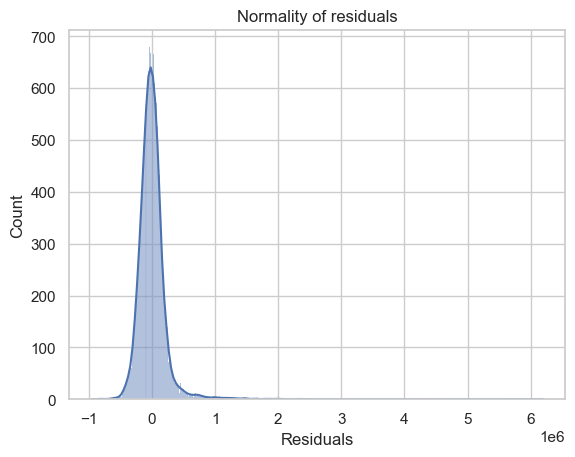

In [234]:
sns.histplot(price_df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()


The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

Null hypothesis - Data is normally distributed.
Alternate hypothesis - Data is not normally distributed.
sta

In [235]:
stats.shapiro(price_df_pred["Residuals"])

ShapiroResult(statistic=0.7161835432052612, pvalue=0.0)

Heteroscedasticity

The null and alternate hypotheses of the goldfeldquandt test are as follows:

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity

In [236]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


In [237]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(price_df_pred["Residuals"], X_train9)
lzip(name, test)


[('F statistic', 1.283247165693007), ('p-value', 1.4911528580991405e-27)]

In [238]:
import pylab
import scipy.stats as stats

stats.probplot(price_df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()


In [239]:
olsres_9.params

const                -244962.57
room_bed              -41431.89
room_bath             295760.54
lot_measure            95218.35
ceil                  234673.61
condition              38993.66
quality               667365.50
basement              152897.45
years old             417494.06
city_Bellevue         230814.00
city_Bothell          -42573.43
city_Duvall           -48402.55
city_Enumclaw        -128241.54
city_Fall City         90720.96
city_Federal Way     -184517.64
city_Kenmore          -52676.84
city_Kent            -140504.53
city_Kirkland         110738.49
city_Maple Valley     -99867.94
city_Medina          1218476.56
city_Mercer Island    420760.73
city_Redmond           76831.34
city_Renton           -72586.59
city_Sammamish         38192.77
is_renovated           38338.86
dtype: float64

In [240]:
# Let us write the equation of linear regression
Equation = "price="
print(Equation, end=" ")
for i in range(len(X_train9.columns)):
    if i == 0:
        print(olsres_9.params[i], "+", end=" ")
    elif i != len(X_train9.columns) - 1:
        print(
            olsres_9.params[i],
            "* (",
            X_train9.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_9.params[i], "* (", X_train9.columns[i], ")")


price= -244962.5724763915 + -41431.886152433035 * ( room_bed ) +  295760.5437163249 * ( room_bath ) +  95218.353567308 * ( lot_measure ) +  234673.61193702207 * ( ceil ) +  38993.65616044931 * ( condition ) +  667365.5047672718 * ( quality ) +  152897.4504662908 * ( basement ) +  417494.0592230854 * ( years old ) +  230813.99713819407 * ( city_Bellevue ) +  -42573.42615561237 * ( city_Bothell ) +  -48402.550579333045 * ( city_Duvall ) +  -128241.53520029578 * ( city_Enumclaw ) +  90720.96304753918 * ( city_Fall City ) +  -184517.63587992787 * ( city_Federal Way ) +  -52676.840708518124 * ( city_Kenmore ) +  -140504.52964767942 * ( city_Kent ) +  110738.48864278263 * ( city_Kirkland ) +  -99867.94071218123 * ( city_Maple Valley ) +  1218476.5553022814 * ( city_Medina ) +  420760.7277477778 * ( city_Mercer Island ) +  76831.34082774847 * ( city_Redmond ) +  -72586.59199611632 * ( city_Renton ) +  38192.768610201034 * ( city_Sammamish ) +  38338.85514468999 * ( is_renovated )


## Train Test split for Other Models

In [241]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [242]:
## X_train.drop(['city_Black Diamond','city_North Bend','city_Woodinville','city_Carnation','city_Issaquah','city_Vashon','city_Snoqualmie','living_measure','city_Seattle'],axis=1,inplace=True)

In [243]:
## X_test.drop(['city_Black Diamond','city_North Bend','city_Woodinville','city_Carnation','city_Issaquah','city_Vashon','city_Snoqualmie','living_measure','city_Seattle'],axis=1,inplace=True)

## LR Model

## Linear Regression

In [244]:
LR1 = LinearRegression()
LR1.fit(X_train, y_train)
#predicting result over test data
y_LR1_predtr= LR1.predict(X_train)
y_LR1_predvl= LR1.predict(X_test)
LR1.coef_
#Model score and Deduction for each Model in a DataFrame
LR1_trscore=r2_score(y_train,y_LR1_predtr)
LR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))
LR1_trMSE=mean_squared_error(y_train, y_LR1_predtr)
LR1_trMAE=mean_absolute_error(y_train, y_LR1_predtr)
LR1_vlscore=r2_score(y_test,y_LR1_predvl)
LR1_vlRMSE=np.sqrt(mean_squared_error(y_test, y_LR1_predvl))
LR1_vlMSE=mean_squared_error(y_test, y_LR1_predvl)
LR1_vlMAE=mean_absolute_error(y_test, y_LR1_predvl)
lr_df=pd.DataFrame({'Method':['Linear Reg Model1'],'Val Score':LR1_vlscore,'RMSE_vl': LR1_vlRMSE, 'MSE_vl': LR1_vlMSE, 'MAE_vl': LR1_vlMAE,'train Score':LR1_trscore,'RMSE_tr': LR1_trRMSE, 'MSE_tr': LR1_trMSE, 'MAE_tr': LR1_trMAE})
#Compa_df = Compa_df[['Method', 'Test Score', 'RMSE', 'MSE', 'MAE']]
lr_df



Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  \
0  Linear Reg Model1       0.62 225352.60 50783793899.67 131627.02   

   train Score   RMSE_tr         MSE_tr    MAE_tr  
0         0.63 222692.28 49591852097.92 129267.74

In [245]:
coeff=LR1.coef_

In [246]:
LR1.intercept_

array([-346614.10528975])

In [247]:
coeff=[ -184170.15960329,  122537.18492354,  778823.09544486,
          23546.87465099,  101559.82009356,   78023.27058628,
         395045.97979107,   -5420.06844376,  282793.19672157,
         391108.18956906,   72057.50436043,  109420.03217875,
         122404.32928316,   91825.03007034,   23091.94954163,
         220137.0490338 ,  -21010.97498435,  158004.87775404,
         110654.74556396,   11138.99020361,  270375.1883542 ,
          34023.55340007, 1326153.72706222,  566726.42710911,
         123451.86981052,  205243.84714783,   67856.72519551,
         163820.98406077,  212587.08544505,   92794.45467993,
         152110.88507383,  121912.06170103,   52321.56226802]

In [248]:
columns=X_train.columns

In [249]:
columns=['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'condition', 'quality', 'basement', 'years old', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall City', 'city_Federal Way', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple Valley',
       'city_Medina', 'city_Mercer Island', 'city_North Bend', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_Seattle', 'city_Snoqualmie',
       'city_Vashon', 'city_Woodinville', 'is_renovated']

In [250]:
x = pd.DataFrame({ 'Features': columns,'Coefficient Values': coeff}, columns=['Features', 'Coefficient Values'])
x

Features  Coefficient Values
0             room_bed          -184170.16
1            room_bath           122537.18
2       living_measure           778823.10
3          lot_measure            23546.87
4                 ceil           101559.82
5            condition            78023.27
6              quality           395045.98
7             basement            -5420.07
8            years old           282793.20
9        city_Bellevue           391108.19
10  city_Black Diamond            72057.50
11        city_Bothell           109420.03
12      city_Carnation           122404.33
13         city_Duvall            91825.03
14       city_Enumclaw            23091.95
15      city_Fall City           220137.05
16    city_Federal Way           -21010.97
17       city_Issaquah           158004.88
18        city_Kenmore           110654.75
19           city_Kent            11138.99
20       city_Kirkland           270375.19
21   city_Maple Valley            34023.55
22         city_Medina          1326153.73
23  city_Mercer Island           566726.43
24     city_North Bend           123451.87
25        city_Redmond           205243.85
26         city_Renton            67856.73
27      city_Sammamish           163820.98
28        city_Seattle           212587.09
29     city_Snoqualmie            92794.45
30         city_Vashon           152110.89
31    city_Woodinville           121912.06
32        is_renovated            52321.56

In [251]:
x=pd.DataFrame(coeff,columns).sort_values(by=0,ascending=True)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.xticks(rotation=90)
plt.show()

In [299]:
# Let us write the equation of linear regression
Equation = "price= -346614.10528975 +"
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i ==-1:
        print(coeff[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            coeff[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(coeff[i], "* (", X_train.columns[i], ")")


price= -346614.10528975 + -184170.15960329 * ( room_bed ) +  122537.18492354 * ( room_bath ) +  778823.09544486 * ( living_measure ) +  23546.87465099 * ( lot_measure ) +  101559.82009356 * ( ceil ) +  78023.27058628 * ( condition ) +  395045.97979107 * ( quality ) +  -5420.06844376 * ( basement ) +  282793.19672157 * ( years old ) +  391108.18956906 * ( city_Bellevue ) +  72057.50436043 * ( city_Black Diamond ) +  109420.03217875 * ( city_Bothell ) +  122404.32928316 * ( city_Carnation ) +  91825.03007034 * ( city_Duvall ) +  23091.94954163 * ( city_Enumclaw ) +  220137.0490338 * ( city_Fall City ) +  -21010.97498435 * ( city_Federal Way ) +  158004.87775404 * ( city_Issaquah ) +  110654.74556396 * ( city_Kenmore ) +  11138.99020361 * ( city_Kent ) +  270375.1883542 * ( city_Kirkland ) +  34023.55340007 * ( city_Maple Valley ) +  1326153.72706222 * ( city_Medina ) +  566726.42710911 * ( city_Mercer Island ) +  123451.86981052 * ( city_North Bend ) +  205243.84714783 * ( city_Redmond )

## Ridge model

In [344]:


Ridge1 = Ridge(alpha=20)
Ridge1.fit(X_train, y_train)
#predicting result over test data
y_Ridge1_predtr= Ridge1.predict(X_train)
y_Ridge1_predvl= Ridge1.predict(X_test)
Ridge1.coef_
#Model score and Deduction for each Model in a DataFrame
Ridge1_trscore=r2_score(y_train,y_Ridge1_predtr)
Ridge1_trRMSE=np.sqrt(mean_squared_error(y_train, y_Ridge1_predtr))
Ridge1_trMSE=mean_squared_error(y_train, y_Ridge1_predtr)
Ridge1_trMAE=mean_absolute_error(y_train, y_Ridge1_predtr)
Ridge1_vlscore=r2_score(y_test,y_Ridge1_predvl)
Ridge1_vlRMSE=np.sqrt(mean_squared_error(y_test, y_Ridge1_predvl))
Ridge1_vlMSE=mean_squared_error(y_test, y_Ridge1_predvl)
Ridge1_vlMAE=mean_absolute_error(y_test, y_Ridge1_predvl)
Ridge1_df=pd.DataFrame({'Method':['Linear-Reg Ridge1'],'Val Score':Ridge1_vlscore,'RMSE_vl': Ridge1_vlRMSE, 'MSE_vl': Ridge1_vlMSE, 'MAE_vl': Ridge1_vlMAE,'train Score':Ridge1_trscore,'RMSE_tr': Ridge1_trRMSE, 'MSE_tr': Ridge1_trMSE, 'MAE_tr': Ridge1_trMAE})
Ridge1_df

Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  \
0  Linear-Reg Ridge1       0.62 227450.39 51733678973.51 131929.39   

   train Score   RMSE_tr         MSE_tr    MAE_tr  
0         0.63 224462.06 50383217357.95 129414.71

In [345]:
print ("Ridge model:", (Ridge1.coef_))

Ridge model: [[-160574.78301329  136928.2972734   706243.4535102    42458.10901583
   107816.23126815   76168.94984891  418667.91293673   11461.31520887
   280058.44948683  307836.75714623   -2795.36858988   30439.9079732
    37415.44018626   14599.4509337   -46427.80603899  106921.53113538
   -93218.99379462   79279.93834318   31690.92149764  -62173.4676043
   189888.82805109  -37355.18315439  833885.98212015  442922.21148991
    40754.78166846  128376.3390363    -5370.81825863   87131.48901874
   139211.87180458   22922.32811291   57469.80348841   41956.75039868
    58300.61064472]]


In [337]:
print ("Ridge model Intercept:", (Ridge1.intercept_))

Ridge model Intercept: [-71376.86688106]


## Lasso model

In [323]:


Lasso1 = Lasso(alpha=500)
Lasso1.fit(X_train, y_train)
#predicting result over test data
y_Lasso1_predtr= Lasso1.predict(X_train)
y_Lasso1_predvl= Lasso1.predict(X_test)
Lasso1.coef_
#Model score and Deduction for each Model in a DataFrame
Lasso1_trscore=r2_score(y_train,y_Lasso1_predtr)
Lasso1_trRMSE=np.sqrt(mean_squared_error(y_train, y_Lasso1_predtr))
Lasso1_trMSE=mean_squared_error(y_train, y_Lasso1_predtr)
Lasso1_trMAE=mean_absolute_error(y_train, y_Lasso1_predtr)
Lasso1_vlscore=r2_score(y_test,y_Lasso1_predvl)
Lasso1_vlRMSE=np.sqrt(mean_squared_error(y_test, y_Lasso1_predvl))
Lasso1_vlMSE=mean_squared_error(y_test, y_Lasso1_predvl)
Lasso1_vlMAE=mean_absolute_error(y_test, y_Lasso1_predvl)
Lasso1_df=pd.DataFrame({'Method':['Linear-Reg Lasso1'],'Val Score':Lasso1_vlscore,'RMSE_vl': Lasso1_vlRMSE, 'MSE_vl': Lasso1_vlMSE, 'MAE_vl': Lasso1_vlMAE,'train Score':Lasso1_trscore,'RMSE_tr': Lasso1_trRMSE, 'MSE_tr': Lasso1_trMSE, 'MAE_tr': Lasso1_trMAE})
Lasso1_df

Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  \
0  Linear-Reg Lasso1       0.62 226716.86 51400534346.12 131933.36   

   train Score   RMSE_tr         MSE_tr    MAE_tr  
0         0.63 224255.92 50290719884.68 129936.48

In [324]:
print ("Lasso model:", (Lasso1.coef_))

Lasso model: [-160437.58796825  108996.41182762  765613.97122557   25159.492756
   84795.93290394   56213.50552301  414858.74237562       0.
  276401.44042674  290165.88256421      -0.               0.
       0.               0.          -17337.10937531       0.
  -99596.45966077   51860.35439715       0.          -69985.11804349
  168169.52012336  -36923.79967138 1045382.9663477   435477.61263579
       0.          102226.07569724  -15353.88109441   57547.22574962
  123376.82416916       0.               0.            6427.49577492
   45035.56895248]


In [338]:
print ("Lasso model Intercept:", (Lasso1.intercept_))

Lasso model Intercept: [-249615.725493]


## Support vector regressor


In [254]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

SVR1 = SVR(gamma='auto',C=10.0, epsilon=0.2,kernel='rbf')
SVR1.fit(X_train, y_train)
y_SVR1_predtr= SVR1.predict(X_train)
y_SVR1_predvl= SVR1.predict(X_test)
#Model score and Deduction for each Model in a DataFrame
SVR1_trscore=r2_score(y_train,y_SVR1_predtr)
SVR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_SVR1_predtr))
SVR1_trMSE=mean_squared_error(y_train, y_SVR1_predtr)
SVR1_trMAE=mean_absolute_error(y_train, y_SVR1_predtr)
SVR1_vlscore=r2_score(y_test,y_SVR1_predvl)
SVR1_vlRMSE=np.sqrt(mean_squared_error(y_test, y_SVR1_predvl))
SVR1_vlMSE=mean_squared_error(y_test, y_SVR1_predvl)
SVR1_vlMAE=mean_absolute_error(y_test, y_SVR1_predvl)
SVR1_df=pd.DataFrame({'Method':['SVR1'],'Val Score':SVR1_vlscore,'RMSE_vl':SVR1_vlRMSE, 'MSE_vl': SVR1_vlMSE, 'MAE_vl': SVR1_vlMAE,'train Score':SVR1_trscore,'RMSE_tr': SVR1_trRMSE, 'MSE_tr': SVR1_trMSE, 'MAE_tr':SVR1_trMAE})
SVR1_df

Method  Val Score   RMSE_vl          MSE_vl    MAE_vl  train Score  \
0   SVR1      -0.06 377088.46 142195706488.18 218604.27        -0.06   

    RMSE_tr          MSE_tr    MAE_tr  
0 377791.81 142726654280.05 222580.58

## KNN Regressor

In [255]:


from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsRegressor(n_neighbors=4,weights='distance')
knn1.fit(X_train, y_train)
#predicting result over test data
y_knn1_predtr= knn1.predict(X_train)
y_knn1_predvl= knn1.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
knn1_trscore=r2_score(y_train,y_knn1_predtr)
knn1_trRMSE=np.sqrt(mean_squared_error(y_train, y_knn1_predtr))
knn1_trMSE=mean_squared_error(y_train, y_knn1_predtr)
knn1_trMAE=mean_absolute_error(y_train, y_knn1_predtr)
knn1_vlscore=r2_score(y_test,y_knn1_predvl)
knn1_vlRMSE=np.sqrt(mean_squared_error(y_test, y_knn1_predvl))
knn1_vlMSE=mean_squared_error(y_test, y_knn1_predvl)
knn1_vlMAE=mean_absolute_error(y_test, y_knn1_predvl)
knn1_df=pd.DataFrame({'Method':['knn1'],'Val Score':knn1_vlscore,'RMSE_vl':knn1_vlRMSE, 'MSE_vl': knn1_vlMSE, 'MAE_vl': knn1_vlMAE,'train Score':knn1_trscore,'RMSE_tr': knn1_trRMSE, 'MSE_tr': knn1_trMSE, 'MAE_tr':knn1_trMAE})
knn1_df


Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  train Score  RMSE_tr  \
0   knn1       0.69 203092.06 41246385721.07 104293.13         1.00  3013.47   

      MSE_tr  MAE_tr  
0 9081004.72  144.17

## Decision Tree Regressor without parameters

In [256]:
from sklearn.tree import DecisionTreeRegressor
DT1 = DecisionTreeRegressor()
DT1.fit(X_train, y_train)
y_DT1_predtr= DT1.predict(X_train)
y_DT1_predvl= DT1.predict(X_test)
#Model score and Deduction for each Model in a DataFrame
DT1_trscore=r2_score(y_train,y_DT1_predtr)
DT1_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT1_predtr))
DT1_trMSE=mean_squared_error(y_train, y_DT1_predtr)
DT1_trMAE=mean_absolute_error(y_train, y_DT1_predtr)
DT1_vlscore=r2_score(y_test,y_DT1_predvl)
DT1_vlRMSE=np.sqrt(mean_squared_error(y_test, y_DT1_predvl))
DT1_vlMSE=mean_squared_error(y_test, y_DT1_predvl)
DT1_vlMAE=mean_absolute_error(y_test, y_DT1_predvl)
DT1_df=pd.DataFrame({'Method':['DT1'],'Val Score':DT1_vlscore,'RMSE_vl':DT1_vlRMSE, 'MSE_vl': DT1_vlMSE, 'MAE_vl': DT1_vlMAE,'train Score':DT1_trscore,'RMSE_tr': DT1_trRMSE, 'MSE_tr': DT1_trMSE, 'MAE_tr':DT1_trMAE})

DT1_df

Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  train Score  RMSE_tr  \
0    DT1       0.49 261318.50 68287359010.05 134869.04         1.00  3013.47   

      MSE_tr  MAE_tr  
0 9081004.72  144.16

## Decision Tree Regressor with parameters

In [257]:

DT2 = DecisionTreeRegressor(random_state=100,max_depth=10,min_samples_leaf=5)
DT2.fit(X_train, y_train)
y_DT2_predtr= DT2.predict(X_train)
y_DT2_predvl= DT2.predict(X_test)
#Model score and Deduction for each Model in a DataFrame
DT2_trscore=r2_score(y_train,y_DT2_predtr)
DT2_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT2_predtr))
DT2_trMSE=mean_squared_error(y_train, y_DT2_predtr)
DT2_trMAE=mean_absolute_error(y_train, y_DT2_predtr)
DT2_vlscore=r2_score(y_test,y_DT2_predvl)
DT2_vlRMSE=np.sqrt(mean_squared_error(y_test, y_DT2_predvl))
DT2_vlMSE=mean_squared_error(y_test, y_DT2_predvl)
DT2_vlMAE=mean_absolute_error(y_test, y_DT2_predvl)
DT2_df=pd.DataFrame({'Method':['DT2'],'Val Score':DT2_vlscore,'RMSE_vl': DT2_vlRMSE, 'MSE_vl': DT2_vlMSE, 'MAE_vl': DT2_vlMAE,'train Score':DT2_trscore,'RMSE_tr': DT2_trRMSE, 'MSE_tr': DT2_trMSE, 'MAE_tr': DT2_trMAE})
DT2_df

Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  train Score   RMSE_tr  \
0    DT2       0.66 215221.47 46320279155.47 122104.26         0.78 172512.60   

          MSE_tr    MAE_tr  
0 29760596666.91 105038.78

In [258]:
# Extracting the importances by sklearn 
importances_sk = DT2.feature_importances_
features = X_train.columns.tolist()
# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")

Feature importance by sklearn: {'room_bed': 0.008, 'room_bath': 0.02, 'living_measure': 0.224, 'lot_measure': 0.04, 'ceil': 0.001, 'condition': 0.005, 'quality': 0.474, 'basement': 0.009, 'years old': 0.103, 'city_Bellevue': 0.036, 'city_Black Diamond': 0.0, 'city_Bothell': 0.0, 'city_Carnation': 0.0, 'city_Duvall': 0.0, 'city_Enumclaw': 0.0, 'city_Fall City': 0.0, 'city_Federal Way': 0.009, 'city_Issaquah': 0.0, 'city_Kenmore': 0.0, 'city_Kent': 0.009, 'city_Kirkland': 0.009, 'city_Maple Valley': 0.001, 'city_Medina': 0.02, 'city_Mercer Island': 0.017, 'city_North Bend': 0.0, 'city_Redmond': 0.003, 'city_Renton': 0.001, 'city_Sammamish': 0.0, 'city_Seattle': 0.01, 'city_Snoqualmie': 0.0, 'city_Vashon': 0.0, 'city_Woodinville': 0.0, 'is_renovated': 0.0}


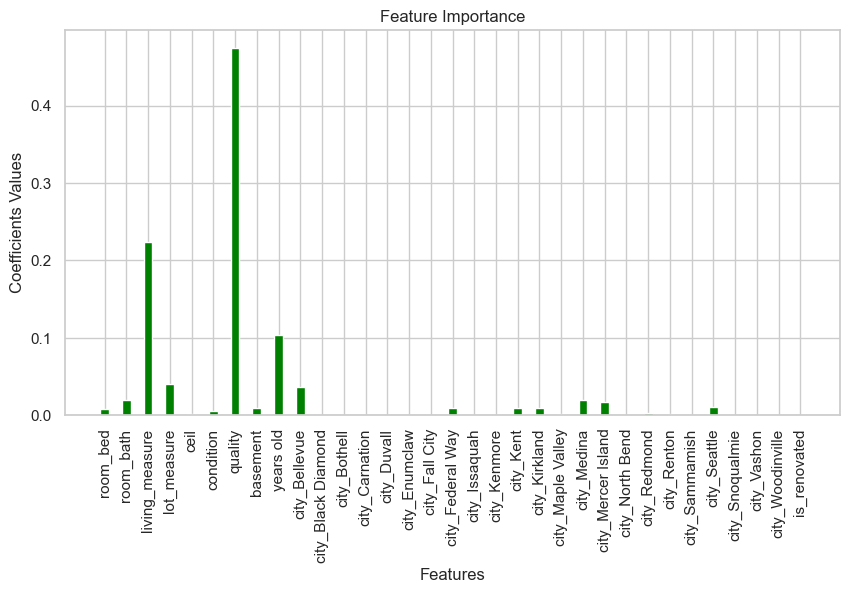

In [259]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(feature_importance_sk.keys(), feature_importance_sk.values(), color ='green', 
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("Coefficients Values")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()

### Getting Performance Matrix of all Models Built So far

In [346]:
Perf_df2 = pd.concat([lr_df,Ridge1_df,Lasso1_df,SVR1_df,knn1_df,DT1_df, DT2_df])

Perf_df2

Method  Val Score   RMSE_vl          MSE_vl    MAE_vl  \
0  Linear Reg Model1       0.62 225352.60  50783793899.67 131627.02   
0  Linear-Reg Ridge1       0.62 227450.39  51733678973.51 131929.39   
0  Linear-Reg Lasso1       0.62 226716.86  51400534346.12 131933.36   
0               SVR1      -0.06 377088.46 142195706488.18 218604.27   
0               knn1       0.69 203092.06  41246385721.07 104293.13   
0                DT1       0.49 261318.50  68287359010.05 134869.04   
0                DT2       0.66 215221.47  46320279155.47 122104.26   

   train Score   RMSE_tr          MSE_tr    MAE_tr  
0         0.63 222692.28  49591852097.92 129267.74  
0         0.63 224462.06  50383217357.95 129414.71  
0         0.63 224255.92  50290719884.68 129936.48  
0        -0.06 377791.81 142726654280.05 222580.58  
0         1.00   3013.47      9081004.72    144.17  
0         1.00   3013.47      9081004.72    144.16  
0         0.78 172512.60  29760596666.91 105038.78

## Ensemble techniques 

## Random Forest

In [261]:
rfcl = RandomForestRegressor(random_state=1,max_depth = 10, min_samples_leaf=5,min_samples_split=5)
rfcl = rfcl.fit(X_train, y_train)
preds_train = rfcl.predict(X_train)
preds_test = rfcl.predict(X_test)
#Model score and Deduction for each Model in a DataFrame
RF_trscore=r2_score(y_train,preds_train)
RF_trRMSE=np.sqrt(mean_squared_error(y_train, preds_train))
RF_trMSE=mean_squared_error(y_train, preds_train)
RF_trMAE=mean_absolute_error(y_train, preds_train)
RF_vlscore=r2_score(y_test,preds_test)
RF_vlRMSE=np.sqrt(mean_squared_error(y_test, preds_test))
RF_vlMSE=mean_squared_error(y_test, preds_test)
RF_vlMAE=mean_absolute_error(y_test, preds_test)
RF_df=pd.DataFrame({'Method':['Random Forest'],'Val Score':RF_vlscore,'RMSE_vl': RF_vlRMSE, 'MSE_vl': RF_vlMSE, 'MAE_vl': RF_vlMAE,'train Score':RF_trscore,'RMSE_tr': RF_trRMSE, 'MSE_tr': RF_trMSE, 'MAE_tr': RF_trMAE})
RF_df

Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  train Score  \
0  Random Forest       0.74 188368.32 35482623724.09 109624.97         0.80   

    RMSE_tr         MSE_tr   MAE_tr  
0 164180.29 26955168767.76 97553.67

## Bagging Using base estimator as Decision Tree

In [262]:

bgcl = BaggingRegressor(base_estimator=DT2, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)
preds_test = bgcl.predict(X_test)
preds_train = bgcl.predict(X_train)

#Model score and Deduction for each Model in a DataFrame
bgcl_trscore=r2_score(y_train,preds_train)
bgcl_trRMSE=np.sqrt(mean_squared_error(y_train, preds_train))
bgcl_trMSE=mean_squared_error(y_train, preds_train)
bgcl_trMAE=mean_absolute_error(y_train, preds_train)
bgcl_vlscore=r2_score(y_test,preds_test)
bgcl_vlRMSE=np.sqrt(mean_squared_error(y_test, preds_test))
bgcl_vlMSE=mean_squared_error(y_test, preds_test)
bgcl_vlMAE=mean_absolute_error(y_test, preds_test)
bgcl_df=pd.DataFrame({'Method':['Bagging DT'],'Val Score':bgcl_vlscore,'RMSE_vl': bgcl_vlRMSE, 'MSE_vl': bgcl_vlMSE, 'MAE_vl': bgcl_vlMAE,'train Score':bgcl_trscore,'RMSE_tr': bgcl_trRMSE, 'MSE_tr': bgcl_trMSE, 'MAE_tr': bgcl_trMAE})
bgcl_df

Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  train Score  \
0  Bagging DT       0.74 188718.65 35614728331.45 109635.62         0.80   

    RMSE_tr         MSE_tr   MAE_tr  
0 164539.92 27073383814.17 97659.70

## Bagging Using base estimator as Random Forest

In [263]:

b_rfcl = BaggingRegressor(base_estimator=rfcl, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)
b_rfcl = b_rfcl.fit(X_train, y_train)
preds_test = b_rfcl.predict(X_test)
preds_train = b_rfcl.predict(X_train)

#Model score and Deduction for each Model in a DataFrame
b_rfcl_trscore=r2_score(y_train,preds_train)
b_rfcl_trRMSE=np.sqrt(mean_squared_error(y_train, preds_train))
b_rfcl_trMSE=mean_squared_error(y_train, preds_train)
b_rfcl_trMAE=mean_absolute_error(y_train, preds_train)
b_rfcl_vlscore=r2_score(y_test,preds_test)
b_rfcl_vlRMSE=np.sqrt(mean_squared_error(y_test, preds_test))
b_rfcl_vlMSE=mean_squared_error(y_test, preds_test)
b_rfcl_vlMAE=mean_absolute_error(y_test, preds_test)
b_rfcl_df=pd.DataFrame({'Method':['Bagging RF'],'Val Score':b_rfcl_vlscore,'RMSE_vl': b_rfcl_vlRMSE, 'MSE_vl': b_rfcl_vlMSE, 'MAE_vl': b_rfcl_vlMAE,'train Score':b_rfcl_trscore,'RMSE_tr': b_rfcl_trRMSE, 'MSE_tr': b_rfcl_trMSE, 'MAE_tr': b_rfcl_trMAE})
b_rfcl_df

Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  train Score  \
0  Bagging RF       0.73 190372.03 36241509728.19 109854.22         0.78   

    RMSE_tr         MSE_tr    MAE_tr  
0 173647.42 30153427379.90 100219.36

## Gradient Boosting Regressor

In [264]:

gbm = GradientBoostingRegressor()

gbm = gbm.fit(X_train, y_train)
preds_test = gbm.predict(X_test)
preds_train = gbm.predict(X_train)
#Model score and Deduction for each Model in a DataFrame
gbm_trscore=r2_score(y_train,preds_train)
gbm_trRMSE=np.sqrt(mean_squared_error(y_train, preds_train))
gbm_trMSE=mean_squared_error(y_train, preds_train)
gbm_trMAE=mean_absolute_error(y_train, preds_train)
gbm_vlscore=r2_score(y_test,preds_test)
gbm_vlRMSE=np.sqrt(mean_squared_error(y_test, preds_test))
gbm_vlMSE=mean_squared_error(y_test, preds_test)
gbm_vlMAE=mean_absolute_error(y_test, preds_test)
gbm_df=pd.DataFrame({'Method':['Gradient Boosting'],'Val Score':gbm_vlscore,'RMSE_vl': gbm_vlRMSE, 'MSE_vl': gbm_vlMSE, 'MAE_vl': gbm_vlMAE,'train Score':gbm_trscore,'RMSE_tr': gbm_trRMSE, 'MSE_tr': gbm_trMSE, 'MAE_tr': gbm_trMAE})
gbm_df

Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  \
0  Gradient Boosting       0.74 188918.83 35690322726.16 108338.94   

   train Score   RMSE_tr         MSE_tr    MAE_tr  
0         0.78 171462.68 29399448974.64 103219.69

## ADA  Boosting Regressor

In [265]:

ada = AdaBoostRegressor(n_estimators=50,base_estimator=RandomForestRegressor(max_depth = 10, min_samples_leaf=5,min_samples_split=5)
                        ,learning_rate=1,loss='square',random_state=1)

ada = ada.fit(X_train, y_train)
preds_test = ada.predict(X_test)
preds_train = ada.predict(X_train)
#Model score and Deduction for each Model in a DataFrame
ada_trscore=r2_score(y_train,preds_train)
ada_trRMSE=np.sqrt(mean_squared_error(y_train, preds_train))
ada_trMSE=mean_squared_error(y_train, preds_train)
ada_trMAE=mean_absolute_error(y_train, preds_train)
ada_vlscore=r2_score(y_test,preds_test)
ada_vlRMSE=np.sqrt(mean_squared_error(y_test, preds_test))
ada_vlMSE=mean_squared_error(y_test, preds_test)
ada_vlMAE=mean_absolute_error(y_test, preds_test)
ada_df=pd.DataFrame({'Method':['Ada Boosting'],'Val Score':ada_vlscore,'RMSE_vl': ada_vlRMSE, 'MSE_vl': ada_vlMSE, 'MAE_vl': ada_vlMAE,'train Score':ada_trscore,'RMSE_tr': ada_trRMSE, 'MSE_tr': ada_trMSE, 'MAE_tr': ada_trMAE})
ada_df

Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  train Score  \
0  Ada Boosting       0.71 197476.75 38997067412.43 123455.84         0.86   

    RMSE_tr         MSE_tr    MAE_tr  
0 135668.12 18405838638.04 106579.28

## XG  Boosting Regressor with no Parameters

In [266]:
xg_reg = XGBRegressor()

xg_reg.fit(X_train,y_train)

preds_test = xg_reg.predict(X_test)
preds_train = xg_reg.predict(X_train)

#Model score and Deduction for each Model in a DataFrame
xg_reg_trscore=r2_score(y_train,preds_train)
xg_reg_trRMSE=np.sqrt(mean_squared_error(y_train, preds_train))
xg_reg_trMSE=mean_squared_error(y_train, preds_train)
xg_reg_trMAE=mean_absolute_error(y_train, preds_train)
xg_reg_vlscore=r2_score(y_test,preds_test)
xg_reg_vlRMSE=np.sqrt(mean_squared_error(y_test, preds_test))
xg_reg_vlMSE=mean_squared_error(y_test, preds_test)
xg_reg_vlMAE=mean_absolute_error(y_test, preds_test)
xg_reg_df=pd.DataFrame({'Method':['XG Boosting'],'Val Score':xg_reg_vlscore,'RMSE_vl': xg_reg_vlRMSE, 'MSE_vl': xg_reg_vlMSE, 'MAE_vl': xg_reg_vlMAE,'train Score':xg_reg_trscore,'RMSE_tr': xg_reg_trRMSE, 'MSE_tr': xg_reg_trMSE, 'MAE_tr': xg_reg_trMAE})
xg_reg_df

Method  Val Score   RMSE_vl         MSE_vl   MAE_vl  train Score  \
0  XG Boosting       0.74 187458.91 35140841481.02 99784.44         0.91   

    RMSE_tr         MSE_tr   MAE_tr  
0 107627.28 11583630911.51 70062.92

## XG  Boosting Regressor with booster as Dart

In [267]:
xg_reg = XGBRegressor(booster='dart',verbosity=1, nthread=4,n_estimators=200,
                      max_depth=5, learning_rate=0.07, eval_metric='rmse',
                      rate_drop=0.01,normalize_type='forest')

xg_reg.fit(X_train,y_train)

preds_test = xg_reg.predict(X_test)
preds_train = xg_reg.predict(X_train)

#Model score and Deduction for each Model in a DataFrame
xg_reg_trscore=r2_score(y_train,preds_train)
xg_reg_trRMSE=np.sqrt(mean_squared_error(y_train, preds_train))
xg_reg_trMSE=mean_squared_error(y_train, preds_train)
xg_reg_trMAE=mean_absolute_error(y_train, preds_train)
xg_reg_vlscore=r2_score(y_test,preds_test)
xg_reg_vlRMSE=np.sqrt(mean_squared_error(y_test, preds_test))
xg_reg_vlMSE=mean_squared_error(y_test, preds_test)
xg_reg_vlMAE=mean_absolute_error(y_test, preds_test)
xg_reg_df2=pd.DataFrame({'Method':['XG Boosting with dart'],'Val Score':xg_reg_vlscore,'RMSE_vl': xg_reg_vlRMSE, 'MSE_vl': xg_reg_vlMSE, 'MAE_vl': xg_reg_vlMAE,'train Score':xg_reg_trscore,'RMSE_tr': xg_reg_trRMSE, 'MSE_tr': xg_reg_trMSE, 'MAE_tr': xg_reg_trMAE})
xg_reg_df2

Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  \
0  XG Boosting with dart       0.75 183744.76 33762137987.27 101261.86   

   train Score   RMSE_tr         MSE_tr   MAE_tr  
0         0.86 137892.18 19014253904.17 87248.96

## XG  Boosting Regressor with booster as gbtree

In [268]:
xg_reg = XGBRegressor(booster='gbtree',verbosity=1, nthread=4,n_estimators=200,
                      max_depth=5, learning_rate=0.07, eval_metric='rmse',
                      rate_drop=0.01,normalize_type='forest')

xg_reg.fit(X_train,y_train)

preds_test = xg_reg.predict(X_test)
preds_train = xg_reg.predict(X_train)

#Model score and Deduction for each Model in a DataFrame
xg_reg_trscore=r2_score(y_train,preds_train)
xg_reg_trRMSE=np.sqrt(mean_squared_error(y_train, preds_train))
xg_reg_trMSE=mean_squared_error(y_train, preds_train)
xg_reg_trMAE=mean_absolute_error(y_train, preds_train)
xg_reg_vlscore=r2_score(y_test,preds_test)
xg_reg_vlRMSE=np.sqrt(mean_squared_error(y_test, preds_test))
xg_reg_vlMSE=mean_squared_error(y_test, preds_test)
xg_reg_vlMAE=mean_absolute_error(y_test, preds_test)
xg_reg_df3=pd.DataFrame({'Method':['XG Boosting with gbtree'],'Val Score':xg_reg_vlscore,'RMSE_vl': xg_reg_vlRMSE, 'MSE_vl': xg_reg_vlMSE, 'MAE_vl': xg_reg_vlMAE,'train Score':xg_reg_trscore,'RMSE_tr': xg_reg_trRMSE, 'MSE_tr': xg_reg_trMSE, 'MAE_tr': xg_reg_trMAE})
xg_reg_df3

Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  \
0  XG Boosting with gbtree       0.75 184552.40 34059589073.00 101248.57   

   train Score   RMSE_tr         MSE_tr   MAE_tr  
0         0.86 139797.78 19543419526.55 87539.51

### Getting Performance Matrix of all Models Built So far

In [269]:
Perf_df3 = pd.concat([Perf_df1,RF_df,bgcl_df,b_rfcl_df,gbm_df,ada_df, xg_reg_df,xg_reg_df2,xg_reg_df3])

Perf_df3

Method  Val Score   RMSE_vl          MSE_vl    MAE_vl  \
0        Linear Reg Model1       0.62 225352.60  50783793899.67 131627.02   
0        Linear-Reg Ridge1       0.62 225385.62  50798678875.98 131616.90   
0        Linear-Reg Lasso1       0.62 225352.70  50783837538.15 131625.48   
0                     SVR1      -0.06 377088.46 142195706488.18 218604.27   
0                     knn1       0.69 203092.06  41246385721.07 104293.13   
0                      DT1       0.49 261318.50  68287359010.05 134869.04   
0                      DT2       0.66 215221.47  46320279155.47 122104.26   
0            Random Forest       0.74 188368.32  35482623724.09 109624.97   
0               Bagging DT       0.74 188718.65  35614728331.45 109635.62   
0               Bagging RF       0.73 190372.03  36241509728.19 109854.22   
0        Gradient Boosting       0.74 188918.83  35690322726.16 108338.94   
0             Ada Boosting       0.71 197476.75  38997067412.43 123455.84   
0              XG Boosting       0.74 187458.91  35140841481.02  99784.44   
0    XG Boosting with dart       0.75 183744.76  33762137987.27 101261.86   
0  XG Boosting with gbtree       0.75 184552.40  34059589073.00 101248.57   

   train Score   RMSE_tr          MSE_tr    MAE_tr  
0         0.63 222692.28  49591852097.92 129267.74  
0         0.63 222695.34  49593212300.47 129238.03  
0         0.63 222692.31  49591865184.65 129265.61  
0        -0.06 377791.81 142726654280.05 222580.58  
0         1.00   3013.47      9081004.72    144.17  
0         1.00   3013.47      9081004.72    144.16  
0         0.78 172512.60  29760596666.91 105038.78  
0         0.80 164180.29  26955168767.76  97553.67  
0         0.80 164539.92  27073383814.17  97659.70  
0         0.78 173647.42  30153427379.90 100219.36  
0         0.78 171462.68  29399448974.64 103219.69  
0         0.86 135668.12  18405838638.04 106579.28  
0         0.91 107627.28  11583630911.51  70062.92  
0         0.86 137892.18  19014253904.17  87248.96  
0         0.86 139797.78  19543419526.55  87539.51

## Hyper paramters Tuning of Ensemble Models 

### Ridge with Grid Search

In [270]:

params = {"alpha":[0.1,0.3,0.5,0.8,1]}
ridge = Ridge()
model1 = GridSearchCV(ridge, param_grid=params, cv = 10,)
model1.fit(X_train, y_train)

print(f"Best Hyper Parameters:\n\n{model1.best_params_}")#predicting result over test data
#Model score and Deduction for each Model in a DataFrame

model1.fit(X_train, y_train)
#predicting result over test data
y_Ridge2_predtr= model1.predict(X_train)
y_Ridge2_predvl= model1.predict(X_test)
Ridge2_trscore=r2_score(y_train,y_Ridge2_predtr)
Ridge2_trRMSE=np.sqrt(mean_squared_error(y_train, y_Ridge2_predtr))
Ridge2_trMSE=mean_squared_error(y_train, y_Ridge2_predtr)
Ridge2_trMAE=mean_absolute_error(y_train, y_Ridge2_predtr)
Ridge2_vlscore=r2_score(y_test,y_Ridge2_predvl)
Ridge2_vlRMSE=np.sqrt(mean_squared_error(y_test, y_Ridge2_predvl))
Ridge2_vlMSE=mean_squared_error(y_test, y_Ridge2_predvl)
Ridge2_vlMAE=mean_absolute_error(y_test, y_Ridge2_predvl)
Ridge2_df=pd.DataFrame({'Method':['Ridge with Hyper Params'],'Val Score':Ridge2_vlscore,'RMSE_vl': Ridge2_vlRMSE, 'MSE_vl': Ridge1_vlMSE, 'MAE_vl': Ridge1_vlMAE,'train Score':Ridge2_trscore,'RMSE_tr': Ridge2_trRMSE, 'MSE_tr': Ridge2_trMSE, 'MAE_tr': Ridge2_trMAE})
Ridge2_df

Best Hyper Parameters:

{'alpha': 1}


Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  \
0  Ridge with Hyper Params       0.62 225422.19 50798678875.98 131616.90   

   train Score   RMSE_tr         MSE_tr    MAE_tr  
0         0.63 222704.06 49597099105.64 129214.43

### Lasso with Grid Search

In [271]:

params = {"alpha":[0.1,0.3,0.5,0.8,1]}
lasso = Lasso()
model2 = GridSearchCV(lasso, param_grid=params, cv = 10)
model2.fit(X_train, y_train)
print(f"Best Hyper Parameters:\n\n{model2.best_params_}")
#predicting result over test data
y_Lasso2_predtr= model2.predict(X_train)
y_Lasso2_predvl= model2.predict(X_test)#Model score and Deduction for each Model in a DataFrame
Lasso2_trscore=r2_score(y_train,y_Lasso1_predtr)
Lasso2_trRMSE=np.sqrt(mean_squared_error(y_train, y_Lasso1_predtr))
Lasso2_trMSE=mean_squared_error(y_train, y_Lasso1_predtr)
Lasso2_trMAE=mean_absolute_error(y_train, y_Lasso1_predtr)
Lasso2_vlscore=r2_score(y_test,y_Lasso1_predvl)
Lasso2_vlRMSE=np.sqrt(mean_squared_error(y_test, y_Lasso1_predvl))
Lasso2_vlMSE=mean_squared_error(y_test, y_Lasso1_predvl)
Lasso2_vlMAE=mean_absolute_error(y_test, y_Lasso1_predvl)
Lasso2_df=pd.DataFrame({'Method':['Lasso with Hyper Params'],'Val Score':Lasso2_vlscore,'RMSE_vl': Lasso2_vlRMSE, 'MSE_vl': Lasso2_vlMSE, 'MAE_vl': Lasso2_vlMAE,'train Score':Lasso2_trscore,'RMSE_tr': Lasso2_trRMSE, 'MSE_tr': Lasso2_trMSE, 'MAE_tr': Lasso2_trMAE})
Lasso2_df

Best Hyper Parameters:

{'alpha': 1}


Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  \
0  Lasso with Hyper Params       0.62 225352.70 50783837538.15 131625.48   

   train Score   RMSE_tr         MSE_tr    MAE_tr  
0         0.63 222692.31 49591865184.65 129265.61

### KNN with Grid Search

In [282]:
knn_regressor = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],    # Example values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Example values for the weight function
    'metric': ['euclidean', 'manhattan']  # Example values for the distance metric
}
KNN_grid_search = GridSearchCV(knn_regressor, param_grid, scoring='neg_mean_squared_error', cv=5)

KNN_grid_search.fit(X_train, y_train)

KNN_grid_search.fit(X_train, y_train)
#predicting result over test data
y_knn2_predtr= KNN_grid_search.predict(X_train)
y_knn2_predvl= KNN_grid_search.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
knn2_trscore=r2_score(y_train,y_knn2_predtr)
knn2_trRMSE=np.sqrt(mean_squared_error(y_train, y_knn2_predtr))
knn2_trMSE=mean_squared_error(y_train, y_knn2_predtr)
knn2_trMAE=mean_absolute_error(y_train, y_knn2_predtr)
knn2_vlscore=r2_score(y_test,y_knn2_predvl)
knn2_vlRMSE=np.sqrt(mean_squared_error(y_test, y_knn2_predvl))
knn2_vlMSE=mean_squared_error(y_test, y_knn2_predvl)
knn2_vlMAE=mean_absolute_error(y_test, y_knn2_predvl)
knn2_df=pd.DataFrame({'Method':['knn grid search '],'Val Score':knn2_vlscore,'RMSE_vl':knn2_vlRMSE, 'MSE_vl': knn2_vlMSE, 'MAE_vl': knn2_vlMAE,'train Score':knn2_trscore,'RMSE_tr': knn2_trRMSE, 'MSE_tr': knn2_trMSE, 'MAE_tr':knn2_trMAE})



Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  \
0  knn grid search        0.71 196586.40 38646213939.12 101615.28   

   train Score   RMSE_tr         MSE_tr   MAE_tr  
0         0.78 171150.38 29292451962.89 88807.87

### Random Forest with Grid Search

In [272]:

rf = RandomForestRegressor()
# Number of trees in random forest
n_estimators = [50,60 ,70,80,90,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,6,8,10,15]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': [1, 2, 5, 10]}


rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs=20)

rf_random.fit(X_train, y_train)
print(f"Best Hyper Parameters:\n\n{rf_random.best_params_}")
#predicting result over test data
y_rf_gscv_predtr= rf_random.predict(X_train)
y_rf_gscv_predvl= rf_random.predict(X_test)#Model score and Deduction for each Model in a DataFrame
rf_gscv_trscore=r2_score(y_train,y_rf_gscv_predtr)
rf_gscv_trRMSE=np.sqrt(mean_squared_error(y_train, y_rf_gscv_predtr))
rf_gscv_trMSE=mean_squared_error(y_train, y_rf_gscv_predtr)
rf_gscv_trMAE=mean_absolute_error(y_train, y_rf_gscv_predtr)
rf_gscv_vlscore=r2_score(y_test,y_rf_gscv_predvl)
rf_gscv_vlRMSE=np.sqrt(mean_squared_error(y_test, y_rf_gscv_predvl))
rf_gscv_vlMSE=mean_squared_error(y_test, y_rf_gscv_predvl)
rf_gscv_vlMAE=mean_absolute_error(y_test, y_rf_gscv_predvl)
rf_gscv_df=pd.DataFrame({'Method':['RF with Hyper Params'],'Val Score':rf_gscv_vlscore,'RMSE_vl': rf_gscv_vlRMSE, 'MSE_vl': rf_gscv_vlMSE, 'MAE_vl': rf_gscv_vlMAE,'train Score':rf_gscv_trscore,'RMSE_tr': rf_gscv_trRMSE, 'MSE_tr': rf_gscv_trMSE, 'MAE_tr': rf_gscv_trMAE})
rf_gscv_df


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Hyper Parameters:

{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 60}


Method  Val Score   RMSE_vl         MSE_vl    MAE_vl  \
0  RF with Hyper Params       0.74 187572.51 35183447484.91 105660.21   

   train Score   RMSE_tr         MSE_tr   MAE_tr  
0         0.90 114858.04 13192369560.07 77327.52

### XG Boost with Random Search

In [273]:
xgb1 = XGBRegressor()
parameters = {
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [2,5,7,8,10],
              'n_estimators': [50,100,150,200]}

xgb_random = RandomizedSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=1,n_iter=100)

xgb_random.fit(X_train,y_train)
print(f"Best Hyper Parameters:\n\n{xgb_random.best_params_}")
#predicting result over test data
y_xgb_random_predtr= xgb_random.predict(X_train)
y_xgb_random_predvl= xgb_random.predict(X_test)#Model score and Deduction for each Model in a DataFrame
xgb_random_trscore=r2_score(y_train,y_xgb_random_predtr)
xgb_random_trRMSE=np.sqrt(mean_squared_error(y_train, y_xgb_random_predtr))
xgb_random_trMSE=mean_squared_error(y_train, y_xgb_random_predtr)
xgb_random_trMAE=mean_absolute_error(y_train, y_xgb_random_predtr)
xgb_random_vlscore=r2_score(y_test,y_xgb_random_predvl)
xgb_random_vlRMSE=np.sqrt(mean_squared_error(y_test, y_xgb_random_predvl))
xgb_random_vlMSE=mean_squared_error(y_test, y_xgb_random_predvl)
xgb_random_vlMAE=mean_absolute_error(y_test, y_xgb_random_predvl)
xgb_random_df=pd.DataFrame({'Method':['XGB with Hyper Params Random Search '],'Val Score':xgb_random_vlscore,'RMSE_vl': xgb_random_vlRMSE, 'MSE_vl': xgb_random_vlMSE, 'MAE_vl': xgb_random_vlMAE,'train Score':xgb_random_trscore,'RMSE_tr': xgb_random_trRMSE, 'MSE_tr': xgb_random_trMSE, 'MAE_tr': xgb_random_trMAE})
xgb_random_df


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best Hyper Parameters:

{'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.07}


Method  Val Score   RMSE_vl         MSE_vl  \
0  XGB with Hyper Params Random Search        0.75 185352.24 34355452298.74   

     MAE_vl  train Score   RMSE_tr         MSE_tr   MAE_tr  
0 102505.13         0.84 144793.61 20965188929.54 90345.30

### XG Boost with Grid Search

In [275]:
xgb2 = XGBRegressor()
parameters = {
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [2,4,6,8,10],
              'n_estimators': [50,100,150,200,250]}

xgb_gridCV = GridSearchCV(xgb2,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=1)

xgb_gridCV.fit(X_train,y_train)
print(f"Best Hyper Parameters:\n\n{xgb_gridCV.best_params_}")
#predicting result over test data
y_xgb_gridCV_predtr= xgb_gridCV.predict(X_train)
y_xgb_gridCV_predvl= xgb_gridCV.predict(X_test)#Model score and Deduction for each Model in a DataFrame
xgb_gridCV_trscore=r2_score(y_train,y_xgb_gridCV_predtr)
xgb_gridCV_trRMSE=np.sqrt(mean_squared_error(y_train, y_xgb_gridCV_predtr))
xgb_gridCV_trMSE=mean_squared_error(y_train, y_xgb_gridCV_predtr)
xgb_gridCV_trMAE=mean_absolute_error(y_train, y_xgb_gridCV_predtr)
xgb_gridCV_vlscore=r2_score(y_test,y_xgb_gridCV_predvl)
xgb_gridCV_vlRMSE=np.sqrt(mean_squared_error(y_test, y_xgb_gridCV_predvl))
xgb_gridCV_vlMSE=mean_squared_error(y_test, y_xgb_gridCV_predvl)
xgb_gridCV_vlMAE=mean_absolute_error(y_test, y_xgb_gridCV_predvl)
xgb_gridCV_df=pd.DataFrame({'Method':['XGB with Hyper Params Grid Search '],'Val Score':xgb_gridCV_vlscore,'RMSE_vl': xgb_gridCV_vlRMSE, 'MSE_vl': xgb_gridCV_vlMSE, 'MAE_vl': xgb_gridCV_vlMAE,'train Score':xgb_gridCV_trscore,'RMSE_tr': xgb_gridCV_trRMSE, 'MSE_tr': xgb_gridCV_trMSE, 'MAE_tr': xgb_gridCV_trMAE})
xgb_gridCV_df


Fitting 3 folds for each of 75 candidates, totalling 225 fits
Best Hyper Parameters:

{'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 250}


Method  Val Score   RMSE_vl         MSE_vl  \
0  XGB with Hyper Params Grid Search        0.75 182590.95 33339455958.71   

     MAE_vl  train Score   RMSE_tr         MSE_tr   MAE_tr  
0 101254.92         0.83 151039.99 22813078936.80 91942.98

### Gradient Boost with Grid Search

In [278]:
gb2 = GradientBoostingRegressor()
param_grid = {
  'max_depth':[2,4,6,8,10],
 'max_features': ['auto','sqrt'],
 'learning_rate': [0.05,0.1,0.2],
 'min_samples_leaf': [4,10,20],
 'min_samples_split': [5,10],
 'n_estimators': [10,50,100,150],
 }

gb_gridCV = GridSearchCV(gb2,
                        param_grid,
                        cv = 3,
                        n_jobs = 2,
                        verbose=1)

gb_gridCV.fit(X_train,y_train)
print(f"Best Hyper Parameters:\n\n{gb_gridCV.best_params_}")
#predicting result over test data
y_gb_gridCV_predtr= gb_gridCV.predict(X_train)
y_gb_gridCV_predvl= gb_gridCV.predict(X_test)
#Model score and Deduction for each Model in a DataFrame
gb_gridCV_trscore=r2_score(y_train,y_gb_gridCV_predtr)
gb_gridCV_trRMSE=np.sqrt(mean_squared_error(y_train, y_gb_gridCV_predtr))
gb_gridCV_trMSE=mean_squared_error(y_train, y_gb_gridCV_predtr)
gb_gridCV_trMAE=mean_absolute_error(y_train, y_gb_gridCV_predtr)
gb_gridCV_vlscore=r2_score(y_test,y_gb_gridCV_predvl)
gb_gridCV_vlRMSE=np.sqrt(mean_squared_error(y_test, y_gb_gridCV_predvl))
gb_gridCV_vlMSE=mean_squared_error(y_test, y_gb_gridCV_predvl)
gb_gridCV_vlMAE=mean_absolute_error(y_test, y_gb_gridCV_predvl)
gb_gridCV_df=pd.DataFrame({'Method':['GB with Hyper Params Grid Search '],'Val Score':gb_gridCV_vlscore,'RMSE_vl': gb_gridCV_vlRMSE, 'MSE_vl': gb_gridCV_vlMSE, 'MAE_vl': gb_gridCV_vlMAE,'train Score':gb_gridCV_trscore,'RMSE_tr': gb_gridCV_trRMSE, 'MSE_tr': gb_gridCV_trMSE, 'MAE_tr': gb_gridCV_trMAE})
gb_gridCV_df


Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Best Hyper Parameters:

{'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 150}


Method  Val Score   RMSE_vl         MSE_vl  \
0  GB with Hyper Params Grid Search        0.76 179359.67 32169890170.37   

    MAE_vl  train Score   RMSE_tr         MSE_tr   MAE_tr  
0 98324.10         0.86 135608.58 18389686044.28 80563.71

In [285]:
Perf_df11 = pd.concat([Perf_df3,Ridge2_df,Lasso2_df,rf_gscv_df,xgb_random_df,xgb_gridCV_df,gb_gridCV_df,knn2_df])

Perf_df11

Method  Val Score   RMSE_vl          MSE_vl  \
0                     Linear Reg Model1       0.62 225352.60  50783793899.67   
0                     Linear-Reg Ridge1       0.62 225385.62  50798678875.98   
0                     Linear-Reg Lasso1       0.62 225352.70  50783837538.15   
0                                  SVR1      -0.06 377088.46 142195706488.18   
0                                  knn1       0.69 203092.06  41246385721.07   
0                                   DT1       0.49 261318.50  68287359010.05   
0                                   DT2       0.66 215221.47  46320279155.47   
0                         Random Forest       0.74 188368.32  35482623724.09   
0                            Bagging DT       0.74 188718.65  35614728331.45   
0                            Bagging RF       0.73 190372.03  36241509728.19   
0                     Gradient Boosting       0.74 188918.83  35690322726.16   
0                          Ada Boosting       0.71 197476.75  38997067412.43   
0                           XG Boosting       0.74 187458.91  35140841481.02   
0                 XG Boosting with dart       0.75 183744.76  33762137987.27   
0               XG Boosting with gbtree       0.75 184552.40  34059589073.00   
0               Ridge with Hyper Params       0.62 225422.19  50798678875.98   
0               Lasso with Hyper Params       0.62 225352.70  50783837538.15   
0                  RF with Hyper Params       0.74 187572.51  35183447484.91   
0  XGB with Hyper Params Random Search        0.75 185352.24  34355452298.74   
0    XGB with Hyper Params Grid Search        0.75 182590.95  33339455958.71   
0     GB with Hyper Params Grid Search        0.76 179359.67  32169890170.37   
0                      knn grid search        0.71 196586.40  38646213939.12   

     MAE_vl  train Score   RMSE_tr          MSE_tr    MAE_tr  
0 131627.02         0.63 222692.28  49591852097.92 129267.74  
0 131616.90         0.63 222695.34  49593212300.47 129238.03  
0 131625.48         0.63 222692.31  49591865184.65 129265.61  
0 218604.27        -0.06 377791.81 142726654280.05 222580.58  
0 104293.13         1.00   3013.47      9081004.72    144.17  
0 134869.04         1.00   3013.47      9081004.72    144.16  
0 122104.26         0.78 172512.60  29760596666.91 105038.78  
0 109624.97         0.80 164180.29  26955168767.76  97553.67  
0 109635.62         0.80 164539.92  27073383814.17  97659.70  
0 109854.22         0.78 173647.42  30153427379.90 100219.36  
0 108338.94         0.78 171462.68  29399448974.64 103219.69  
0 123455.84         0.86 135668.12  18405838638.04 106579.28  
0  99784.44         0.91 107627.28  11583630911.51  70062.92  
0 101261.86         0.86 137892.18  19014253904.17  87248.96  
0 101248.57         0.86 139797.78  19543419526.55  87539.51  
0 131616.90         0.63 222704.06  49597099105.64 129214.43  
0 131625.48         0.63 222692.31  49591865184.65 129265.61  
0 105660.21         0.90 114858.04  13192369560.07  77327.52  
0 102505.13         0.84 144793.61  20965188929.54  90345.30  
0 101254.92         0.83 151039.99  22813078936.80  91942.98  
0  98324.10         0.86 135608.58  18389686044.28  80563.71  
0 101615.28         0.78 171150.38  29292451962.89  88807.87

## Cross Validation of different Models 

In [1701]:
scores_lr = cross_val_score(regression_model, X_train, y_train, cv=10)
scores_lr
print("Avg :",np.average(scores_lr))

Avg : 0.6335016235508266


In [1703]:
scores_rfcl = cross_val_score(rfcl, X_test, y_test, cv=10)
scores_rfcl
print("Avg :",np.average(scores_rfcl))

Avg : 0.6987046294691697


In [1705]:
scores_xgb = cross_val_score(xgb_gridCV, X_test, y_test, cv=10)
scores_xgb


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits


array([0.80471625, 0.74737426, 0.7274439 , 0.76431337, 0.73957938,
       0.81415897, 0.7210997 , 0.71841175, 0.67562424, 0.77587983])

In [1706]:
print("Avg :",np.average(scores_xgb))

Avg : 0.7488601636997159


In [280]:
scores_gbgrid = cross_val_score(gb_gridCV, X_test, y_test, cv=10)
scores_gbgrid


Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits


array([0.80640429, 0.73932767, 0.72388071, 0.7508934 , 0.76676434,
       0.79603821, 0.75771701, 0.70121724, 0.72245192, 0.78162154])

In [281]:
print("Avg :",np.average(scores_gbgrid))

Avg : 0.7546316311234927


## Adding PolynomialFeatures

In [1819]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [1820]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.30, random_state=1)
X_train.shape

(15129, 562)

In [1822]:
LR1.fit(X_train, y_train)
print(LR1.coef_[0])

[-1.75813756e-11  1.02309031e+05 -1.80521059e+05 -4.97051926e+05
 -3.28792220e+05 -1.86705663e+05 -1.57726195e+05 -5.97387580e+05
 -5.05041095e+04 -5.52485185e+05 -1.14924188e+05 -2.24619378e+04
  2.11191933e+05 -2.61422846e+04  4.74466498e+04  4.82315957e+04
 -8.90375946e+04  2.85679064e+04  2.31701797e+05  1.55404571e+04
  5.20429349e+04 -1.32249141e+05  2.32365875e+04 -2.13360921e+05
  4.48448985e+05  2.92991797e+04  1.69066378e+05 -4.06925498e+04
  3.18798051e+05 -2.95427715e+05  2.24651851e+05  1.81153338e+04
  2.18816233e+05 -1.06767350e+05  1.05196930e+05 -4.46177398e+05
  1.37752357e+04  3.40986993e+05 -1.00127589e+05 -1.02161377e+05
  1.04511412e+05  1.94761816e+05 -1.32895610e+05 -1.47296250e+05
  1.45952617e+05  8.14863354e+04  1.35957154e+05  9.87224476e+04
  2.17743505e+05  3.14680738e+04  1.29006753e+05  8.38802291e+03
  1.12483591e+04 -1.65376688e+05  4.70435578e+04  1.60917393e+06
 -2.14534946e+05  1.20314714e+04  3.18326419e+04 -2.29094300e+04
 -5.36148969e+04 -1.51240

In [1823]:
print(LR1.score(X_train, y_train))
print(LR1.score(X_test, y_test))

0.7431492475714305
0.7284021931703584


In [1824]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00  8.44513417e+04 -2.18528402e+05 -3.96682191e+05
  -3.29165869e+05 -2.09654529e+05 -1.45652437e+05 -5.72143994e+05
  -7.48937883e+04 -5.31481383e+05 -1.11215562e+05 -1.44837314e+04
   1.87002525e+05 -1.37460095e+04  5.05120638e+04  4.67987984e+04
  -6.67582732e+04  3.21520384e+04  2.24966792e+05  2.61337228e+04
   5.40692309e+04 -1.25628174e+05  2.33766532e+04 -1.21394782e+05
   3.89377792e+05  2.63807560e+04  1.68163633e+05 -3.65937406e+04
   3.06548367e+05 -2.92772054e+05  1.92813014e+05  2.24338974e+04
   1.98014814e+05 -9.36482369e+04  9.98724383e+04 -3.93117516e+05
   9.98542462e+03  3.09501117e+05 -9.59670759e+04 -1.04716986e+05
   8.53866604e+04  1.91580965e+05 -1.21136949e+05 -1.23770812e+05
   1.20824155e+05  9.02783564e+04  1.26942032e+05  8.41760925e+04
   1.87823546e+05  3.36038553e+04  1.32130904e+05  1.52908973e+04
   1.66377922e+04 -1.51425658e+05  4.86401465e+04  1.27035242e+06
  -1.85581764e+05  1.65457835e+04  3.42404258e+04 -1.60050726e+

In [1825]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7427738256078498
0.7291958293932792


In [1826]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00  1.50558348e+05 -1.58214407e+05 -6.76362097e+05
 -3.10572611e+05 -1.53012332e+05 -1.45051527e+05 -5.58952623e+05
 -1.67586808e+04 -5.58912596e+05 -1.23532020e+05 -3.68965888e+04
  1.95994797e+05 -3.43977143e+04  3.47860453e+04  3.73362598e+04
 -9.84317656e+04  1.91788021e+04  2.19291100e+05  6.54633837e+03
  4.26715013e+04 -1.40841783e+05  7.98613151e+03 -2.23023731e+05
  4.39866715e+05  1.72972868e+04  1.59641390e+05 -4.97459101e+04
  3.08992235e+05 -3.04519193e+05  2.12774879e+05  5.37150086e+03
  2.12209481e+05 -1.09994437e+05  1.31633274e+05 -4.12617198e+05
  1.46459097e+04  3.24145049e+05 -1.10665561e+05 -1.47475436e+05
  8.80695726e+04  1.85399123e+05 -1.68452280e+05 -1.92308635e+05
  1.05639668e+05  3.53275175e+04  9.06074541e+04  6.16539282e+04
  1.73399999e+05 -5.57268757e+03  8.95635183e+04 -2.94497684e+04
 -2.80376622e+04 -2.05163293e+05  3.56904027e+03  1.56741621e+06
 -2.51992271e+05 -2.76975350e+04 -7.19682985e+03 -6.15603826e+04
 -9.19315841

In [1287]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))


0.7430422788890236
0.7281686978155866
